In [1908]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import scipy as sp
import scipy.stats as stats


us_df = pd.read_csv('us_suicide_1999_2017.txt', delimiter = '\t')
#import tab delimited data from CDC - Wonder -Program
#Centers for Disease Control and Prevention, National Center for Health Statistics. 
#Underlying Cause of Death 1999-2017 on CDC WONDER Online Database, released December, 2018. 
#Data are from the Multiple Cause of Death Files, 1999-2017, as compiled from data provided 
#by the 57 vital statistics jurisdictions through the Vital Statistics Cooperative Program. 
#Accessed at http://wonder.cdc.gov/ucd-icd10.html on Jan 9, 2020 8:44:06 PM

In [1909]:
us_df.head(10)
us_df1=us_df
#Backing up primary data frame prior to cleaning for refernce of precleaned schemas

In [1910]:
#Identify Current Schema
us_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7566 entries, 0 to 7565
Data columns (total 14 columns):
Notes                                               62 non-null object
State                                               7504 non-null object
State Code                                          7504 non-null float64
Year                                                7504 non-null float64
Year Code                                           7504 non-null float64
Gender                                              7504 non-null object
Gender Code                                         7504 non-null object
Race                                                7504 non-null object
Race Code                                           7504 non-null object
Injury Mechanism & All Other Leading Causes         7504 non-null object
Injury Mechanism & All Other Leading Causes Code    7504 non-null object
Deaths                                              7504 non-null float64
Population     

In [1911]:
#Initial Examine Dataset
us_df.head()

,Notes,State,State Code,Year,Year Code,Gender,Gender Code,Race,Race Code,Injury Mechanism & All Other Leading Causes,Injury Mechanism & All Other Leading Causes Code,Deaths,Population,Crude Rate
0,NaN,Alabama,1.0,1999.0,1999.0,Female,F,White,2106-3,Firearm,GRINJ-006,63.0,1640665.0,3.84
1,NaN,Alabama,1.0,1999.0,1999.0,Female,F,White,2106-3,Poisoning,GRINJ-015,19.0,1640665.0,Unreliable
2,NaN,Alabama,1.0,1999.0,1999.0,Male,M,Black or African American,2054-5,Firearm,GRINJ-006,41.0,539198.0,7.60
3,NaN,Alabama,1.0,1999.0,1999.0,Male,M,White,2106-3,Firearm,GRINJ-006,326.0,1570643.0,20.76
4,NaN,Alabama,1.0,1999.0,1999.0,Male,M,White,2106-3,Poisoning,GRINJ-015,36.0,1570643.0,2.29


In [1912]:
#Drop all redundant Code Columns
us_df =us_df.drop(columns=['Notes','State Code','Year Code','Gender Code', 'Race Code', 'Injury Mechanism & All Other Leading Causes Code'])

In [1913]:
us_df.head()

,State,Year,Gender,Race,Injury Mechanism & All Other Leading Causes,Deaths,Population,Crude Rate
0,Alabama,1999.0,Female,White,Firearm,63.0,1640665.0,3.84
1,Alabama,1999.0,Female,White,Poisoning,19.0,1640665.0,Unreliable
2,Alabama,1999.0,Male,Black or African American,Firearm,41.0,539198.0,7.60
3,Alabama,1999.0,Male,White,Firearm,326.0,1570643.0,20.76
4,Alabama,1999.0,Male,White,Poisoning,36.0,1570643.0,2.29


In [1914]:
#Shorten Injury Mechanism To Method, to describe method of suicide. 
us_df.rename(columns = {'Injury Mechanism & All Other Leading Causes':'Method'}, inplace = True)

In [1354]:
us_df.head()

,State,Year,Gender,Race,Method,Deaths,Population,Crude Rate
0,Alabama,1999.0,Female,White,Firearm,63.0,1640665.0,3.84
1,Alabama,1999.0,Female,White,Poisoning,19.0,1640665.0,Unreliable
2,Alabama,1999.0,Male,Black or African American,Firearm,41.0,539198.0,7.60
3,Alabama,1999.0,Male,White,Firearm,326.0,1570643.0,20.76
4,Alabama,1999.0,Male,White,Poisoning,36.0,1570643.0,2.29


In [1355]:
#Verifiy Column Types
us_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7566 entries, 0 to 7565
Data columns (total 8 columns):
State         7504 non-null object
Year          7504 non-null float64
Gender        7504 non-null object
Race          7504 non-null object
Method        7504 non-null object
Deaths        7504 non-null float64
Population    7504 non-null float64
Crude Rate    7504 non-null object
dtypes: float64(3), object(5)
memory usage: 473.0+ KB


In [1356]:
#Clear, Unreliable in crude rate
us_df['Crude Rate'] = us_df['Crude Rate'].replace(np.nan, 0)

In [1357]:
us_df.head()

,State,Year,Gender,Race,Method,Deaths,Population,Crude Rate
0,Alabama,1999.0,Female,White,Firearm,63.0,1640665.0,3.84
1,Alabama,1999.0,Female,White,Poisoning,19.0,1640665.0,Unreliable
2,Alabama,1999.0,Male,Black or African American,Firearm,41.0,539198.0,7.60
3,Alabama,1999.0,Male,White,Firearm,326.0,1570643.0,20.76
4,Alabama,1999.0,Male,White,Poisoning,36.0,1570643.0,2.29


In [1358]:
us_df[us_df['Crude Rate']=='Unreliable']['Crude Rate']

1       Unreliable
20      Unreliable
23      Unreliable
26      Unreliable
34      Unreliable
           ...    
7496    Unreliable
7497    Unreliable
7499    Unreliable
7500    Unreliable
7501    Unreliable
Name: Crude Rate, Length: 2225, dtype: object

In [1359]:
us_df.head()

,State,Year,Gender,Race,Method,Deaths,Population,Crude Rate
0,Alabama,1999.0,Female,White,Firearm,63.0,1640665.0,3.84
1,Alabama,1999.0,Female,White,Poisoning,19.0,1640665.0,Unreliable
2,Alabama,1999.0,Male,Black or African American,Firearm,41.0,539198.0,7.60
3,Alabama,1999.0,Male,White,Firearm,326.0,1570643.0,20.76
4,Alabama,1999.0,Male,White,Poisoning,36.0,1570643.0,2.29


In [1360]:
us_df['Crude Rate'] = pd.to_numeric(us_df['Crude Rate'], errors = 'coerce').fillna(0)

In [1361]:
us_df.head()

,State,Year,Gender,Race,Method,Deaths,Population,Crude Rate
0,Alabama,1999.0,Female,White,Firearm,63.0,1640665.0,3.84
1,Alabama,1999.0,Female,White,Poisoning,19.0,1640665.0,0.00
2,Alabama,1999.0,Male,Black or African American,Firearm,41.0,539198.0,7.60
3,Alabama,1999.0,Male,White,Firearm,326.0,1570643.0,20.76
4,Alabama,1999.0,Male,White,Poisoning,36.0,1570643.0,2.29


In [1919]:
us_df[us_df['Year'].isna()]
us_df.dropna(inplace = True)

In [1920]:
#Set int types:
us_df = us_df.astype({'Year' : 'int32', 'Deaths' : 'int32', 'Population' : 'int32'})


In [1921]:
us_df.head()

,State,Year,Gender,Race,Method,Deaths,Population,Crude Rate
0,Alabama,1999,Female,White,Firearm,63,1640665,3.839906
1,Alabama,1999,Female,White,Poisoning,19,1640665,1.158067
2,Alabama,1999,Male,Black or African American,Firearm,41,539198,7.603886
3,Alabama,1999,Male,White,Firearm,326,1570643,20.755831
4,Alabama,1999,Male,White,Poisoning,36,1570643,2.292055


In [1364]:
#Remove Empty Rows
us_df[us_df['Year'].isna()]

,State,Year,Gender,Race,Method,Deaths,Population,Crude Rate


In [1365]:
#Verify New Data Types
us_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7504 entries, 0 to 7503
Data columns (total 8 columns):
State         7504 non-null object
Year          7504 non-null int32
Gender        7504 non-null object
Race          7504 non-null object
Method        7504 non-null object
Deaths        7504 non-null int32
Population    7504 non-null int32
Crude Rate    7504 non-null float64
dtypes: float64(1), int32(3), object(4)
memory usage: 439.7+ KB


In [1366]:
#Inspect Frame
us_df.head()

,State,Year,Gender,Race,Method,Deaths,Population,Crude Rate
0,Alabama,1999,Female,White,Firearm,63,1640665,3.84
1,Alabama,1999,Female,White,Poisoning,19,1640665,0.00
2,Alabama,1999,Male,Black or African American,Firearm,41,539198,7.60
3,Alabama,1999,Male,White,Firearm,326,1570643,20.76
4,Alabama,1999,Male,White,Poisoning,36,1570643,2.29


In [1367]:
#Examine / Identify unique methods of suicide. 
np.unique(us_df['Method'])

array(['Cut/Pierce', 'Drowning', 'Fall', 'Fire/Flame', 'Firearm',
       'Other land transport', 'Other specified, classifiable Injury',
       'Other specified, not elsewhere classified Injury', 'Poisoning',
       'Suffocation', 'Unspecified Injury'], dtype=object)

In [1368]:
us_df[us_df['Method'] == "Fire/Flame"].shape

(18, 8)

In [1369]:
us_df.head(20)

,State,Year,Gender,Race,Method,Deaths,Population,Crude Rate
0,Alabama,1999,Female,White,Firearm,63,1640665,3.84
1,Alabama,1999,Female,White,Poisoning,19,1640665,0.00
2,Alabama,1999,Male,Black or African American,Firearm,41,539198,7.60
3,Alabama,1999,Male,White,Firearm,326,1570643,20.76
4,Alabama,1999,Male,White,Poisoning,36,1570643,2.29
5,Alabama,1999,Male,White,Suffocation,35,1570643,2.23
6,Alabama,2000,Female,White,Firearm,65,1643179,3.96
7,Alabama,2000,Female,White,Poisoning,29,1643179,1.76
8,Alabama,2000,Male,Black or African American,Firearm,49,541643,9.05
9,Alabama,2000,Male,White,Firearm,307,1575039,19.49


Text(0.5, 1.0, 'Suicide Crude Rate Histogram')

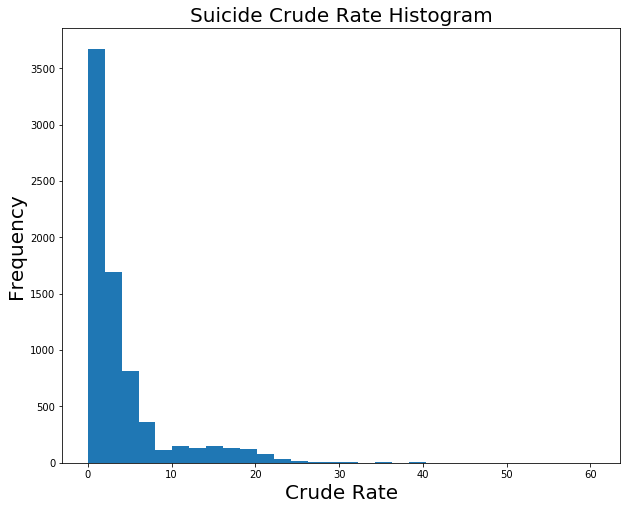

In [1370]:
#Chart Suicide Histogram for 1999-2017
ax = us_df['Crude Rate'].plot(kind="hist",bins=30,figsize=(10,8))
ax.set_xlabel('Crude Rate', size=20)
ax.set_ylabel('Frequency', size=20)
ax.set_title('Suicide Crude Rate Histogram',size = 20)

In [1371]:
#How many Crude Rates are over 30?
us_df['Crude Rate'] > 30

0       False
1       False
2       False
3       False
4       False
        ...  
7499    False
7500    False
7501    False
7502     True
7503    False
Name: Crude Rate, Length: 7504, dtype: bool

In [1372]:
#Show Crude Rates > 30
us_df[us_df['Crude Rate'] > 30]

,State,Year,Gender,Race,Method,Deaths,Population,Crude Rate
148,Alaska,2000,Male,American Indian or Alaska Native,Firearm,28,54115,51.74
154,Alaska,2002,Male,American Indian or Alaska Native,Firearm,26,55213,47.09
161,Alaska,2004,Male,American Indian or Alaska Native,Firearm,23,56792,40.50
165,Alaska,2005,Male,American Indian or Alaska Native,Firearm,33,57713,57.18
168,Alaska,2006,Male,American Indian or Alaska Native,Firearm,21,58361,35.98
175,Alaska,2008,Male,American Indian or Alaska Native,Firearm,26,59398,43.77
179,Alaska,2009,Male,American Indian or Alaska Native,Firearm,21,60293,34.83
183,Alaska,2010,Male,American Indian or Alaska Native,Firearm,24,60905,39.41
187,Alaska,2011,Male,American Indian or Alaska Native,Firearm,24,61574,38.98
190,Alaska,2012,Male,American Indian or Alaska Native,Firearm,22,62001,35.48


In [1373]:
#Create Alaska Specific DataFrame to explore high crude rates
alaska_df = us_df[us_df['State'] == 'Alaska']

In [1374]:
#Created Seperate State Date Frames Organized By Census Regions
# us_region1 = 

# New England divisions
me_us_df = us_df[us_df['State'] == 'Maine'] #Maine
nh_us_df = us_df[us_df['State'] == 'New Hampshire'] #New Hamp
vt_us_df = us_df[us_df['State'] == 'Vermont'] #Vermont
ma_us_df = us_df[us_df['State'] == 'Massachusetts'] #Massachusetts
ri_us_df = us_df[us_df['State'] == 'Rhode Island'] #Rhode Island
ct_us_df = us_df[us_df['State'] == 'Connecticut'] #Connecticut

# Mid-Atlantic divisions
ny_us_df = us_df[us_df['State'] == 'New York'] #New York
nj_us_df = us_df[us_df['State'] == 'New Jersey'] #New Jersey
pa_us_df = us_df[us_df['State'] == 'Pennsylvania'] #Pennsylvania

# US MIDWEST REGION 2
# East North Central divisions
wi_us_df = us_df[us_df['State'] == 'Wisconsin'] #Wisconsin
il_us_df = us_df[us_df['State'] == 'Illinois'] #Illinois
mi_us_df = us_df[us_df['State'] == 'Michigan'] #Michigan
in_us_df = us_df[us_df['State'] == 'Indiana'] #Indiana
oh_us_df = us_df[us_df['State'] == 'Ohio'] #Ohio

# West North Central divisions
nd_us_df = us_df[us_df['State'] == 'North Dakota'] #North Dakota
sd_us_df = us_df[us_df['State'] == 'South Dakota'] #North Dakota
ne_us_df = us_df[us_df['State'] == 'Nebraska'] #Nebraska
ks_us_df = us_df[us_df['State'] == 'Kansas']  #Kansas
mn_us_df = us_df[us_df['State'] == 'Minnesota'] #Minnesota
ia_us_df = us_df[us_df['State'] == 'Iowa'] #Iowa
mo_us_df = us_df[us_df['State'] == 'Missori'] #Missori


# SOUTH REGION 3
# South Atlantic divisions
de_us_df = us_df[us_df['State'] == 'Delaware'] #Delaware
md_us_df = us_df[us_df['State'] == 'Maryland'] #Maryland
dc_us_df = us_df[us_df['State'] == 'District of Columbia'] #District of Columbia
wv_us_df = us_df[us_df['State'] == 'West Virgina'] #West Virgina
va_us_df = us_df[us_df['State'] == 'Virginia'] #Virginia
nc_us_df = us_df[us_df['State'] == 'North Carolina'] #North Carolina
sc_us_df = us_df[us_df['State'] == 'South Carolina'] #South Carolina
fl_us_df = us_df[us_df['State'] == 'Florida'] #Florida

# East South Central divisions
ky_us_df = us_df[us_df['State'] == 'Kentucky'] #Kentucky
tn_us_df = us_df[us_df['State'] == 'Tenn'] #Tenn
ms_us_df = us_df[us_df['State'] == 'Missippi'] #Missippi
al_us_df = us_df[us_df['State'] == 'Alabama'] #Alabama
ga_us_df = us_df[us_df['State'] == 'Gorgia'] #Gorgia

# West South Central divisions
tx_us_df = us_df[us_df['State'] == 'Texas'] #Texas
ok_us_df = us_df[us_df['State'] == 'Oklahoma'] #Oklahoma
ar_us_df = us_df[us_df['State'] == 'Arkansas'] #Arkansas
la_us_df = us_df[us_df['State'] == 'Louisiana'] #Louisiana


# US WEST REGION 4 : Mountain and Pacific Regions
# Mountain divisions
id_us_df = us_df[us_df['State'] == 'Idaho']#Idaho
nv_us_df = us_df[us_df['State'] == 'Nevada'] #Nevada
ut_us_df = us_df[us_df['State'] == 'Utah'] #Utah
mt_us_df = us_df[us_df['State'] == 'Montana'] #Montana
wy_us_df = us_df[us_df['State'] == 'Wyoming'] #Wyoming
co_us_df = us_df[us_df['State'] == 'Colorado'] #Colorado

# Mountain - # US South West:common description
az_us_df = us_df[us_df['State'] == 'Arizona'] #Arizona
nm_us_df = us_df[us_df['State'] == 'New Mexico'] #New Mexico
#Texas is South West common description as well

# Pacific divisions
ak_us_df = us_df[us_df['State'] == 'Alaska'] #Alaska
hi_us_df = us_df[us_df['State'] == 'Hawaii']#Hawaii
wa_us_df = us_df[us_df['State'] == 'Washington']#Washington
or_us_df = us_df[us_df['State'] == 'Oregon']#Oregon
ca_us_df = us_df[us_df['State'] == 'California']#California


In [1375]:
#Alaska DF Race indexed to Natives
ak_ndf = ak_us_df[ak_us_df['Race'] == 'American Indian or Alaska Native']

In [1376]:
#Drill down to see explore male native firearm popularity
ak_maleFA = ak_ndf[ak_ndf['Gender'] == 'Male'] [ak_ndf['Method'] == 'Firearm']

/Users/starrtouch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [1377]:
#display for years 1999-2017
ak_maleFA

,State,Year,Gender,Race,Method,Deaths,Population,Crude Rate
145,Alaska,1999,Male,American Indian or Alaska Native,Firearm,14,53119,0.00
148,Alaska,2000,Male,American Indian or Alaska Native,Firearm,28,54115,51.74
151,Alaska,2001,Male,American Indian or Alaska Native,Firearm,14,54650,0.00
154,Alaska,2002,Male,American Indian or Alaska Native,Firearm,26,55213,47.09
157,Alaska,2003,Male,American Indian or Alaska Native,Firearm,18,55853,0.00
161,Alaska,2004,Male,American Indian or Alaska Native,Firearm,23,56792,40.50
165,Alaska,2005,Male,American Indian or Alaska Native,Firearm,33,57713,57.18
168,Alaska,2006,Male,American Indian or Alaska Native,Firearm,21,58361,35.98
171,Alaska,2007,Male,American Indian or Alaska Native,Firearm,19,58689,0.00
175,Alaska,2008,Male,American Indian or Alaska Native,Firearm,26,59398,43.77


In [1378]:
#Recacluated 0.00 Crude Rates.
ak_maleFA['Crude Rate'] = ak_maleFA['Deaths']/ak_maleFA['Population'] * 100000

In [1379]:
#Verfied Recalc worked
ak_maleFA

,State,Year,Gender,Race,Method,Deaths,Population,Crude Rate
145,Alaska,1999,Male,American Indian or Alaska Native,Firearm,14,53119,26.355918
148,Alaska,2000,Male,American Indian or Alaska Native,Firearm,28,54115,51.741661
151,Alaska,2001,Male,American Indian or Alaska Native,Firearm,14,54650,25.617566
154,Alaska,2002,Male,American Indian or Alaska Native,Firearm,26,55213,47.090359
157,Alaska,2003,Male,American Indian or Alaska Native,Firearm,18,55853,32.227454
161,Alaska,2004,Male,American Indian or Alaska Native,Firearm,23,56792,40.498662
165,Alaska,2005,Male,American Indian or Alaska Native,Firearm,33,57713,57.179492
168,Alaska,2006,Male,American Indian or Alaska Native,Firearm,21,58361,35.982934
171,Alaska,2007,Male,American Indian or Alaska Native,Firearm,19,58689,32.374039
175,Alaska,2008,Male,American Indian or Alaska Native,Firearm,26,59398,43.772518


In [1380]:
us_df

,State,Year,Gender,Race,Method,Deaths,Population,Crude Rate
0,Alabama,1999,Female,White,Firearm,63,1640665,3.84
1,Alabama,1999,Female,White,Poisoning,19,1640665,0.00
2,Alabama,1999,Male,Black or African American,Firearm,41,539198,7.60
3,Alabama,1999,Male,White,Firearm,326,1570643,20.76
4,Alabama,1999,Male,White,Poisoning,36,1570643,2.29
...,...,...,...,...,...,...,...,...
7499,Wyoming,2016,Male,White,Poisoning,11,280805,0.00
7500,Wyoming,2016,Male,White,Suffocation,18,280805,0.00
7501,Wyoming,2017,Female,White,Suffocation,10,267334,0.00
7502,Wyoming,2017,Male,White,Firearm,84,277447,30.28


In [1915]:
#Correct Crude Rate calc for all us_df
us_df['Crude Rate'] = us_df['Deaths']/us_df['Population'] * 100000

In [1916]:
#Verify above worked
us_df.head()

,State,Year,Gender,Race,Method,Deaths,Population,Crude Rate
0,Alabama,1999.0,Female,White,Firearm,63.0,1640665.0,3.839906
1,Alabama,1999.0,Female,White,Poisoning,19.0,1640665.0,1.158067
2,Alabama,1999.0,Male,Black or African American,Firearm,41.0,539198.0,7.603886
3,Alabama,1999.0,Male,White,Firearm,326.0,1570643.0,20.755831
4,Alabama,1999.0,Male,White,Poisoning,36.0,1570643.0,2.292055


(0, 100)

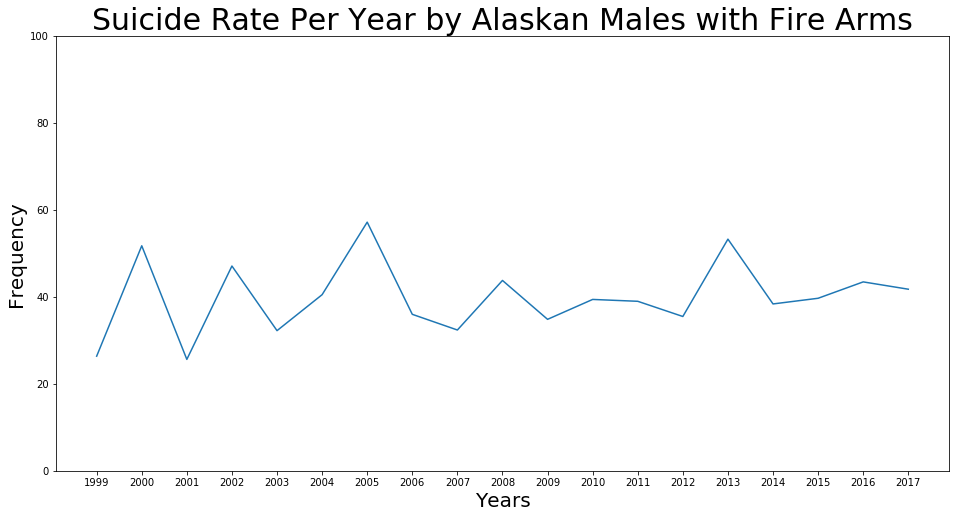

In [1383]:
#Graph of Alaskan Males by Firearms 1999-2017
fig, ax = plt.subplots(figsize=(16,8))
ax.plot(ak_maleFA['Year'], ak_maleFA['Crude Rate'])
ax.set_title('Suicide Rate Per Year by Alaskan Males with Fire Arms', size=30 )
ax.set_xlabel('Years',  size = 20)
ax.set_ylabel('Frequency', size=20)
ax.set_xticks(ak_maleFA['Year']);
ax.set_ylim (0,100)

In [1384]:
#White males in alaska
ak_wdf = alaska_df[alaska_df['Race'] == 'White']
ak_whmaleFA = ak_wdf[ak_wdf['Gender'] == 'Male'] [ak_wdf['Method'] == 'Firearm']

/Users/starrtouch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [1385]:
ak_whmaleFA

,State,Year,Gender,Race,Method,Deaths,Population,Crude Rate
147,Alaska,1999,Male,White,Firearm,30,242016,12.40
150,Alaska,2000,Male,White,Firearm,53,240925,22.00
152,Alaska,2001,Male,White,Firearm,45,243010,18.52
155,Alaska,2002,Male,White,Firearm,44,245728,17.91
159,Alaska,2003,Male,White,Firearm,50,246827,20.26
163,Alaska,2004,Male,White,Firearm,56,250719,22.34
166,Alaska,2005,Male,White,Firearm,39,253360,15.39
170,Alaska,2006,Male,White,Firearm,47,256051,18.36
173,Alaska,2007,Male,White,Firearm,61,257707,23.67
177,Alaska,2008,Male,White,Firearm,74,260411,28.42


In [1386]:
def plot_rate_by_year(State, Gender, Race, Method, ax):
    state_df = us_df[us_df['State'] == State]
    st_race = state_df[state_df['Race'] == Race]
    df = st_race[st_race['Gender'] == Gender] [st_race['Method'] == Method]
    
    
    ax.plot(df['Year'], df['Crude Rate'], label = f'{Race} {Gender} by {Method} in {State}')
    ax.set_title(f'Suicide Rate in {State} Per Year by {Race} {Gender} with {Method}', size=24 )
    ax.set_xlabel('Years',  size = 30)
    ax.set_ylabel('Deaths Per 100,000', size=30)
    ax.set_xticks(df['Year'])
    ax.set_ylim (0,70)
    ax.tick_params(labelsize = 14)
    

/Users/starrtouch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


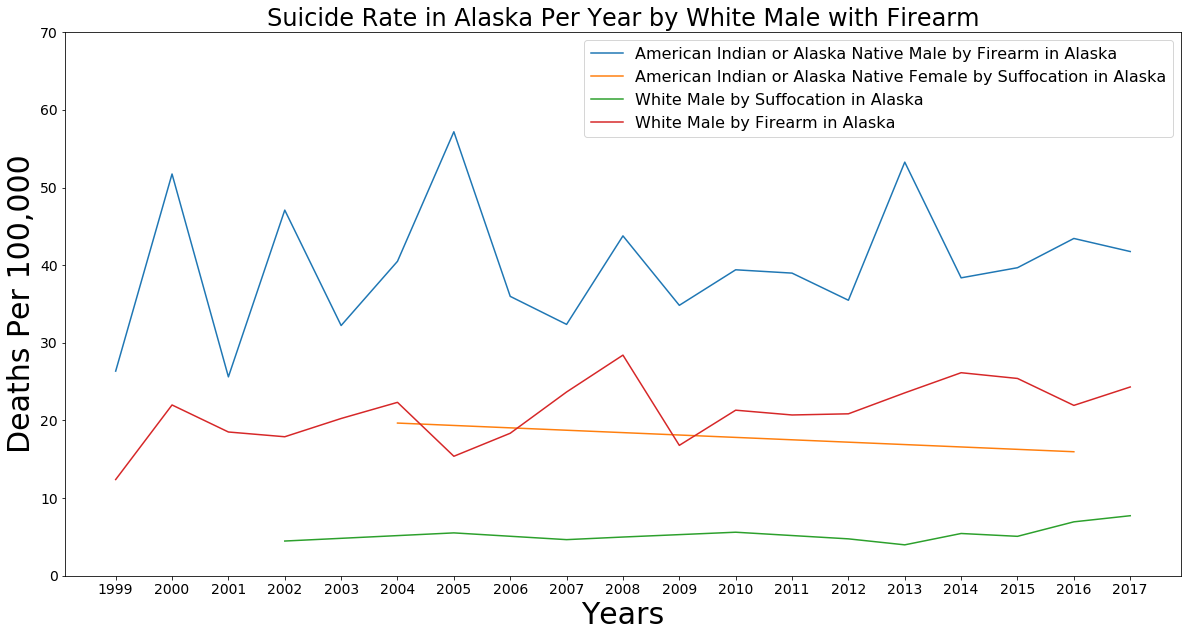

In [1387]:
#Comparing white males to alaskan natives 
fig, ax = plt.subplots(figsize =(20,10) )
plot_rate_by_year('Alaska', 'Male','American Indian or Alaska Native','Firearm',ax)
plot_rate_by_year('Alaska', 'Female','American Indian or Alaska Native','Suffocation',ax)
plot_rate_by_year('Alaska', 'Male','White','Suffocation',ax)
plot_rate_by_year('Alaska', 'Male','White','Firearm',ax)
ax.legend(fontsize=16);

In [1388]:
alaska_df[alaska_df['Gender'] == 'Female']

,State,Year,Gender,Race,Method,Deaths,Population,Crude Rate
153,Alaska,2002,Female,White,Firearm,17,222980,0.0
160,Alaska,2004,Female,American Indian or Alaska Native,Suffocation,11,55929,0.0
164,Alaska,2005,Female,White,Firearm,10,229332,0.0
182,Alaska,2010,Female,White,Firearm,15,240153,0.0
195,Alaska,2013,Female,White,Firearm,14,243625,0.0
203,Alaska,2015,Female,White,Firearm,18,241038,0.0
209,Alaska,2016,Female,American Indian or Alaska Native,Suffocation,10,62594,0.0
210,Alaska,2016,Female,White,Firearm,13,242824,0.0
211,Alaska,2016,Female,White,Poisoning,10,242824,0.0


/Users/starrtouch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


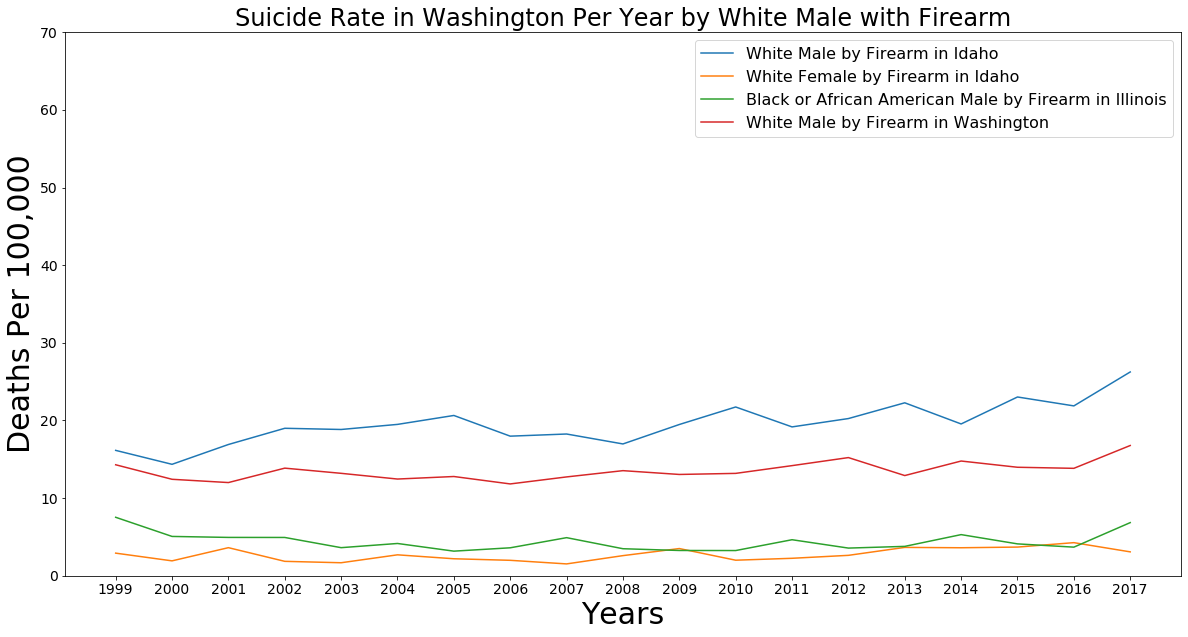

In [1389]:
#Compare different states
fig, ax = plt.subplots(figsize =(20,10) )
plot_rate_by_year('Idaho', 'Male','White','Firearm',ax)
plot_rate_by_year('Idaho', 'Female','White','Firearm',ax)
plot_rate_by_year('Illinois', 'Male','Black or African American','Firearm',ax)
plot_rate_by_year('Washington', 'Male','White','Firearm',ax)
ax.legend(fontsize=16);

In [1390]:
#Poison in colorado aka OD 1999-2017
death_poison_co=sum(co_df[co_df['Gender'] =='Female'] [co_df['Method']== 'Poisoning']['Deaths'])

/Users/starrtouch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [1391]:
death_poison_co

1517

In [1392]:
#Show unique methods
np.unique(us_df['Method'])

array(['Cut/Pierce', 'Drowning', 'Fall', 'Fire/Flame', 'Firearm',
       'Other land transport', 'Other specified, classifiable Injury',
       'Other specified, not elsewhere classified Injury', 'Poisoning',
       'Suffocation', 'Unspecified Injury'], dtype=object)

In [1393]:
# count deaths by state
counting=us_df.groupby(['State','Method']).sum().drop(columns=['Year', 'Population','Crude Rate'])

In [1394]:
counting.head(50)

Deaths
State                Method                                                  
Alabama              Cut/Pierce                                            13
                     Firearm                                             8393
                     Poisoning                                           1051
                     Suffocation                                         1778
                     Unspecified Injury                                    58
Alaska               Firearm                                             1583
                     Poisoning                                             42
                     Suffocation                                          383
Arizona              Cut/Pierce                                           183
                     Fall                                                  52
                     Firearm                                            11086
                     Other specified, classifiable Injury                  11
                     Poisoning                                           3136
                     Suffocation                                         3702
Arkansas             Firearm                                             5331
                     Poisoning                                           1089
                     Suffocation                                         1335
California           Cut/Pierce                                          1487
                     Drowning                                             590
                     Fall                                                2671
                     Fire/Flame                                           114
                     Firearm                                            28122
                     Other land transport                                 272
                     Other specified, classifiable Injury                1246
                     Other specified, not elsewhere classified Injury     367
                     Poisoning                                          12601
                     Suffocation                                        19537
                     Unspecified Injury                                   165
Colorado             Cut/Pierce                                           120
                     Fall                                                 104
                     Firearm                                             8091
                     Poisoning                                           3292
                     Suffocation                                         3605
Connecticut          Cut/Pierce                                            23
                     Fall                                                  20
                     Firearm                                             1769
                     Poisoning                                           1281
                     Suffocation                                         2020
Delaware             Firearm                                              731
                     Poisoning                                            171
                     Suffocation                                          365
District of Columbia Firearm                                               16
                     Poisoning                                             12
Florida              Cut/Pierce                                           826
                     Drowning                                             662
                     Fall                                                1023
                     Fire/Flame                                            22
                     Firearm                                            26067
                     Other land transport                                  25
                     Other specified, classifiable Injury                 357

In [1395]:
#Count Utah
counting.loc['Utah']

,Deaths
Method,
Firearm,4291
Poisoning,1666
Suffocation,1752


In [1396]:
#Utahs only reported Suicides are 3 methods
sum_st_yr_method=us_df.groupby(['State','Year','Method']).sum().drop(columns=['Population','Crude Rate'])

In [1397]:
sum_st_yr_method.head()

Deaths
State   Year Method             
Alabama 1999 Firearm         430
             Poisoning        55
             Suffocation      35
        2000 Firearm         421
             Poisoning        61

In [1398]:
#explore colorados' deaths 2000-2010
sum_st_yr_method.loc['Colorado'].loc[2000:2010]

Deaths
Year Method             
2000 Firearm         333
     Poisoning       111
     Suffocation     117
2001 Firearm         380
     Poisoning       171
     Suffocation     116
2002 Cut/Pierce       10
     Firearm         361
     Poisoning       159
     Suffocation     139
2003 Cut/Pierce       15
     Firearm         354
     Poisoning       161
     Suffocation     147
2004 Firearm         394
     Poisoning       177
     Suffocation     156
2005 Cut/Pierce       10
     Firearm         382
     Poisoning       173
     Suffocation     178
2006 Firearm         353
     Poisoning       145
     Suffocation     157
2007 Cut/Pierce       10
     Firearm         380
     Poisoning       186
     Suffocation     152
2008 Firearm         369
     Poisoning       184
     Suffocation     178
2009 Cut/Pierce       12
     Fall             12
     Firearm         440
     Poisoning       188
     Suffocation     219
2010 Firearm         415
     Poisoning       163
     Suffocation     201

/Users/starrtouch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


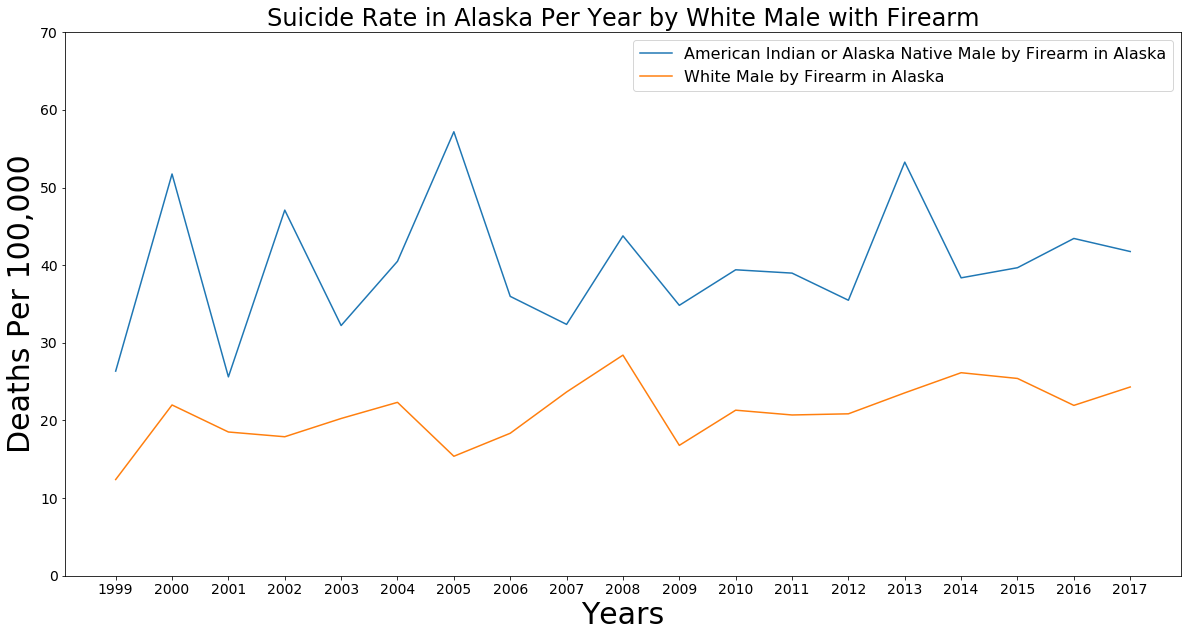

In [1399]:
#plotting white male in alaska
fig, ax = plt.subplots(figsize =(20,10) )
plot_rate_by_year('Alaska', 'Male','American Indian or Alaska Native','Firearm',ax)
plot_rate_by_year('Alaska', 'Male','White','Firearm',ax)

ax.legend(fontsize=16);

In [1400]:
us_df.head()

,State,Year,Gender,Race,Method,Deaths,Population,Crude Rate
0,Alabama,1999,Female,White,Firearm,63,1640665,3.839906
1,Alabama,1999,Female,White,Poisoning,19,1640665,1.158067
2,Alabama,1999,Male,Black or African American,Firearm,41,539198,7.603886
3,Alabama,1999,Male,White,Firearm,326,1570643,20.755831
4,Alabama,1999,Male,White,Poisoning,36,1570643,2.292055


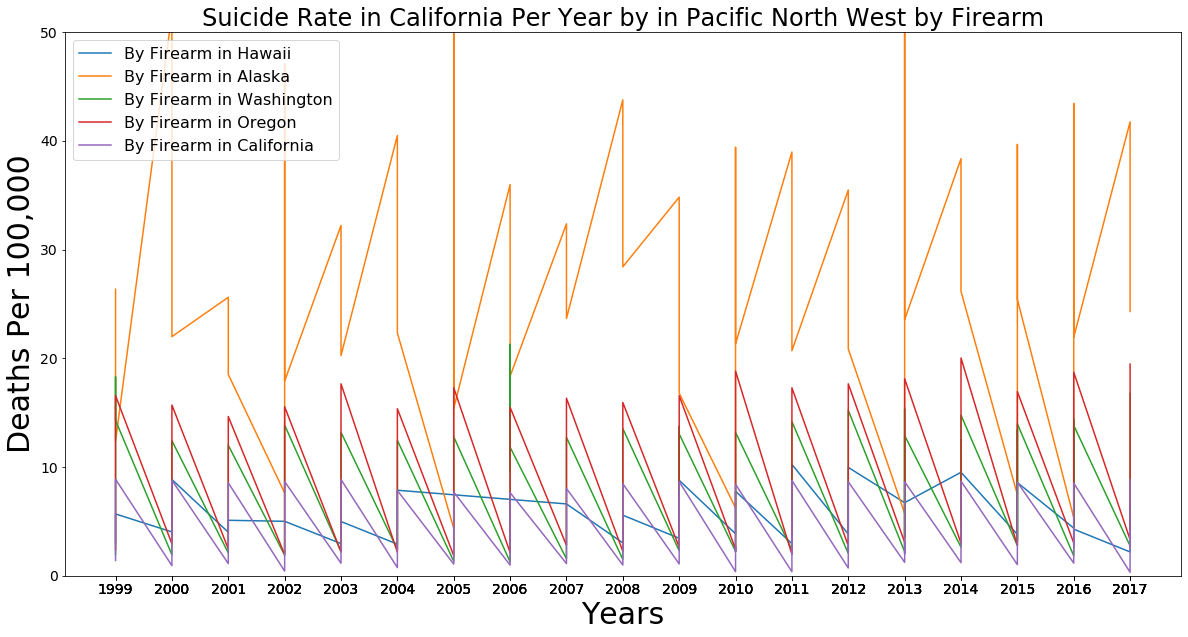

In [1401]:
#Sudicde Rates By Region in the US-PACIFIC WEST White Male By Fire Arm
#Alaska, Hawaii, Washington, Oregon, California
#Idaho, Montana, Wyoming,Calafornia, Nevada, Utah, Colorado, Arizona
def plot_rate_by_state_method_only(State, Method, ax):
    state_df = us_df[us_df['State'] == State]
    
    df = state_df[state_df['Method'] == Method]
    
    ax.plot(df['Year'], df['Crude Rate'], label = f'By {Method} in {State}')
    ax.set_title(f'Suicide Rate in {State} Per Year by in Pacific North West by {Method}', size=24 )
    ax.set_xlabel('Years',  size = 30)
    ax.set_ylabel('Deaths Per 100,000', size=30)
    ax.set_xticks(df['Year'])
    ax.set_ylim (0,50)
    ax.tick_params(labelsize = 14)
    
fig, ax = plt.subplots(figsize =(20,10))

#Pacific regions
plot_rate_by_state_method_only('Hawaii', 'Firearm',ax)
plot_rate_by_state_method_only('Alaska', 'Firearm',ax)

plot_rate_by_state_method_only('Washington', 'Firearm',ax)
plot_rate_by_state_method_only('Oregon', 'Firearm',ax)
plot_rate_by_state_method_only('California', 'Firearm',ax)

ax.legend(fontsize=16);

#plot_rate_by_year('Washington', Firearm',ax)
# plot_rate_by_year('Oregon', 'Male','White','Firearm',ax)
# plot_rate_by_year('California', 'Male','White','Firearm',ax)

# plot_rate_by_year('Idaho', 'Male','White','Firearm',ax)
# plot_rate_by_year('Montana', 'Male','White','Firearm',ax)
# plot_rate_by_year('Wyoming', 'Male','White','Firearm',ax)

# plot_rate_by_year('Utah', 'Male','White','Firearm',ax)
# plot_rate_by_year('Nevada', 'Male','White','Firearm',ax)
# plot_rate_by_year('Colorado', 'Male','White','Firearm',ax)

# plot_rate_by_year('Arizona', 'Male','White','Firearm',ax)
# plot_rate_by_year('New Mexico', 'Male','White','Firearm',ax)
# plot_rate_by_year('Texas', 'Male','White','Firearm',ax)



In [1402]:
#Above is useless

In [1403]:
us_df

,State,Year,Gender,Race,Method,Deaths,Population,Crude Rate
0,Alabama,1999,Female,White,Firearm,63,1640665,3.839906
1,Alabama,1999,Female,White,Poisoning,19,1640665,1.158067
2,Alabama,1999,Male,Black or African American,Firearm,41,539198,7.603886
3,Alabama,1999,Male,White,Firearm,326,1570643,20.755831
4,Alabama,1999,Male,White,Poisoning,36,1570643,2.292055
...,...,...,...,...,...,...,...,...
7499,Wyoming,2016,Male,White,Poisoning,11,280805,3.917309
7500,Wyoming,2016,Male,White,Suffocation,18,280805,6.410142
7501,Wyoming,2017,Female,White,Suffocation,10,267334,3.740639
7502,Wyoming,2017,Male,White,Firearm,84,277447,30.276053


/Users/starrtouch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


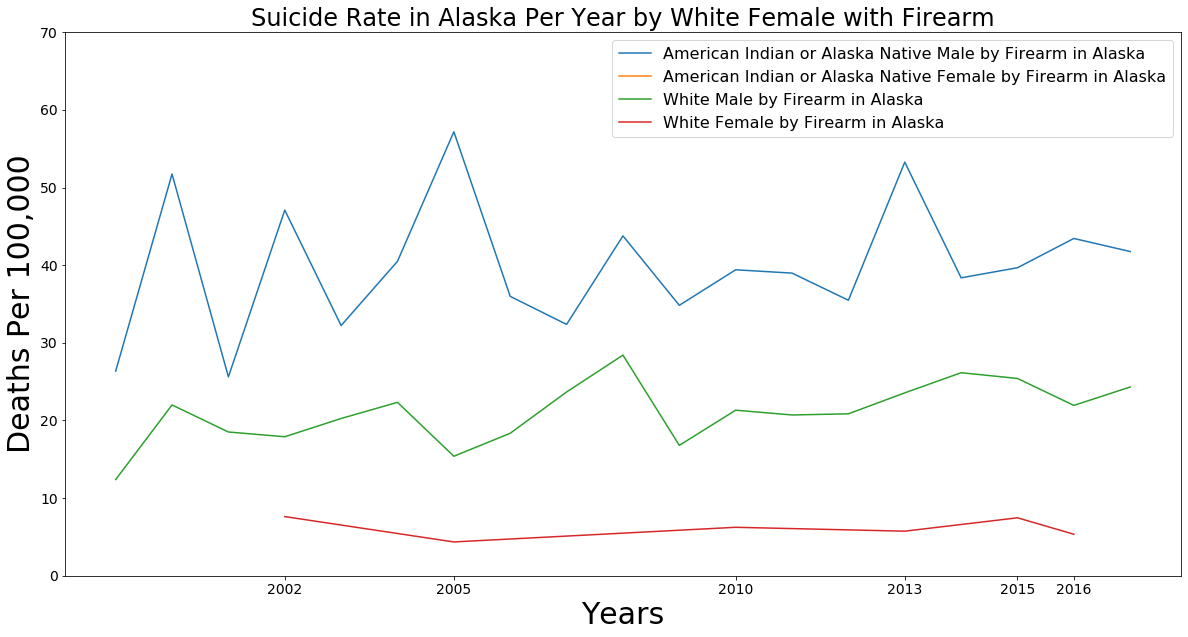

In [1404]:
fig, ax = plt.subplots(figsize =(20,10) )
plot_rate_by_year('Alaska', 'Male','American Indian or Alaska Native','Firearm',ax)
plot_rate_by_year('Alaska', 'Female','American Indian or Alaska Native','Firearm',ax)

plot_rate_by_year('Alaska', 'Male','White','Firearm',ax)
plot_rate_by_year('Alaska', 'Female','White','Firearm',ax)
ax.legend(fontsize=16);

In [1405]:
def plot_rate_by_year_no_method(State, Gender, Race, ax):
    state_df = us_df[us_df['State'] == State]
    st_race = state_df[state_df['Race'] == Race]
    df = st_race[st_race['Gender'] == Gender] #[st_race['Method'] == Method]
    
    
    ax.plot(df['Year'], df['Crude Rate'], label = f'{Race} {Gender} by  in {State}')
    ax.set_title(f'Suicide Rate in {State} Per Year by {Race} {Gender} with', size=24 )
    ax.set_xlabel('Years',  size = 30)
    ax.set_ylabel('Deaths Per 100,000', size=30)
    ax.set_xticks(df['Year'])
    ax.set_ylim (0,30)
    ax.tick_params(labelsize = 14)


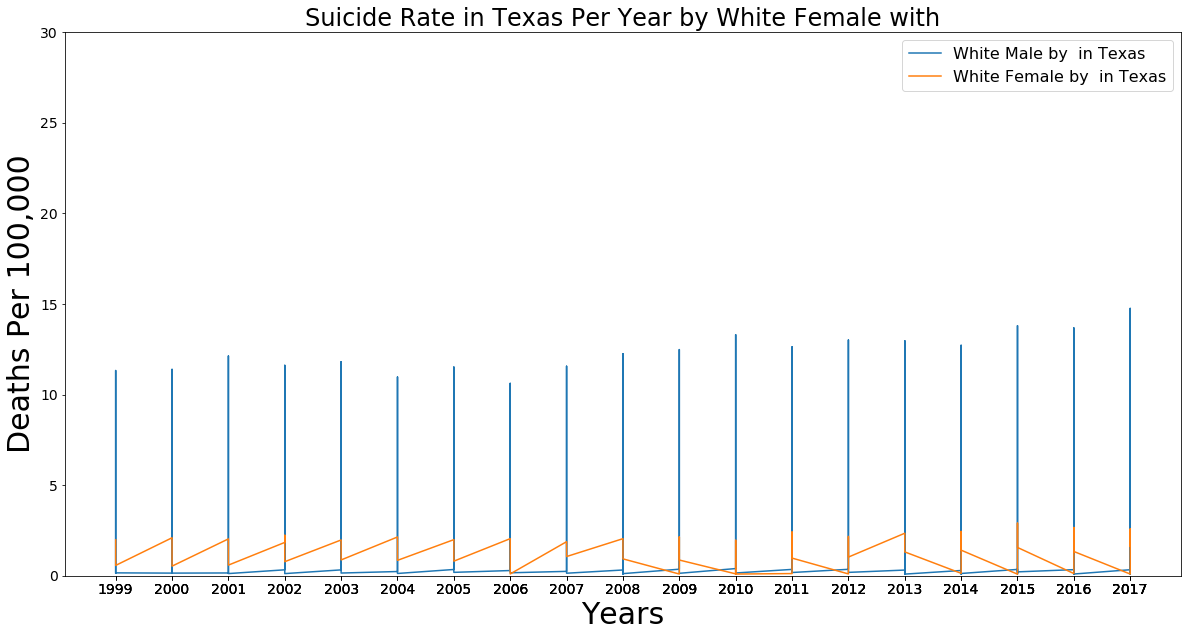

In [1406]:
#testing function
fig, ax = plt.subplots(figsize =(20,10) )
plot_rate_by_year_no_method('Texas', 'Male','White',ax)
plot_rate_by_year_no_method('Texas', 'Female','White',ax)
ax.legend(fontsize=16);

In [1407]:
#Above is unhelpful
np.unique(us_df['Race'])

array(['American Indian or Alaska Native', 'Asian or Pacific Islander',
       'Black or African American', 'White'], dtype=object)

/Users/starrtouch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


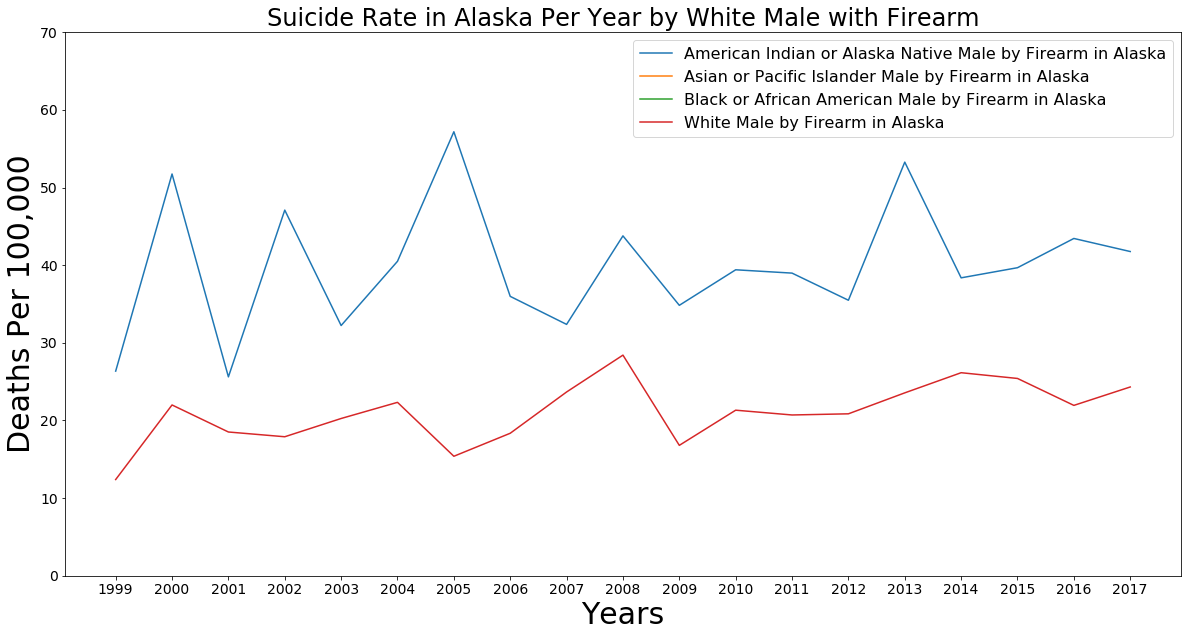

In [1408]:
fig, ax = plt.subplots(figsize =(20,10) )
plot_rate_by_year('Alaska', 'Male','American Indian or Alaska Native','Firearm',ax)
plot_rate_by_year('Alaska', 'Male','Asian or Pacific Islander','Firearm',ax)
plot_rate_by_year('Alaska', 'Male','Black or African American','Firearm',ax)
plot_rate_by_year('Alaska', 'Male','White','Firearm',ax)

ax.legend(fontsize=16);

/Users/starrtouch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


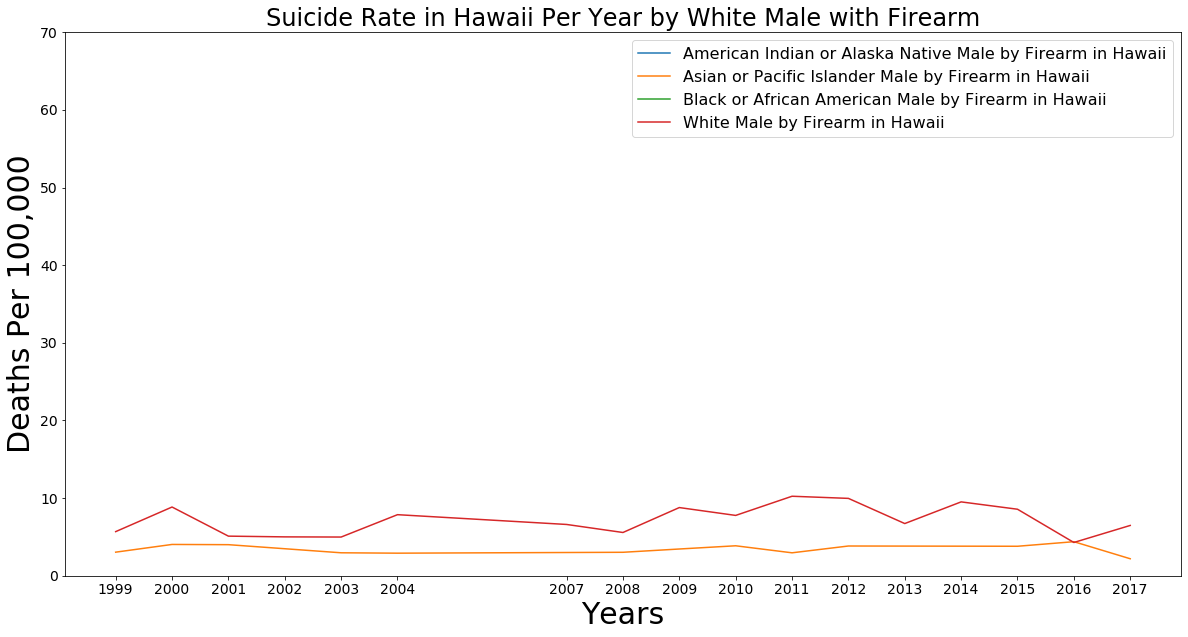

In [1409]:
fig, ax = plt.subplots(figsize =(20,10) )
plot_rate_by_year('Hawaii', 'Male','American Indian or Alaska Native','Firearm',ax)
plot_rate_by_year('Hawaii', 'Male','Asian or Pacific Islander','Firearm',ax)
plot_rate_by_year('Hawaii', 'Male','Black or African American','Firearm',ax)
plot_rate_by_year('Hawaii', 'Male','White','Firearm',ax)

ax.legend(fontsize=16);

/Users/starrtouch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


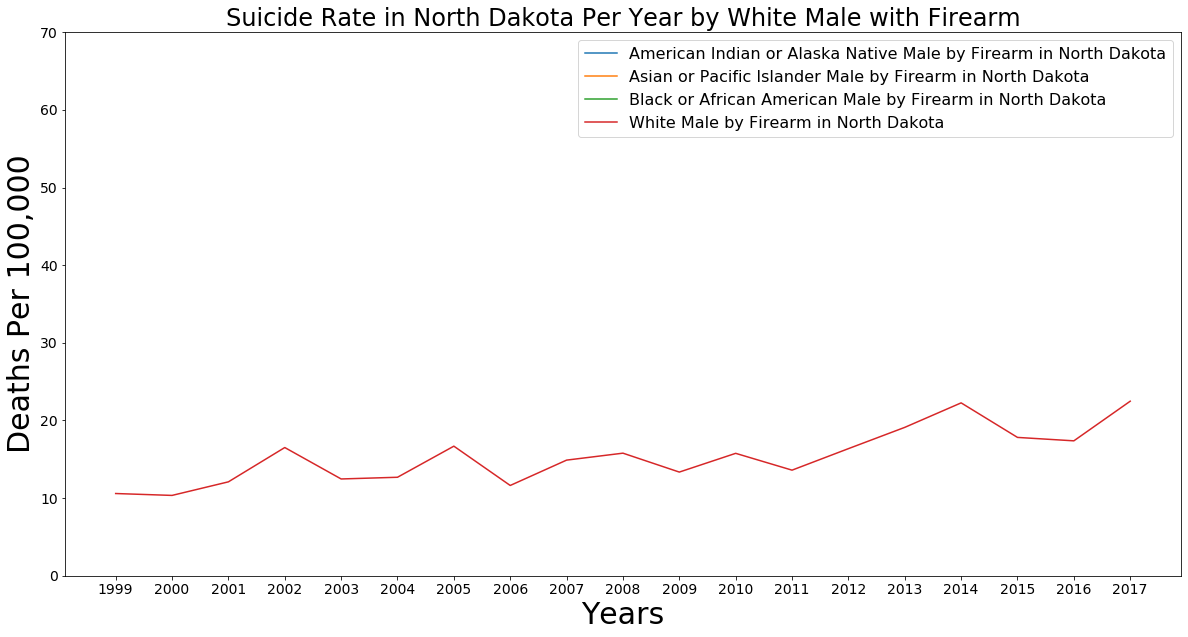

In [1410]:
fig, ax = plt.subplots(figsize =(20,10) )
plot_rate_by_year('North Dakota', 'Male','American Indian or Alaska Native','Firearm',ax)
plot_rate_by_year('North Dakota', 'Male','Asian or Pacific Islander','Firearm',ax)
plot_rate_by_year('North Dakota', 'Male','Black or African American','Firearm',ax)
plot_rate_by_year('North Dakota', 'Male','White','Firearm',ax)

ax.legend(fontsize=16);

In [1411]:
np.unique(us_df['Method'])

array(['Cut/Pierce', 'Drowning', 'Fall', 'Fire/Flame', 'Firearm',
       'Other land transport', 'Other specified, classifiable Injury',
       'Other specified, not elsewhere classified Injury', 'Poisoning',
       'Suffocation', 'Unspecified Injury'], dtype=object)

/Users/starrtouch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


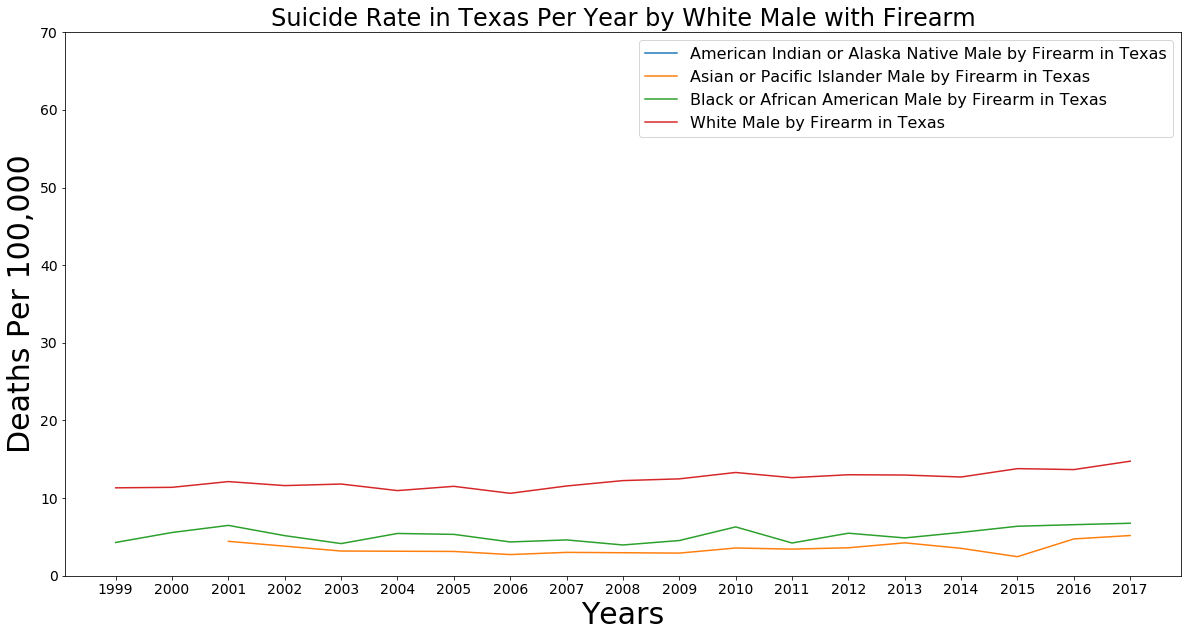

In [1412]:
#Looking at reace differeinces in Texas
fig, ax = plt.subplots(figsize =(20,10) )
plot_rate_by_year('Texas', 'Male','American Indian or Alaska Native','Firearm',ax)
plot_rate_by_year('Texas', 'Male','Asian or Pacific Islander','Firearm',ax)
plot_rate_by_year('Texas', 'Male','Black or African American','Firearm',ax)
plot_rate_by_year('Texas', 'Male','White','Firearm',ax)

ax.legend(fontsize=16);


/Users/starrtouch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


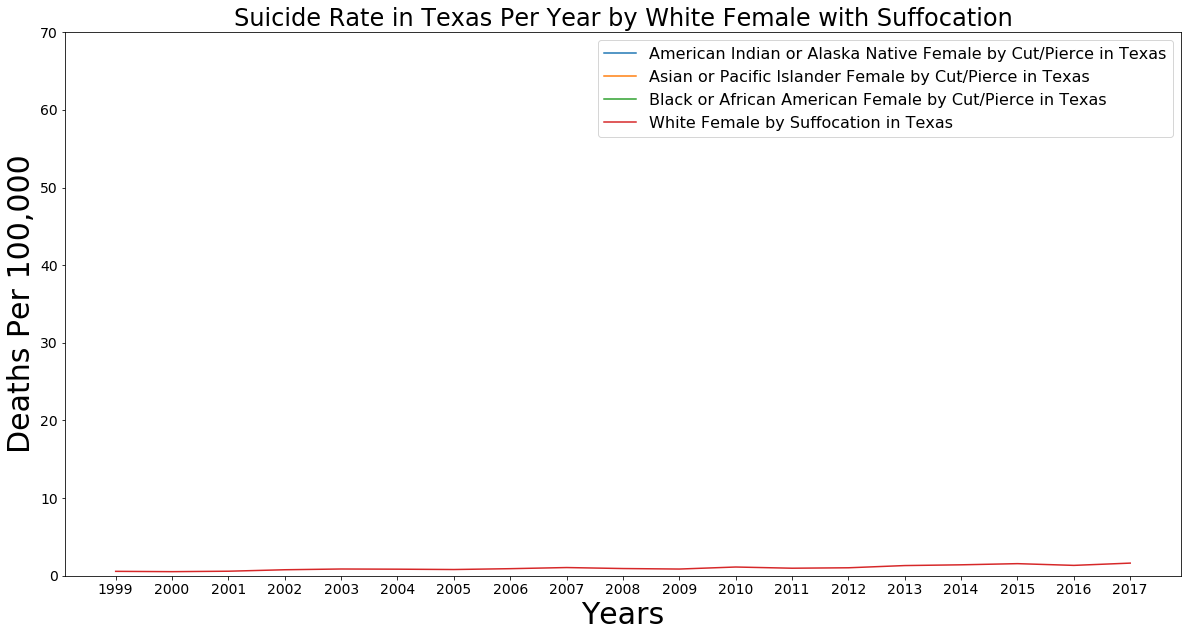

In [1413]:
fig, ax = plt.subplots(figsize =(20,10) )
plot_rate_by_year('Texas', 'Female','American Indian or Alaska Native','Cut/Pierce',ax)
plot_rate_by_year('Texas', 'Female','Asian or Pacific Islander','Cut/Pierce',ax)
plot_rate_by_year('Texas', 'Female','Black or African American','Cut/Pierce',ax)
plot_rate_by_year('Texas', 'Female','White','Suffocation',ax)

ax.legend(fontsize=16);

Text(0.5, 1.0, 'Suicide Crude Rate Histogram')

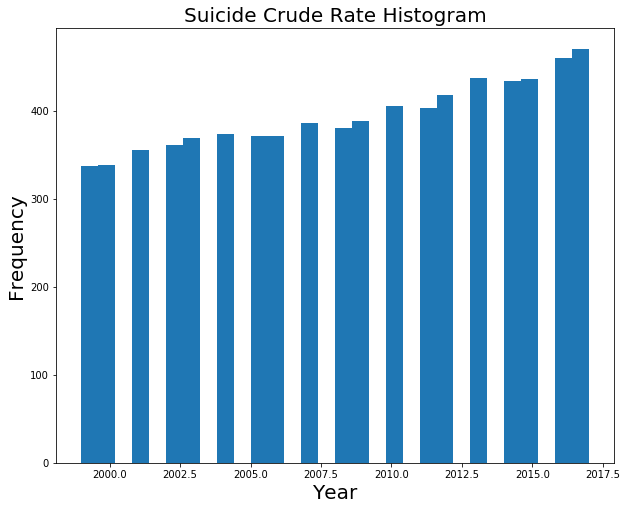

In [1414]:
#Crude Rate 1999-2017 Explore how rates have changed over the years
ax = us_df['Year'].plot(kind="hist",bins=30,figsize=(10,8))
ax.set_xlabel('Year', size=20)
ax.set_ylabel('Frequency', size=20)
ax.set_title('Suicide Crude Rate Histogram',size = 20)

In [1415]:
#creating california data frame to build histogram that will be used in function later. 
ca_us_df.head(15)

temp001=ca_us_df.groupby(['Year','Gender','Method']).sum().iloc[:,0:1]
temp002=ca_us_df.groupby(['Year','Method']).sum().iloc[:,0:1]

In [1416]:
temp001.head(15)

Deaths
Year Gender Method                                                  
1999 Female Cut/Pierce                                            11
            Drowning                                              13
            Fall                                                  18
            Firearm                                              187
            Other specified, classifiable Injury                  11
            Poisoning                                            226
            Suffocation                                          121
     Male   Cut/Pierce                                            51
            Drowning                                              13
            Fall                                                  76
            Firearm                                             1323
            Other specified, classifiable Injury                  26
            Other specified, not elsewhere classified Injury      18
            Poisoning                                            294
            Suffocation                                          555

In [1417]:
#1999
temp001.loc[2017]

Deaths
Gender Method                                                  
Female Cut/Pierce                                            21
       Drowning                                              23
       Fall                                                  40
       Firearm                                              145
       Other specified, classifiable Injury                  37
       Poisoning                                            318
       Suffocation                                          325
Male   Cut/Pierce                                            96
       Drowning                                              30
       Fall                                                 138
       Fire/Flame                                            10
       Firearm                                             1464
       Other land transport                                  18
       Other specified, classifiable Injury                  96
       Other specified, not elsewhere classified Injury      12
       Poisoning                                            334
       Suffocation                                         1113

In [1418]:
temp001.loc[2017]

Deaths
Gender Method                                                  
Female Cut/Pierce                                            21
       Drowning                                              23
       Fall                                                  40
       Firearm                                              145
       Other specified, classifiable Injury                  37
       Poisoning                                            318
       Suffocation                                          325
Male   Cut/Pierce                                            96
       Drowning                                              30
       Fall                                                 138
       Fire/Flame                                            10
       Firearm                                             1464
       Other land transport                                  18
       Other specified, classifiable Injury                  96
       Other specified, not elsewhere classified Injury      12
       Poisoning                                            334
       Suffocation                                         1113

In [1419]:
temp001.loc[2017]

Deaths
Gender Method                                                  
Female Cut/Pierce                                            21
       Drowning                                              23
       Fall                                                  40
       Firearm                                              145
       Other specified, classifiable Injury                  37
       Poisoning                                            318
       Suffocation                                          325
Male   Cut/Pierce                                            96
       Drowning                                              30
       Fall                                                 138
       Fire/Flame                                            10
       Firearm                                             1464
       Other land transport                                  18
       Other specified, classifiable Injury                  96
       Other specified, not elsewhere classified Injury      12
       Poisoning                                            334
       Suffocation                                         1113

In [1420]:
temp001.loc[2017].loc['Female'].reset_index()['Method']

0                              Cut/Pierce
1                                Drowning
2                                    Fall
3                                 Firearm
4    Other specified, classifiable Injury
5                               Poisoning
6                             Suffocation
Name: Method, dtype: object

In [1421]:
tempxdata = temp001.loc[2017].loc['Female'].index

In [1422]:
tempydata = temp001.loc[2017].loc['Female']['Deaths']

In [1423]:
tempxdata

Index(['Cut/Pierce', 'Drowning', 'Fall', 'Firearm',
       'Other specified, classifiable Injury', 'Poisoning', 'Suffocation'],
      dtype='object', name='Method')

In [1424]:
newxdata = []
newydata = []
other_sum = 0

for x, y in zip(tempxdata, tempydata):
    if 'Other' in x:
        other_sum += y
    else:
        newxdata.append(x)
        newydata.append(y)
newxdata.append('Other')
newydata.append(other_sum)

In [1425]:
tempxdata = ['Cut/Pierce', 'Drowning', 'Fall', 'Firearm',
             'Other Injury','Other Not Clasified', 'Poisoning','Suffocation']

In [1426]:
newxdata

['Cut/Pierce',
 'Drowning',
 'Fall',
 'Firearm',
 'Poisoning',
 'Suffocation',
 'Other']

In [1427]:
newydata

[21, 23, 40, 145, 318, 325, 37]

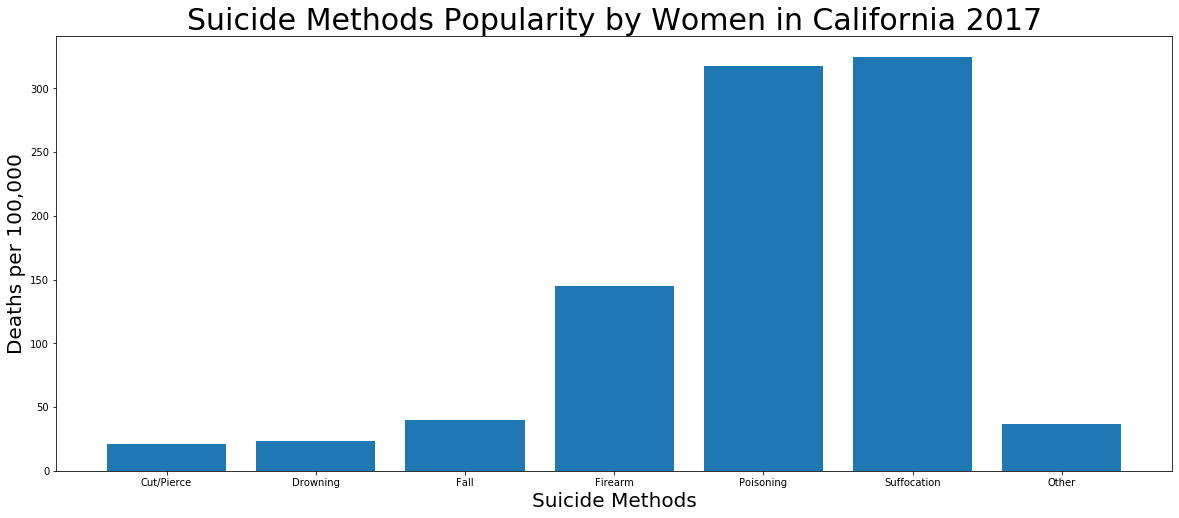

In [1428]:
fig, ax = plt.subplots(figsize=(20,8))
ax.bar(newxdata,newydata)
ax.set_title('Suicide Methods Popularity by Women in California 2017', size = 30)
ax.set_xlabel('Suicide Methods', size = 20)
ax.set_ylabel('Deaths per 100,000', size = 20);


In [1429]:
#Function to graphe state, year, gender, suicide popularity
def suicide_bar_state_year(State, Year, Gender):
    
    state_df = us_df[us_df['State'] == State]
    temp001= state_df.groupby(['Year','Gender','Method']).sum().iloc[:,0:1]
    temp002= state_df.groupby(['Year','Method']).sum().iloc[:,0:1]

    temp001.loc[Year]
    
    try: 
        temp001.loc[Year].loc[Gender].reset_index()['Method']
    except:
        print(f'Found no data for {State}, {Year}, {Gender}')

    tempxdata = temp001.loc[Year].loc[Gender].index

    tempydata = temp001.loc[Year].loc[Gender]['Deaths']

    tempxdata

    newxdata = []
    newydata = []
    other_sum = 0

    for x, y in zip(tempxdata, tempydata):
        if 'Other' in x:
            other_sum += y
        else:
            newxdata.append(x)
            newydata.append(y)
    newxdata.append('Other')
    newydata.append(other_sum)
    
    if Gender == 'Female':
        Gen = 'Women'
    elif Gender == 'Male':
        Gen = 'Men'
            

    fig, ax = plt.subplots(figsize=(20,8))
    ax.bar(newxdata,newydata)
    ax.set_title(f'Popularity of Suicide Methods in {State} by {Gen} in {Year}', size = 30)
    ax.set_xlabel('Suicide Methods', size = 20)
    ax.set_ylabel('Deaths per 100,000', size = 20);


In [1430]:
def suicide_bar_state_only(State, Year, Gender):
    
    state_df = us_df[us_df['State'] == State]
    temp001= state_df.groupby(['Year','Method']).sum().iloc[:,0:1]
    temp002= state_df.groupby(['Year','Method']).sum().iloc[:,0:1]

    temp001.loc[Year]
    #Attempting to catch error when states do not have suicide data by men or women.
    try: 
        temp001.loc[Year].loc[Gender].reset_index()['Method']
    except:
        print(f'Found no data for {State}, {Year}, {Gender}')

    tempxdata = temp001.loc[Year].loc[Gender].index

    tempydata = temp001.loc[Year].loc[Gender]['Deaths']

    tempxdata

    newxdata = []
    newydata = []
    other_sum = 0

    for x, y in zip(tempxdata, tempydata):
        if 'Other' in x:
            other_sum += y
        else:
            newxdata.append(x)
            newydata.append(y)
    newxdata.append('Other')
    newydata.append(other_sum)
    
    if Gender == 'Female':
        Gen = 'Women'
    elif Gender == 'Male':
        Gen = 'Men'
            

    fig, ax = plt.subplots(figsize=(20,8))
    ax.bar(newxdata,newydata)
    ax.set_title(f'Popularity of Suicide Methods in {State}in {Year}', size = 30)
    ax.set_xlabel('Suicide Methods', size = 20)
    ax.set_ylabel('Deaths per 100,000', size = 20);


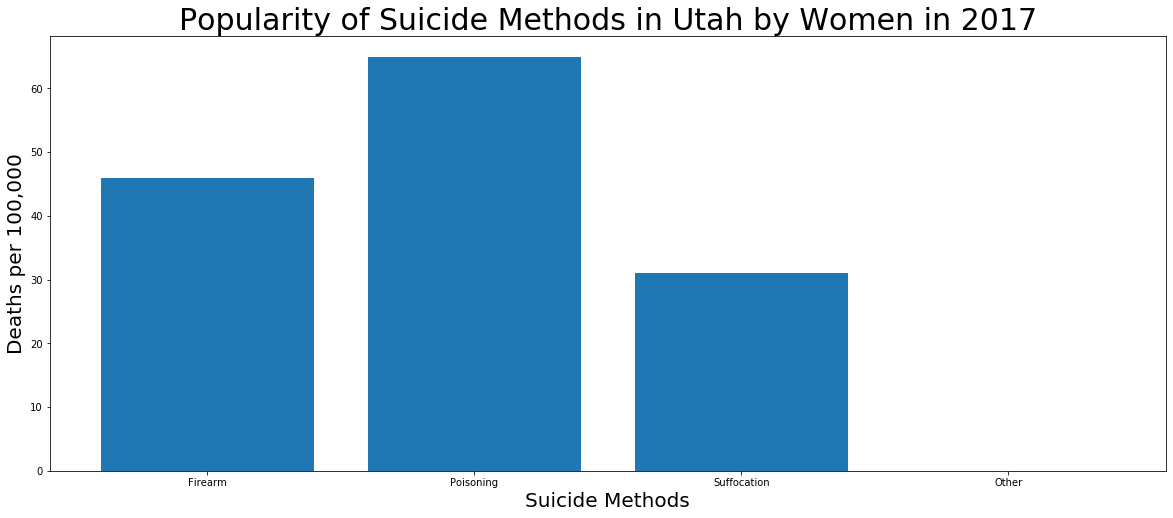

In [1431]:
suicide_bar_state_year('Utah', 2017, 'Female')

In [1432]:
def works(State, Year, Gender):
    
    state_df = us_df[us_df['State'] == State]
    temp001= state_df.groupby(['Year','Gender','Method']).sum().iloc[:,0:1]
    temp002= state_df.groupby(['Year','Method']).sum().iloc[:,0:1]

    temp001.loc[Year]
    try: 
        temp001.loc[Year].loc[Gender].reset_index()['Method']
    except:
        print(f'Found no data for {State}, {Year}, {Gender}')
    tempxdata = temp001.loc[Year].loc[Gender].index

    tempydata = temp001.loc[Year].loc[Gender]['Deaths']

    tempxdata

    newxdata = []
    newydata = []
    other_sum = 0

    for x, y in zip(tempxdata, tempydata):
        if 'Other' in x:
            other_sum += y
        else:
            newxdata.append(x)
            newydata.append(y)
    newxdata.append('Other')
    newydata.append(other_sum)
    
    if Gender == 'Female':
        Gen = 'Women'
    elif Gender == 'Male':
        Gen = 'Men'
            

    fig, ax = plt.subplots(figsize=(20,8))
    ax.bar(newxdata,newydata)
    ax.set_title(f'Popularity of Suicide Methods in {State} by {Gen} in {Year}', size = 30)
    ax.set_xlabel('Suicide Methods', size = 20)
    ax.set_ylabel('Deaths per 100,000', size = 20);


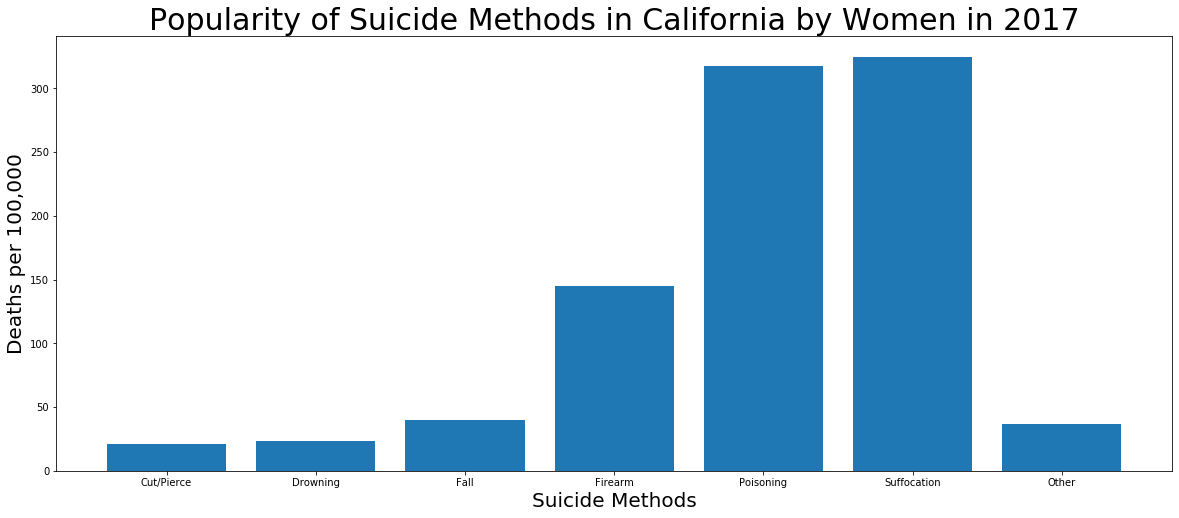

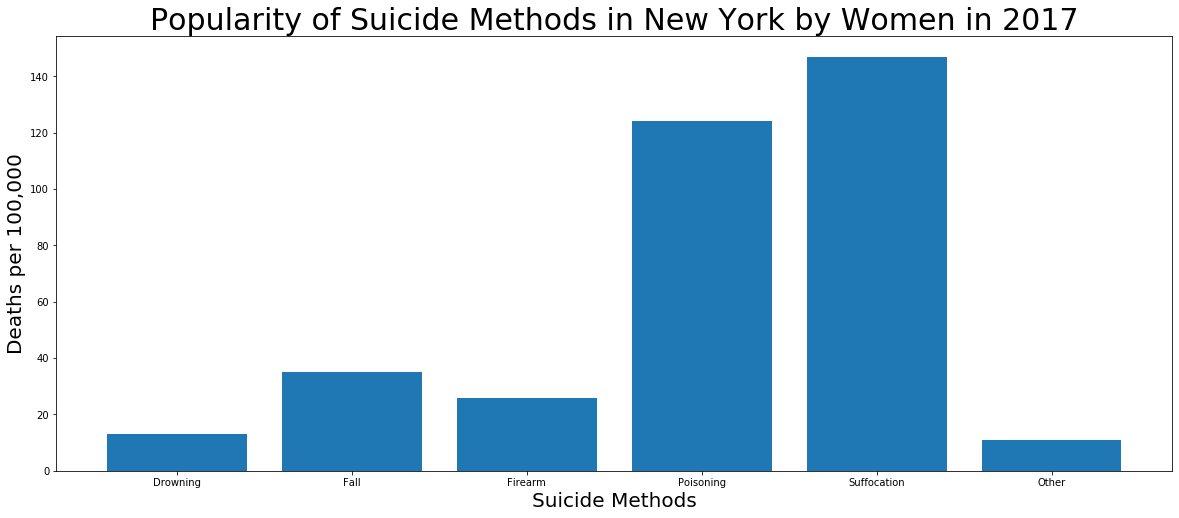

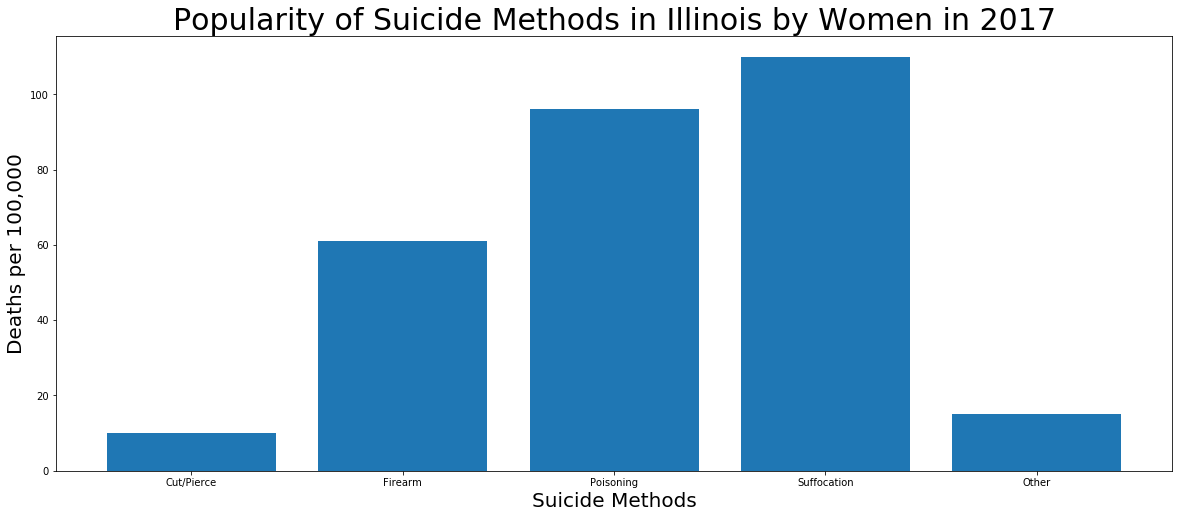

In [1433]:
works('California',2017, 'Female')
suicide_bar_state_year('New York', 2017, 'Female')
suicide_bar_state_year('Illinois', 2017, 'Female')

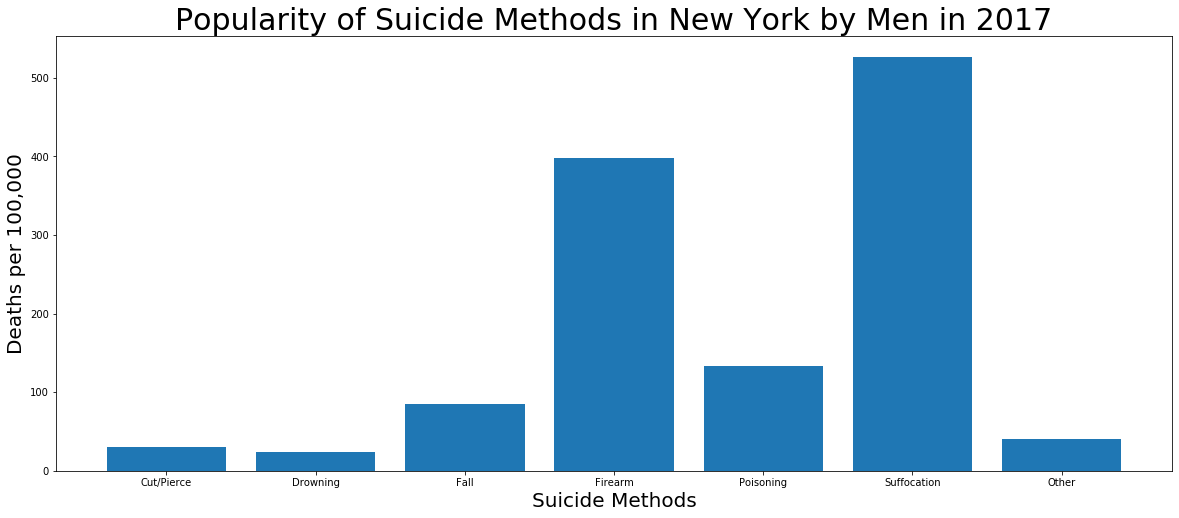

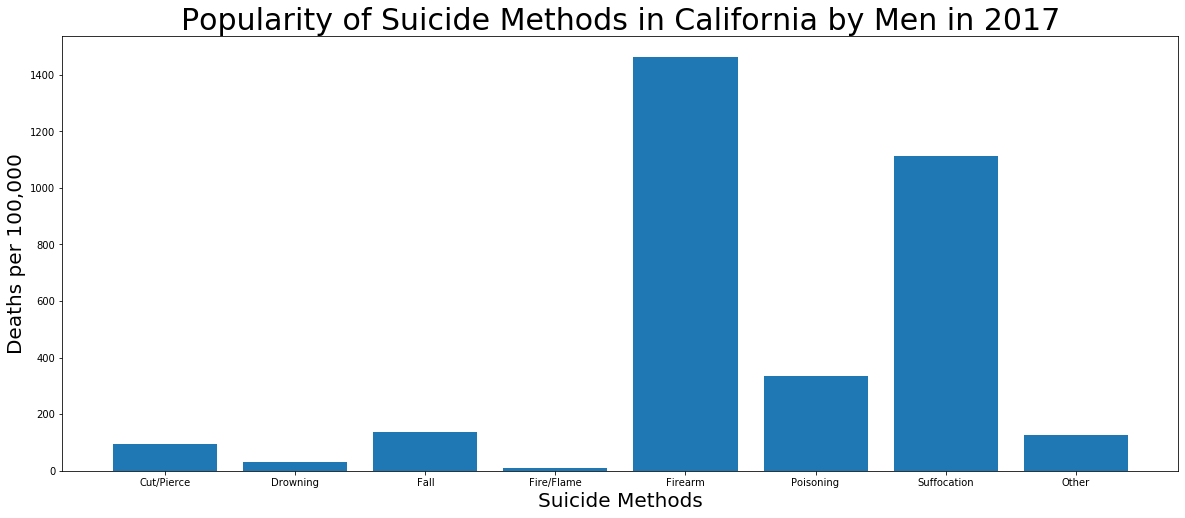

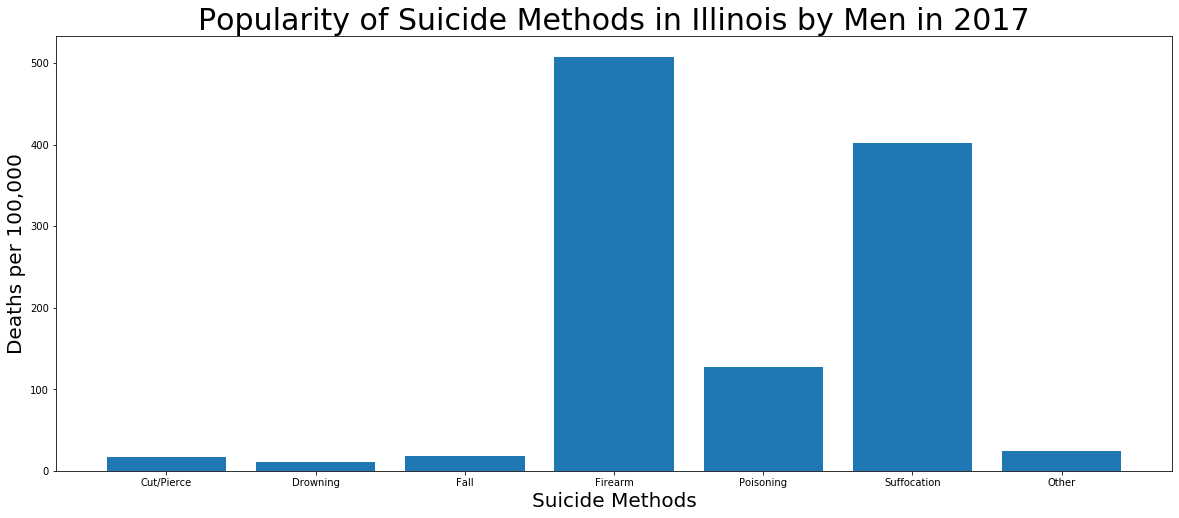

In [1434]:
suicide_bar_state_year('New York', 2017, 'Male')
works('California',2017, 'Male')
works('Illinois',2017, 'Male')

In [1435]:
def works2(State, Year, Gender):
  
    state_df = us_df[us_df['State'] == State]
    temp001= state_df.groupby(['Year','Gender','Method']).sum().iloc[:,0:1]
    temp002= state_df.groupby(['Year','Method']).sum().iloc[:,0:1]

    temp001.loc[Year]
    
    try: 
        temp001.loc[Year].loc[Gender].reset_index()['Method']
    except:
        print(f'Found no data for {State}, {Year}, {Gender}')

    tempxdata = temp001.loc[Year].loc[Gender].index

    tempydata = temp001.loc[Year].loc[Gender]['Deaths']

    tempxdata

    newxdata = []
    newydata = []
    other_sum = 0

    for x, y in zip(tempxdata, tempydata):
        if 'Other' in x:
            other_sum += y
        else:
            newxdata.append(x)
            newydata.append(y)
    newxdata.append('Other')
    newydata.append(other_sum)
    
    if Gender == 'Female':
        Gen = 'Women'
    elif Gender == 'Male':
        Gen = 'Men'
            

    fig, ax = plt.subplots(figsize=(20,8))
    ax.bar(newxdata,newydata)
    ax.set_title(f'Popularity of Suicide Methods in {State} by {Gen} in {Year}', size = 30)
    ax.set_xlabel('Suicide Methods', size = 20)
    ax.set_ylabel('Deaths per 100,000', size = 20);


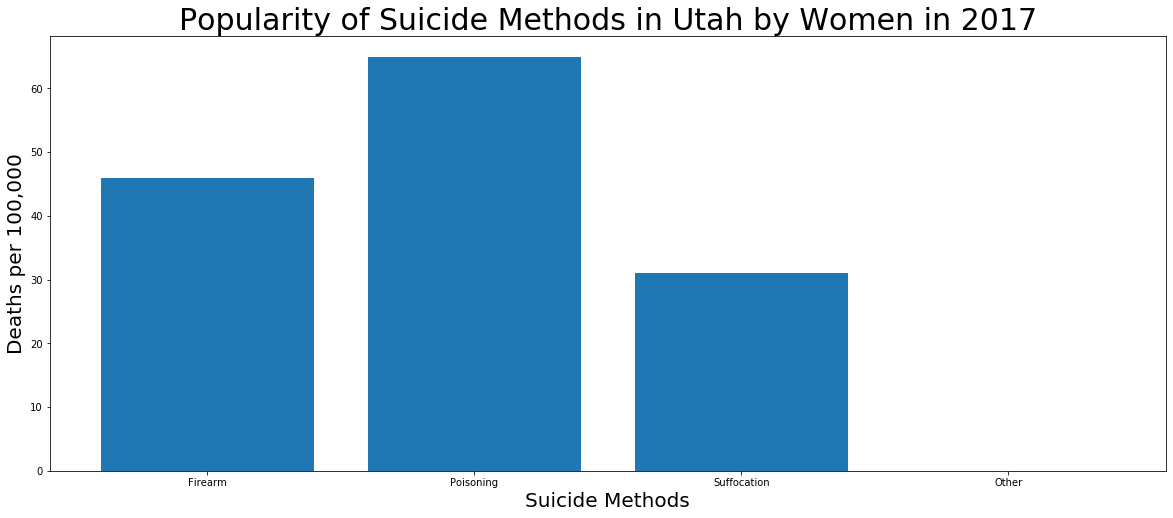

In [1436]:
works2('Utah', 2017, 'Female')

In [1437]:
def works3(State, Year, Gender):
  
    state_df = us_df[us_df['State'] == State]
    temp001= state_df.groupby(['Year','Gender','Method']).sum().iloc[:,0:1]
    temp002= state_df.groupby(['Year','Method']).sum().iloc[:,0:1]

    temp001.loc[Year]
    try: 
        temp001.loc[Year].loc[Gender].reset_index()['Method']
    except:
        print(f'Found no data for {State}, {Year}, {Gender}')

    #temp001.loc[Year].loc[Gender].reset_index()['Method']

    tempxdata = temp001.loc[Year].loc[Gender].index

    tempydata = temp001.loc[Year].loc[Gender]['Deaths']
    
    if Gender == 'Female':
        Gen = 'Women'
    elif Gender == 'Male':
        Gen = 'Men'
        
    newxdata = []
    newydata = []
    other_sum = 0

    if State != 'Alaska':
        for x, y in zip(tempxdata, tempydata):
            if 'Other' in x:
                other_sum += y
            else:
                newxdata.append(x)
                newydata.append(y)
        newxdata.append('Other')
        newydata.append(other_sum)
    else:
        newxdata = []
        newydata = []
            
    fig, ax = plt.subplots(figsize=(20,8))
    ax.bar(newxdata,newydata)
    ax.set_title(f'Popularity of Suicide Methods in {State} by {Gen} in {Year}', size = 30)
    ax.set_xlabel('Suicide Methods', size = 20)
    ax.set_ylabel('Deaths per 100,000', size = 20);


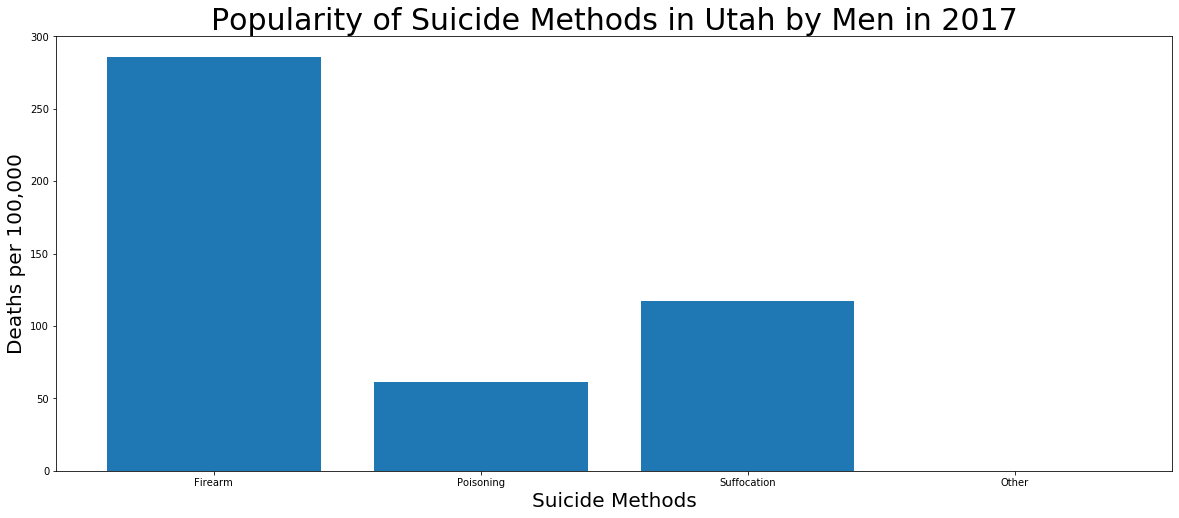

In [1438]:
works2('Utah', 2017, 'Male')

In [1439]:
def suicide_rates_us_year(Year, Gender):
    
    temp001= us_df.groupby(['Year','Gender','Method']).sum().iloc[:,0:1]
    temp002= us_df.groupby(['Year','Method']).sum().iloc[:,0:1]

    temp001.loc[Year]
    
    try: 
        temp001.loc[Year].loc[Gender].reset_index()['Method']
    except:
        print(f'Found no data for {State}, {Year}, {Gender}')

    tempxdata = temp001.loc[Year].loc[Gender].index

    tempydata = temp001.loc[Year].loc[Gender]['Deaths']

    tempxdata

    newxdata = []
    newydata = []
    other_sum = 0

    for x, y in zip(tempxdata, tempydata):
        if 'Other' in x:
            other_sum += y
        else:
            newxdata.append(x)
            newydata.append(y)
    newxdata.append('Other')
    newydata.append(other_sum)
    
    if Gender == 'Female':
        Gen = 'Women'
    elif Gender == 'Male':
        Gen = 'Men'
            

    fig, ax = plt.subplots(figsize=(20,8))
    ax.bar(newxdata,newydata)
    ax.set_title(f'Popularity of Suicide Methods in US by {Gen} in {Year}', size = 30)
    ax.set_xlabel('Suicide Methods', size = 20)
    ax.set_ylabel('Deaths per 100,000', size = 20);


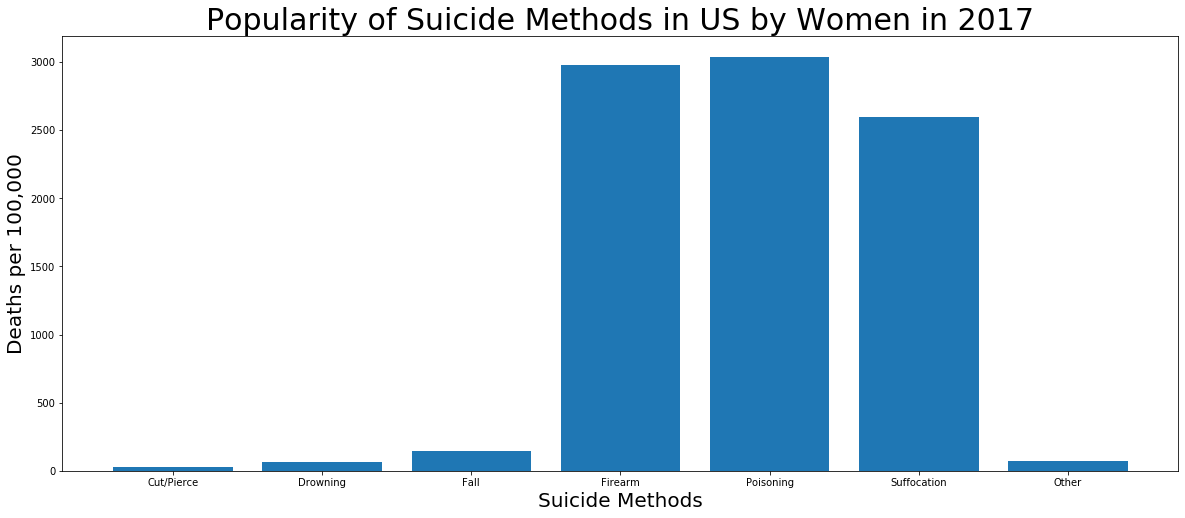

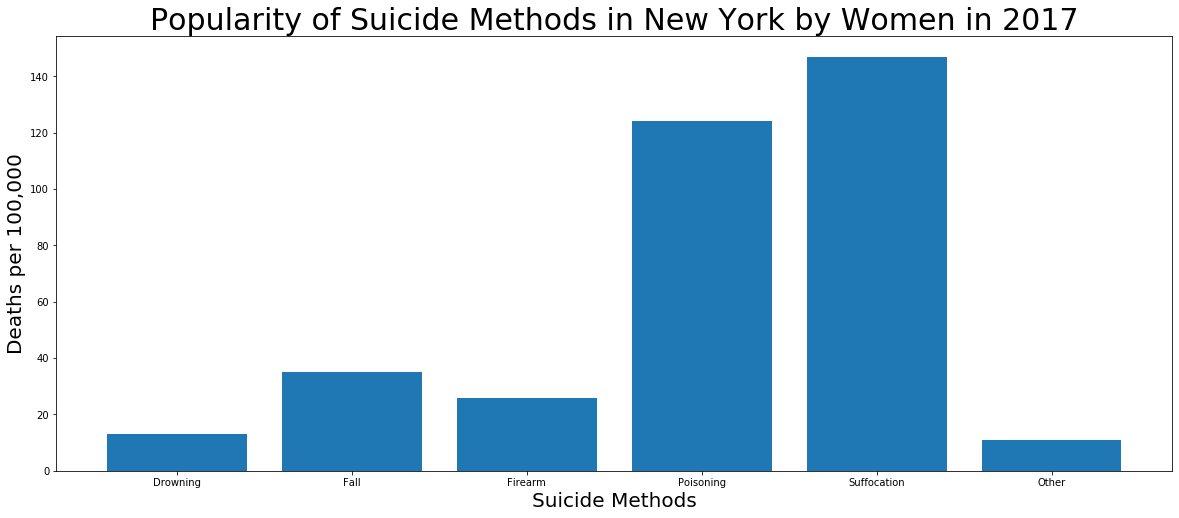

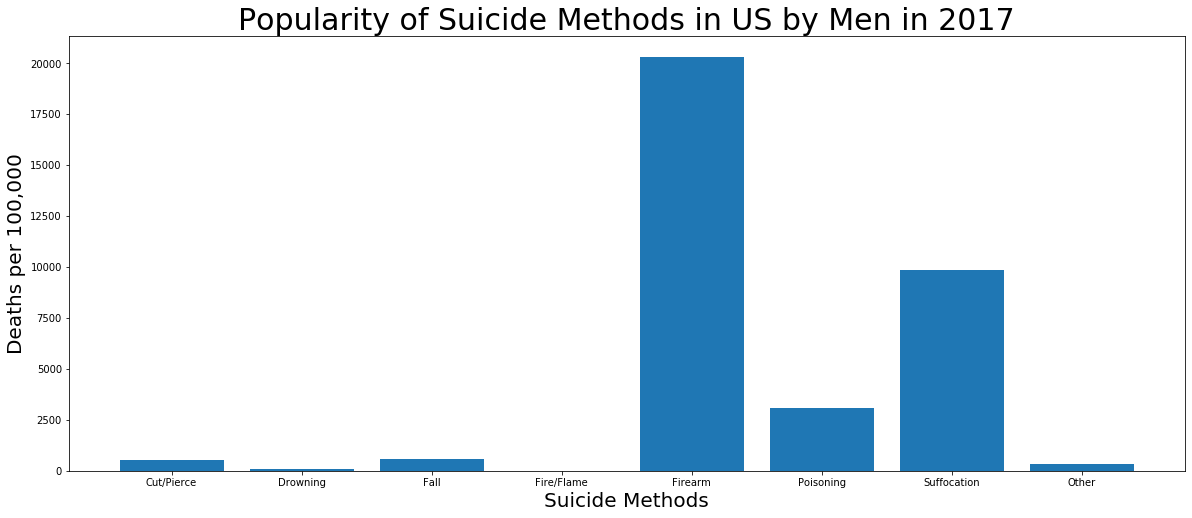

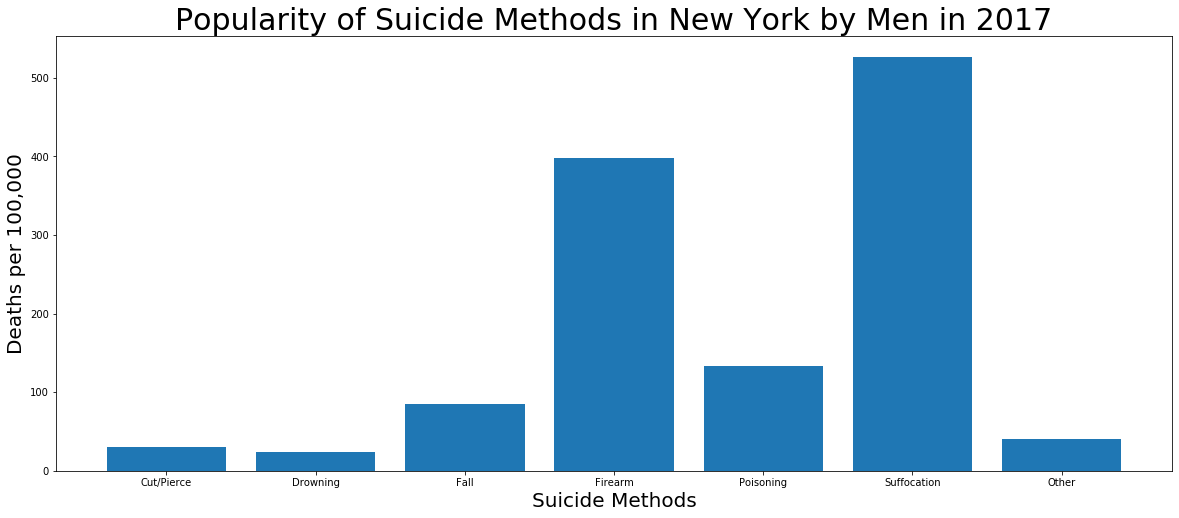

In [1440]:
suicide_rates_us_year(2017, 'Female')
suicide_bar_state_year('New York', 2017, 'Female')
suicide_rates_us_year(2017, 'Male')
suicide_bar_state_year('New York', 2017, 'Male')

Found no data for Alaska, 2017, Female


KeyError: 'Female'

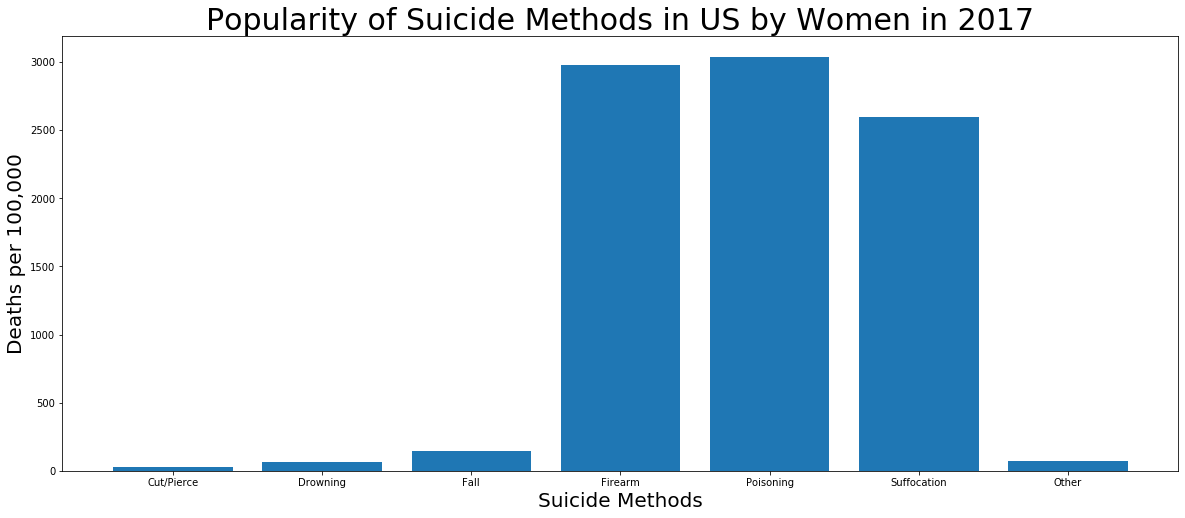

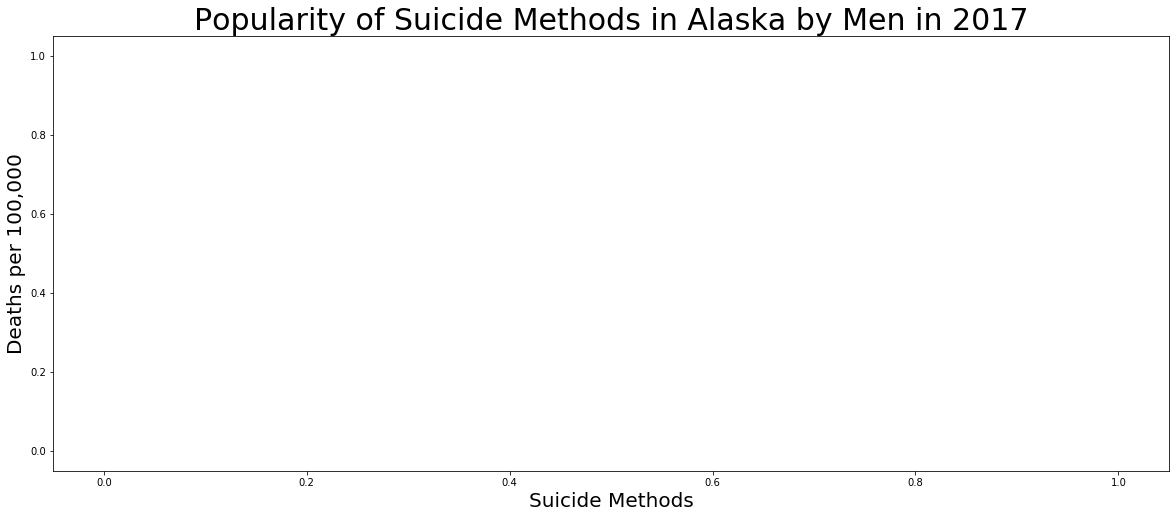

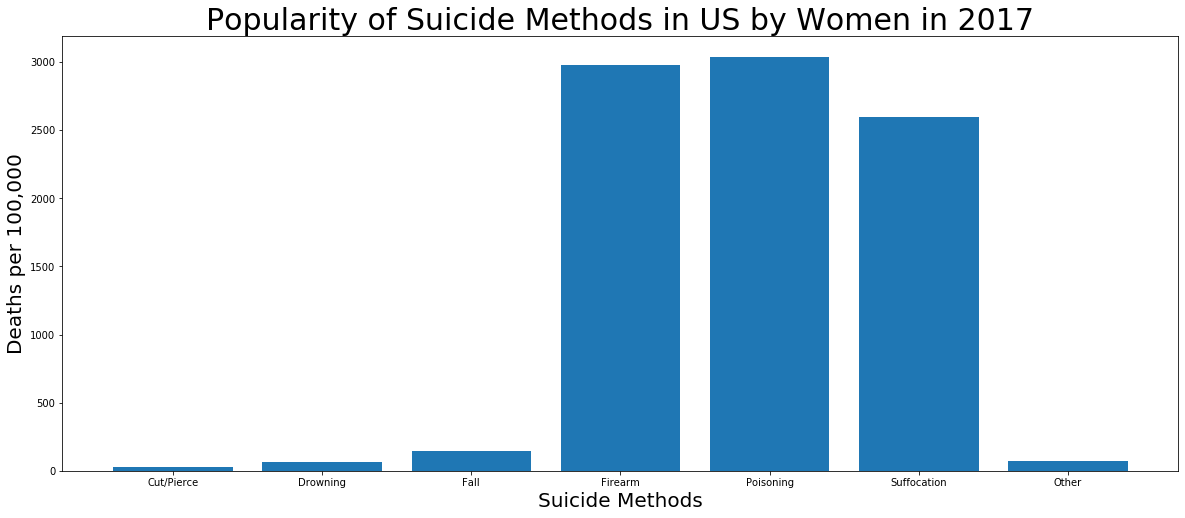

In [1441]:
suicide_rates_us_year(2017, 'Female')
works3('Alaska', 2017, 'Male')
suicide_rates_us_year(2017, 'Female')
suicide_bar_state_year('Alaska', 2017, 'Female')

In [1445]:
# Alaskan_Native American Females have empty data in the above area, exception code may be warrented to analyze this more.

In [1446]:
plot_rate_by_state_method_only('Alaska', 'Firearm',ax)

In [1447]:
ak_us_df.groupby(['Year','Gender','Method']).sum().iloc[:,0:1]

Deaths
Year Gender Method             
1999 Male   Firearm          44
            Suffocation      11
2000 Male   Firearm          81
            Suffocation      14
2001 Male   Firearm          59
2002 Female Firearm          17
     Male   Firearm          70
            Suffocation      11
2003 Male   Firearm          68
            Suffocation      10
2004 Female Suffocation      11
     Male   Firearm          79
            Suffocation      12
2005 Female Firearm          10
     Male   Firearm          72
            Suffocation      14
2006 Male   Firearm          68
            Suffocation      17
2007 Male   Firearm          80
            Suffocation      26
2008 Male   Firearm         100
            Suffocation      25
2009 Male   Firearm          65
            Poisoning        11
2010 Female Firearm          15
     Male   Firearm          81
            Suffocation      34
2011 Male   Firearm          80
            Suffocation      12
2012 Male   Firearm          79
            Poisoning        11
            Suffocation      34
2013 Female Firearm          14
     Male   Firearm          98
            Suffocation      22
2014 Male   Firearm          96
            Suffocation      15
2015 Female Firearm          18
     Male   Firearm          95
            Poisoning        10
            Suffocation      35
2016 Female Firearm          13
            Poisoning        10
            Suffocation      10
     Male   Firearm          88
            Suffocation      32
2017 Male   Firearm          93
            Suffocation      38

In [1448]:
def debug(State, Year, Gender):
  
    state_df = us_df[us_df['State'] == State]
    
    temp001= state_df.groupby(['Year','Gender','Method']).sum().iloc[:,0:1]
    
    temp002= state_df.groupby(['Year','Method']).sum().iloc[:,0:1]

    temp001.loc[Year]
    
    try: 
        temp001.loc[Year].loc[Gender].reset_index()['Method']
    except:
        print(f'Found no data for {State}, {Year}, {Gender}')

    tempxdata = temp001.loc[Year].loc[Gender].index

    tempydata = temp001.loc[Year].loc[Gender]['Deaths']
    
    if Gender == 'Female':
        Gen = 'Women'
    elif Gender == 'Male':
        Gen = 'Men'
        
    newxdata = []
    newydata = []
    other_sum = 0


    for x, y in zip(tempxdata, tempydata):
        if 'Other' in x:
            other_sum += y
        else:
            newxdata.append(x)
            newydata.append(y)
        newxdata.append('Other')
        newydata.append(other_sum)

#     fig, ax = plt.subplots(figsize=(20,8))
#     ax.bar(newxdata,newydata)
#     ax.set_title(f'Popularity of Suicide Methods in {State} by {Gen} in {Year}', size = 30)
#     ax.set_xlabel('Suicide Methods', size = 20)
#     ax.set_ylabel('Deaths per 100,000', size = 20);

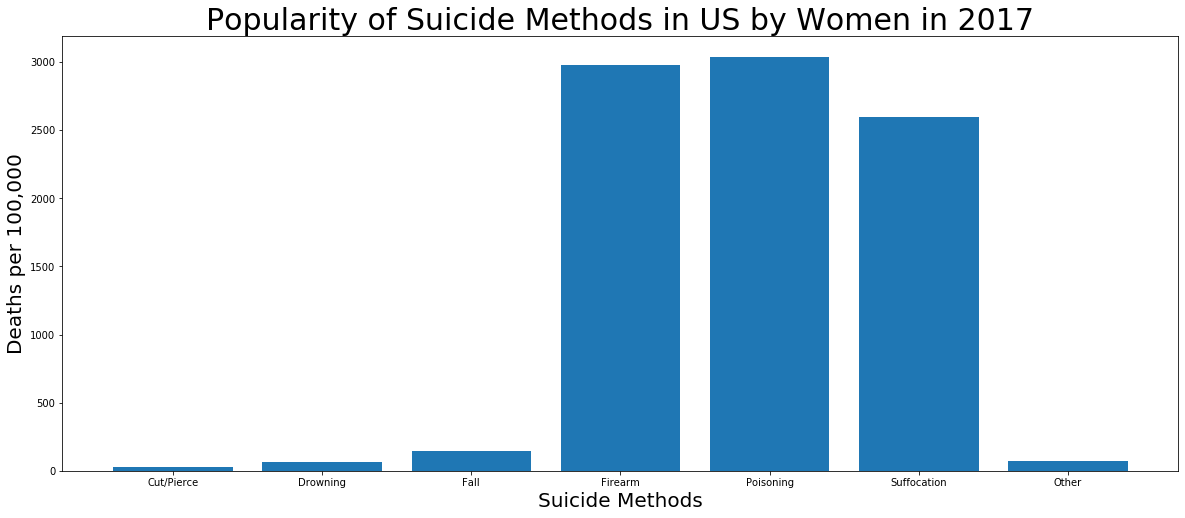

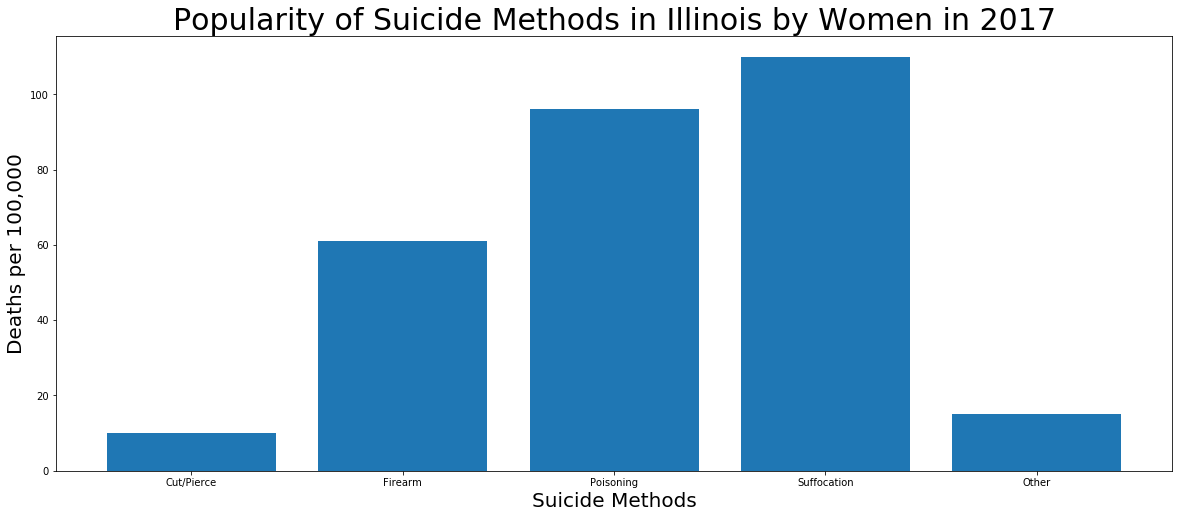

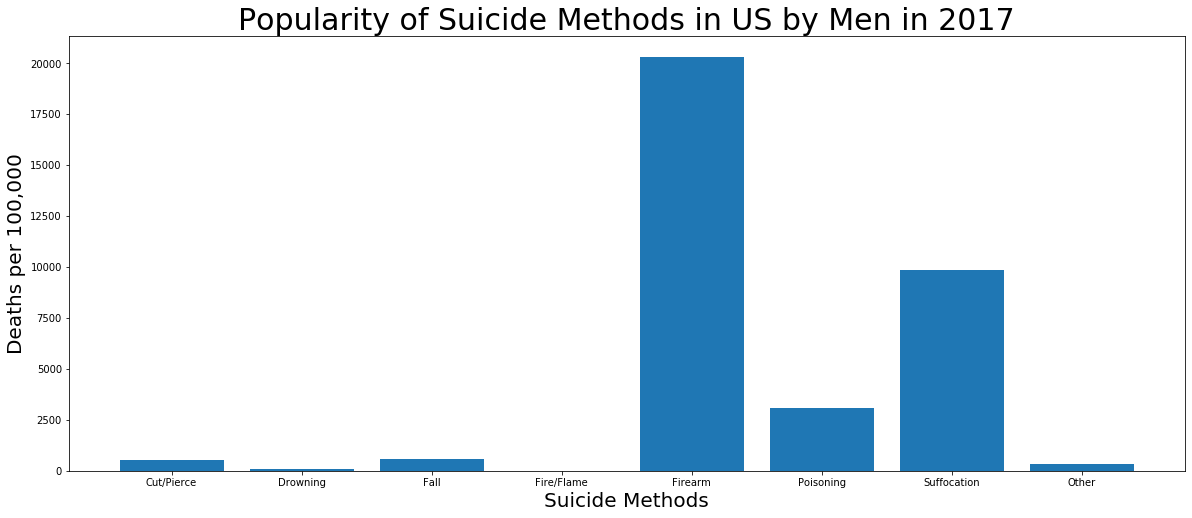

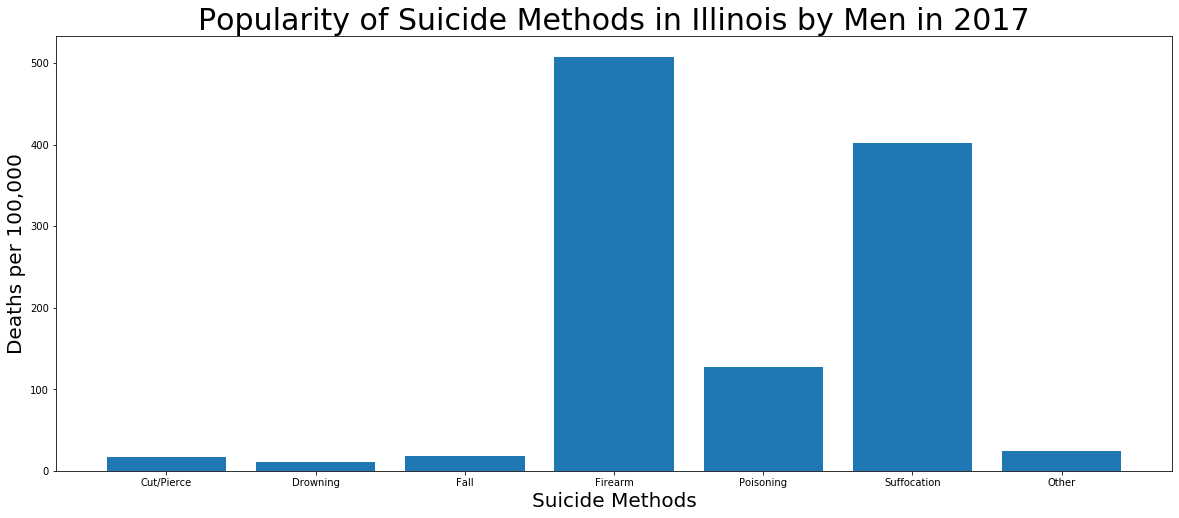

In [1449]:
suicide_rates_us_year(2017, 'Female')
suicide_bar_state_year('Illinois', 2017, 'Female')
suicide_rates_us_year(2017, 'Male')
suicide_bar_state_year('Illinois', 2017, 'Male')


In [1450]:
# def suicide_rates_us_race(Year, Race, Gender):
    
#     state_df = us_df[us_df['Race'] == Race]
#     temp001= us_df.groupby(['Race','Gender','Method']).sum().iloc[:,0:1]
#     temp002= us_df.groupby(['Race','Method']).sum().iloc[:,0:1]

#     temp001.loc[Year]
    
#    # try: 

#    # except:
#     #    print(f'Found no data for {Race}, {Year}, {Gender}')
        
#     temp001.loc[Race].loc[Gender].reset_index()['Method']
#     tempxdata = temp001.loc[Race].loc[Gender].index

#     tempydata = temp001.loc[Race].loc[Gender]['Deaths']

#     tempxdata

#     newxdata = []
#     newydata = []
#     other_sum = 0

#     for x, y in zip(tempxdata, tempydata):
#         if 'Other' in x:
#             other_sum += y
#         else:
#             newxdata.append(x)
#             newydata.append(y)
#     newxdata.append('Other')
#     newydata.append(other_sum)
    
#     if Gender == 'Female':
#         Gen = 'Women'
#     elif Gender == 'Male':
#         Gen = 'Men'
            

#     fig, ax = plt.subplots(figsize=(20,8))
#     ax.bar(newxdata,newydata)
#     ax.set_title(f'Popularity of Suicide Methods in US by {Gen} in {Year}', size = 30)
#     ax.set_xlabel('Suicide Methods', size = 20)
#     ax.set_ylabel('Deaths per 100,000', size = 20);

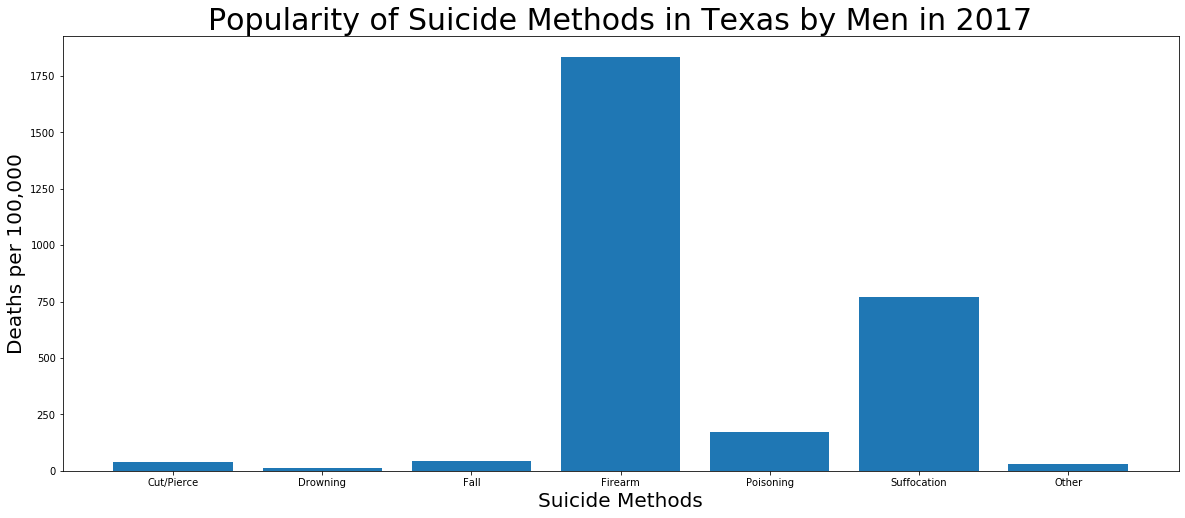

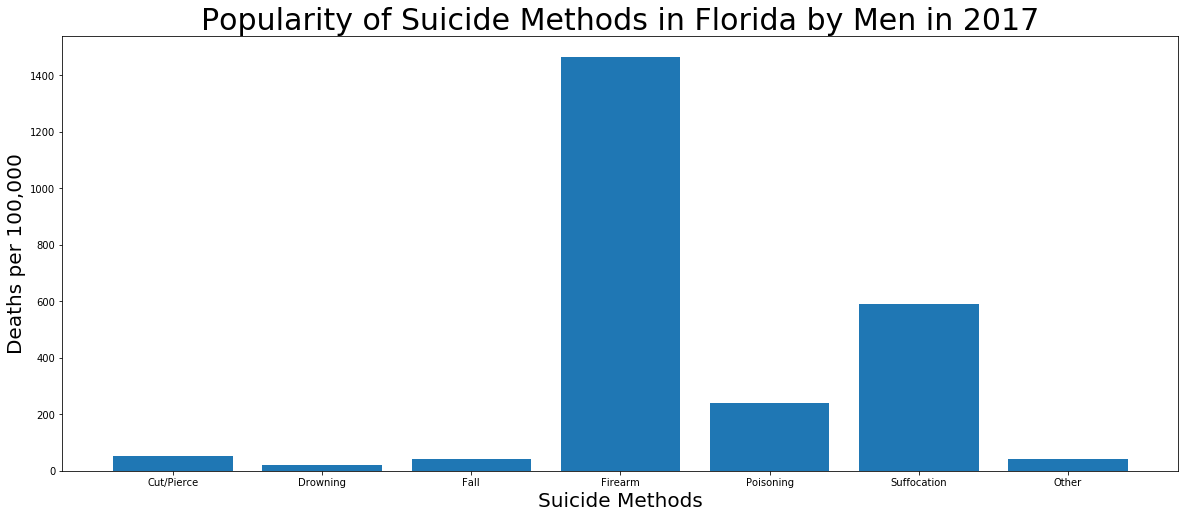

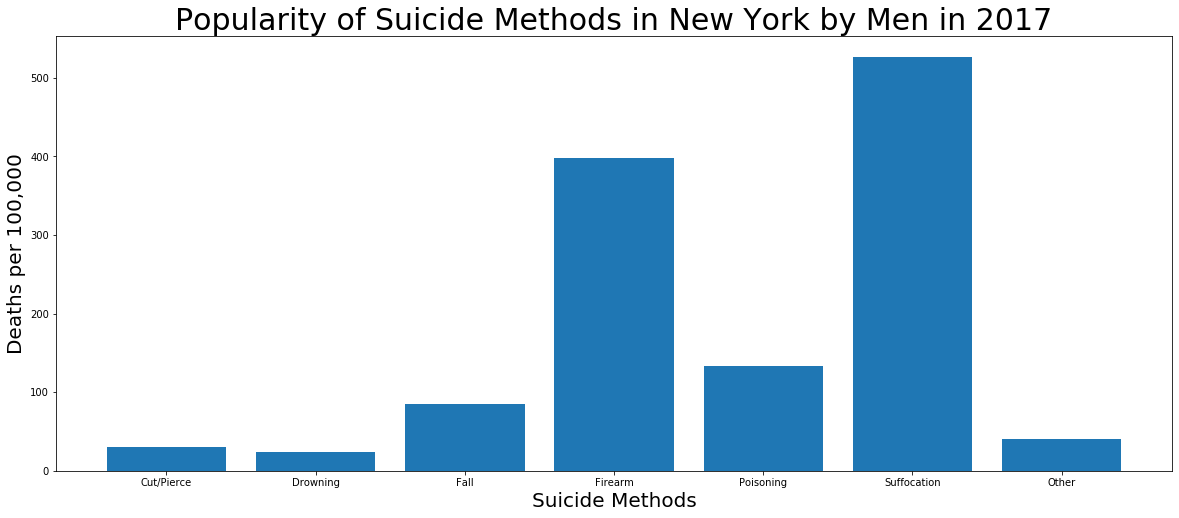

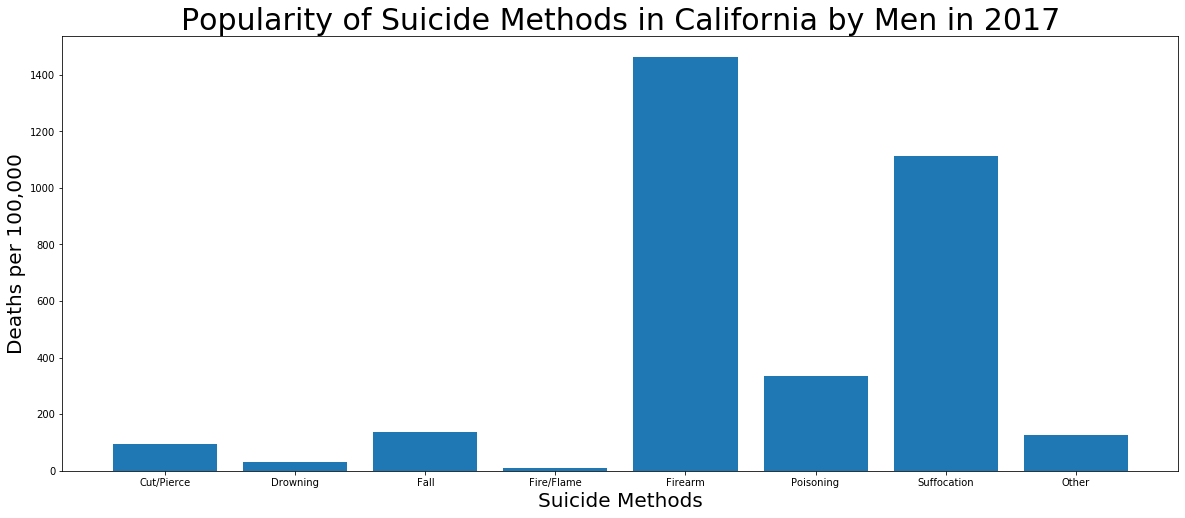

In [1451]:
suicide_bar_state_year('Texas', 2017, 'Male')
suicide_bar_state_year('Florida', 2017, 'Male')
suicide_bar_state_year('New York', 2017, 'Male')
suicide_bar_state_year('California', 2017, 'Male')

In [1452]:
us_df[us_df['Year'] <= 1999]
us_df[us_df['Year'].isna()]

,State,Year,Gender,Race,Method,Deaths,Population,Crude Rate


In [1453]:
test=us_df
test[test.Year == 1999]
#df[df.name != 'Tina']
test

,State,Year,Gender,Race,Method,Deaths,Population,Crude Rate
0,Alabama,1999,Female,White,Firearm,63,1640665,3.839906
1,Alabama,1999,Female,White,Poisoning,19,1640665,1.158067
2,Alabama,1999,Male,Black or African American,Firearm,41,539198,7.603886
3,Alabama,1999,Male,White,Firearm,326,1570643,20.755831
4,Alabama,1999,Male,White,Poisoning,36,1570643,2.292055
...,...,...,...,...,...,...,...,...
7499,Wyoming,2016,Male,White,Poisoning,11,280805,3.917309
7500,Wyoming,2016,Male,White,Suffocation,18,280805,6.410142
7501,Wyoming,2017,Female,White,Suffocation,10,267334,3.740639
7502,Wyoming,2017,Male,White,Firearm,84,277447,30.276053


In [1454]:
#test.head()
test.drop(columns=['Year'])
test.head()

,State,Year,Gender,Race,Method,Deaths,Population,Crude Rate
0,Alabama,1999,Female,White,Firearm,63,1640665,3.839906
1,Alabama,1999,Female,White,Poisoning,19,1640665,1.158067
2,Alabama,1999,Male,Black or African American,Firearm,41,539198,7.603886
3,Alabama,1999,Male,White,Firearm,326,1570643,20.755831
4,Alabama,1999,Male,White,Poisoning,36,1570643,2.292055


In [1455]:
us_df

,State,Year,Gender,Race,Method,Deaths,Population,Crude Rate
0,Alabama,1999,Female,White,Firearm,63,1640665,3.839906
1,Alabama,1999,Female,White,Poisoning,19,1640665,1.158067
2,Alabama,1999,Male,Black or African American,Firearm,41,539198,7.603886
3,Alabama,1999,Male,White,Firearm,326,1570643,20.755831
4,Alabama,1999,Male,White,Poisoning,36,1570643,2.292055
...,...,...,...,...,...,...,...,...
7499,Wyoming,2016,Male,White,Poisoning,11,280805,3.917309
7500,Wyoming,2016,Male,White,Suffocation,18,280805,6.410142
7501,Wyoming,2017,Female,White,Suffocation,10,267334,3.740639
7502,Wyoming,2017,Male,White,Firearm,84,277447,30.276053


In [1456]:
test_df.head()
test_df=us_df
#test_df=us_df.groupby(['State','Year','Gender','Race', 'Method', 'Deaths', 'Population','Crude Rate'])#.sum().drop(rows=['1999'])#, 'Population','Crude Rate'])
#test_df[test_df.State.Year != 1999]

In [1457]:
us_df=us_df[us_df.Year == 2017]
test_df[test_df.Year ==2017]

,State,Year,Gender,Race,Method,Deaths,Population,Crude Rate
137,Alabama,2017,Female,White,Firearm,72,1740455,4.136849
138,Alabama,2017,Female,White,Poisoning,25,1740455,1.436406
139,Alabama,2017,Female,White,Suffocation,32,1740455,1.838600
140,Alabama,2017,Male,Black or African American,Firearm,40,622795,6.422659
141,Alabama,2017,Male,Black or African American,Suffocation,16,622795,2.569064
...,...,...,...,...,...,...,...,...
7443,Wisconsin,2017,Male,White,Poisoning,73,2548911,2.863968
7444,Wisconsin,2017,Male,White,Suffocation,189,2548911,7.414931
7501,Wyoming,2017,Female,White,Suffocation,10,267334,3.740639
7502,Wyoming,2017,Male,White,Firearm,84,277447,30.276053


In [1458]:
us_df

,State,Year,Gender,Race,Method,Deaths,Population,Crude Rate
137,Alabama,2017,Female,White,Firearm,72,1740455,4.136849
138,Alabama,2017,Female,White,Poisoning,25,1740455,1.436406
139,Alabama,2017,Female,White,Suffocation,32,1740455,1.838600
140,Alabama,2017,Male,Black or African American,Firearm,40,622795,6.422659
141,Alabama,2017,Male,Black or African American,Suffocation,16,622795,2.569064
...,...,...,...,...,...,...,...,...
7443,Wisconsin,2017,Male,White,Poisoning,73,2548911,2.863968
7444,Wisconsin,2017,Male,White,Suffocation,189,2548911,7.414931
7501,Wyoming,2017,Female,White,Suffocation,10,267334,3.740639
7502,Wyoming,2017,Male,White,Firearm,84,277447,30.276053


In [1459]:
# def suicide_bar_us_race(Race):
    
#     race_df = us_df[us_df['Race'] == Race]
#     temp001= us_df.groupby(['Year','Gender','Method']).sum().iloc[:,0:1]
#     temp002= us_df.groupby(['Year','Method']).sum().iloc[:,0:1]

#     temp001.loc[Year]
    
#     try: 
#         temp001.loc[Year].loc[Gender].reset_index()['Method']
#     except:
#         print(f'Found no data for {State}, {Year}, {Gender}')

#     tempxdata = temp001.loc[Year].loc[Gender].index

#     tempydata = temp001.loc[Year].loc[Gender]['Deaths']

#     tempxdata

#     newxdata = []
#     newydata = []
#     other_sum = 0

#     for x, y in zip(tempxdata, tempydata):
#         if 'Other' in x:
#             other_sum += y
#         else:
#             newxdata.append(x)
#             newydata.append(y)
#     newxdata.append('Other')
#     newydata.append(other_sum)
    
#     if Gender == 'Female':
#         Gen = 'Women'
#     elif Gender == 'Male':
#         Gen = 'Men'
            

#     fig, ax = plt.subplots(figsize=(20,8))
#     ax.bar(newxdata,newydata)
#     ax.set_title(f'Popularity of Suicide Methods in {State} by {Gen} in {Year}', size = 30)
#     ax.set_xlabel('Suicide Methods', size = 20)
#     ax.set_ylabel('Deaths per 100,000', size = 20);


In [1460]:
#suicide_rates_us('Male')

In [1461]:
def all_suicide_rates_us_year(Year):
    
    temp001= us_df.groupby(['Year','Method']).sum().iloc[:,0:1]
    temp002= us_df.groupby(['Year','Method']).sum().iloc[:,0:1]

    temp001.loc[Year]
    
    try: 
        temp001.loc[Year].reset_index()['Method']
    except:
        print(f'Found no data for {State}, {Year}')

    tempxdata = temp001.loc[Year].index

    tempydata = temp001.loc[Year]['Deaths']

    tempxdata

    newxdata = []
    newydata = []
    other_sum = 0

    for x, y in zip(tempxdata, tempydata):
        if 'Other' in x:
            other_sum += y
        else:
            newxdata.append(x)
            newydata.append(y)
    newxdata.append('Other')
    newydata.append(other_sum)
    
#     if Gender == 'Female':
#         Gen = 'Women'
#     elif Gender == 'Male':
#         Gen = 'Men'
            

    fig, ax = plt.subplots(figsize=(20,8))
    ax.bar(newxdata,newydata)
    ax.set_title(f'Popularity of Suicide Methods in US by ALL in {Year}', size = 24)
    ax.set_xlabel('Suicide Methods', size = 20)
    ax.set_ylabel('Deaths per 100,000', size = 20);


In [1462]:
def suicide_rates_us_races(Year, Race):
    
    temp001= us_df.groupby(['Year','Race','Method']).sum().iloc[:,0:1]
    temp002= us_df.groupby(['Year','Method']).sum().iloc[:,0:1]

    temp001.loc[Year]
    
    try: 
        temp001.loc[Year].loc[Race].reset_index()['Method']
    except:
        print(f'Found no data for {State}, {Year}, {Race}')

    tempxdata = temp001.loc[Year].loc[Race].index

    tempydata = temp001.loc[Year].loc[Race]['Deaths']

    tempxdata

    newxdata = []
    newydata = []
    other_sum = 0

    for x, y in zip(tempxdata, tempydata):
        if 'Other' in x:
            other_sum += y
        else:
            newxdata.append(x)
            newydata.append(y)
    newxdata.append('Other')
    newydata.append(other_sum)
    
#     if Gender == 'Female':
#         Gen = 'Women'
#     elif Gender == 'Male':
#         Gen = 'Men'
            

    fig, ax = plt.subplots(figsize=(20,8))
    ax.bar(newxdata,newydata)
    ax.set_title(f'Popularity of Suicide Methods in US by {Race} Individuals in {Year}', size = 20)
    ax.set_xlabel('Suicide Methods', size = 20)
    ax.set_ylabel('Deaths per 100,000', size = 20)
  

In [1463]:
def suicide_rates_us_races_gender(Year, Race, Gender):
    
    temp001= us_df.groupby(['Year','Race','Gender','Method']).sum().iloc[:,0:1]
    temp002= us_df.groupby(['Year','Method']).sum().iloc[:,0:1]

    temp001.loc[Year]
    
    try: 
        temp001.loc[Year].loc[Race].loc[Gender].reset_index()['Method']
    except:
        print(f'Found no data for {Year}, {Gender}, {Race}')

    tempxdata = temp001.loc[Year].loc[Race].loc[Gender].index

    tempydata = temp001.loc[Year].loc[Race].loc[Gender]['Deaths']

    tempxdata

    newxdata = []
    newydata = []
    other_sum = 0

    for x, y in zip(tempxdata, tempydata):
        if 'Other' in x:
            other_sum += y
        else:
            newxdata.append(x)
            newydata.append(y)
    newxdata.append('Other')
    newydata.append(other_sum)
    
#     if Gender == 'Female':
#         Gen = 'Women'
#     elif Gender == 'Male':
#         Gen = 'Men'
            

    fig, ax = plt.subplots(figsize=(20,8))
    ax.bar(newxdata,newydata)
    ax.set_title(f'Popularity of Suicide Methods in US by {Gender} {Race} Individuals in {Year}', size = 24)
    ax.set_xlabel('Suicide Methods', size = 20)
    ax.set_ylabel('Deaths per 100,000', size = 20)

In [1464]:
np.unique(us_df['Race'])



array(['American Indian or Alaska Native', 'Asian or Pacific Islander',
       'Black or African American', 'White'], dtype=object)

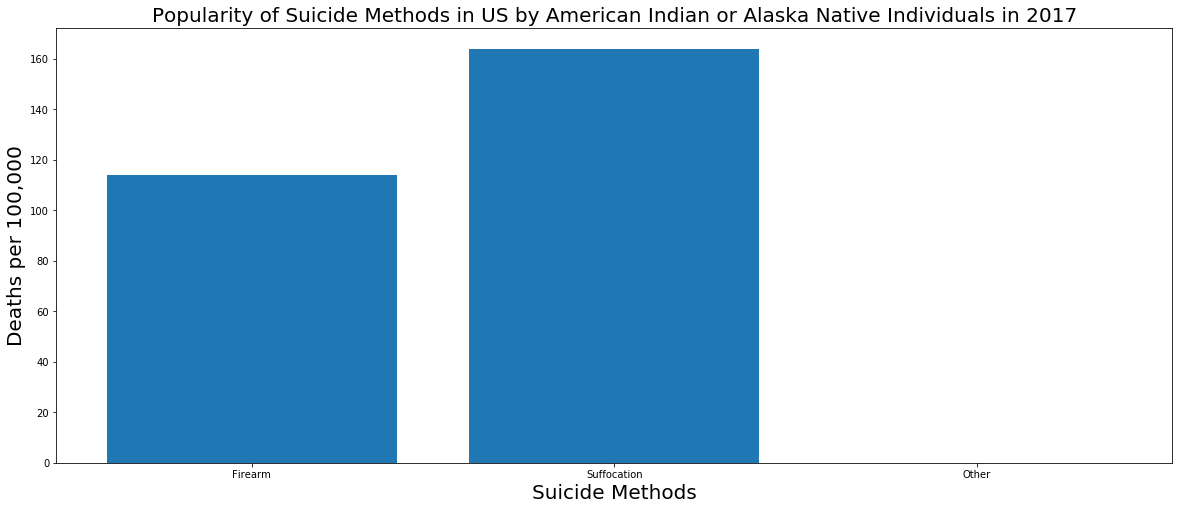

In [1465]:
#suicide_rates_us_races(Year, Race):
suicide_rates_us_races(2017, 'American Indian or Alaska Native')


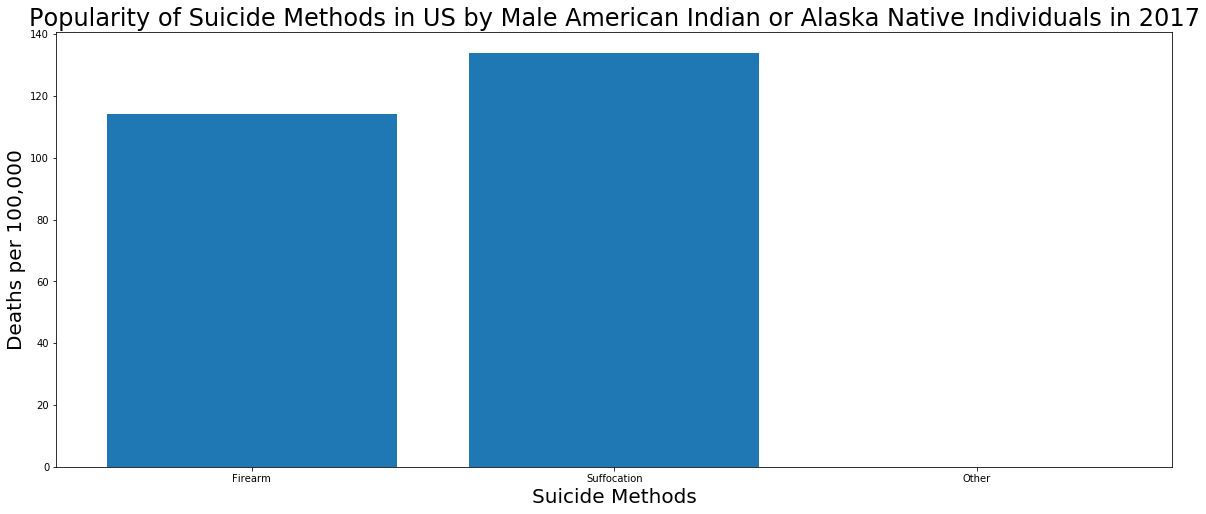

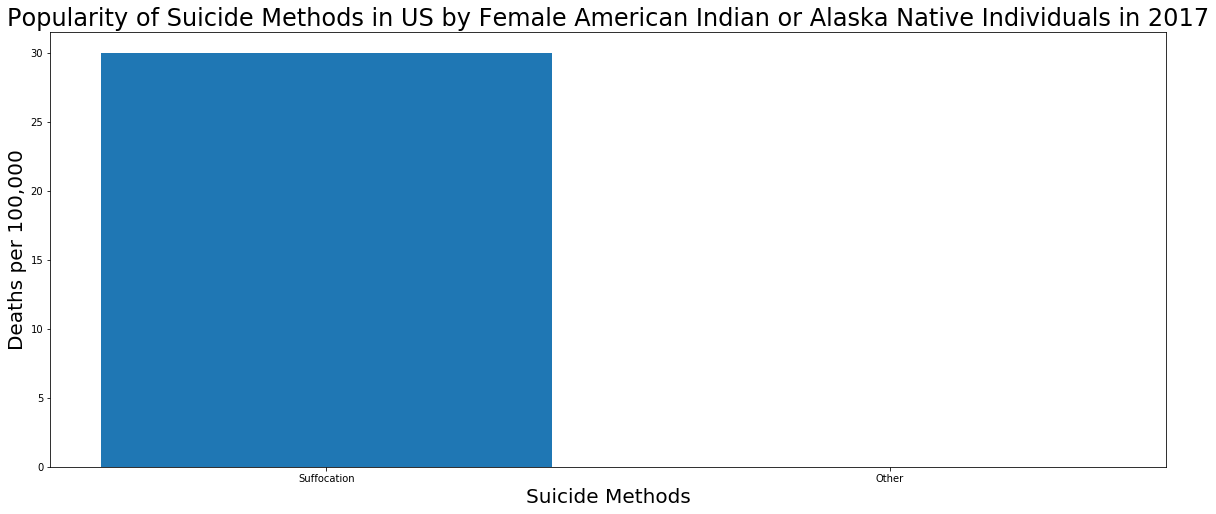

In [1466]:
#suicide_rates_us_races_gender(Year, Race, Gender)

suicide_rates_us_races_gender(2017, 'American Indian or Alaska Native', 'Male')
suicide_rates_us_races_gender(2017, 'American Indian or Alaska Native', 'Female')

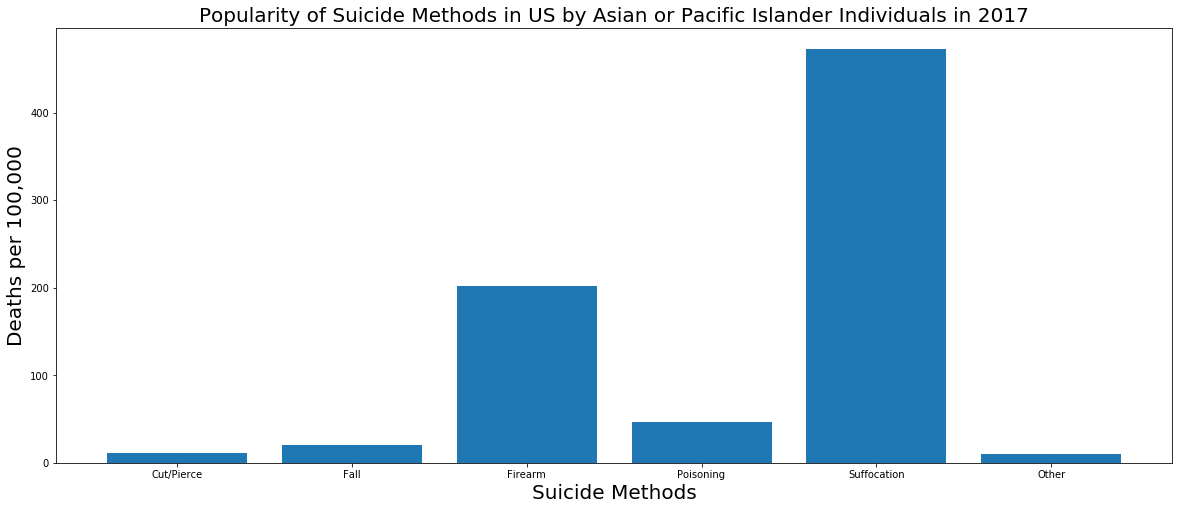

In [1467]:
suicide_rates_us_races(2017, 'Asian or Pacific Islander')


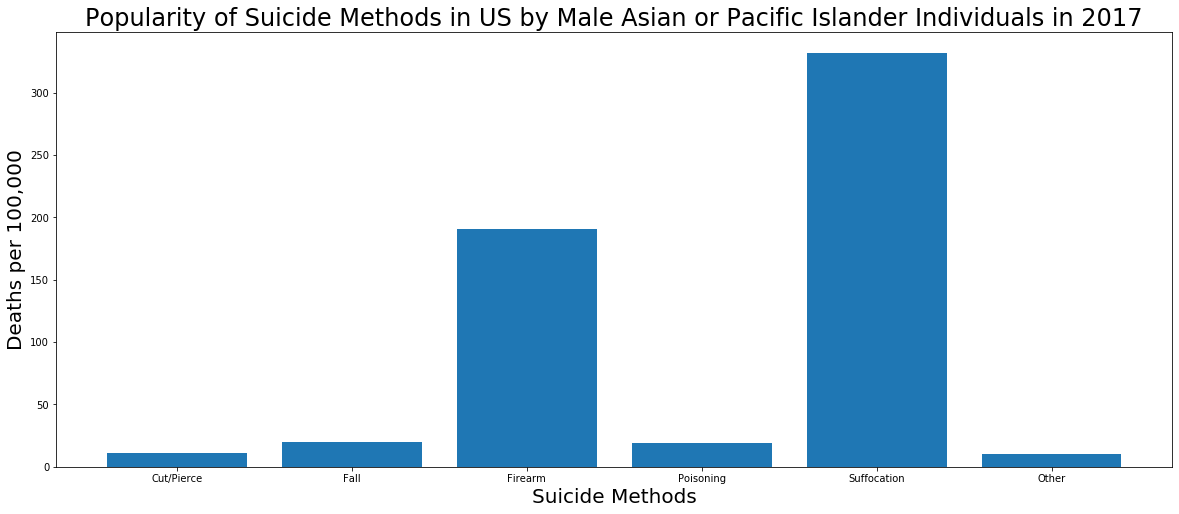

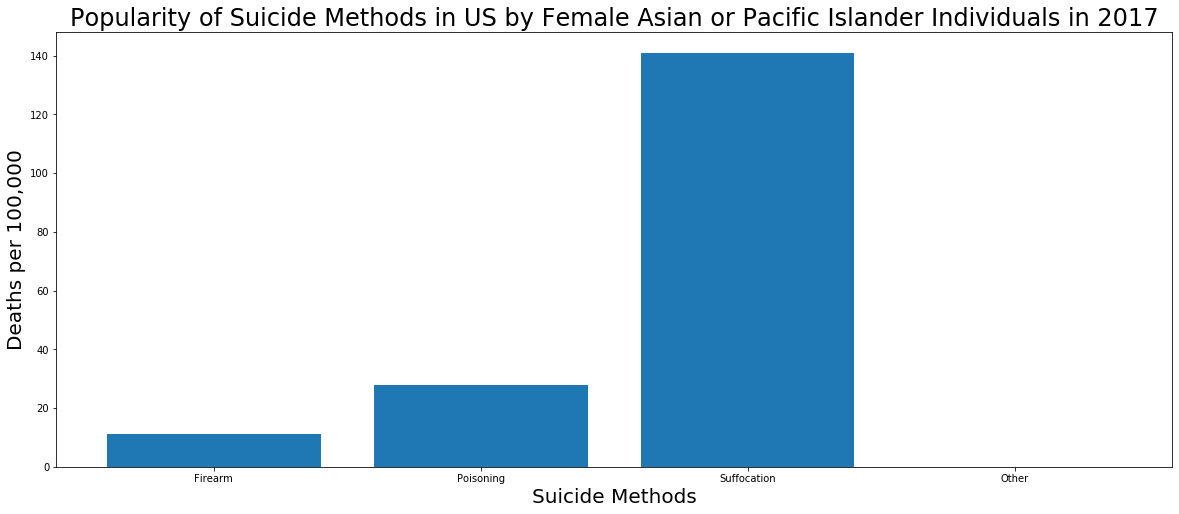

In [1468]:
#suicide_rates_us_races_gender(Year, Race, Gender)
suicide_rates_us_races_gender(2017, 'Asian or Pacific Islander','Male')
suicide_rates_us_races_gender(2017, 'Asian or Pacific Islander','Female')

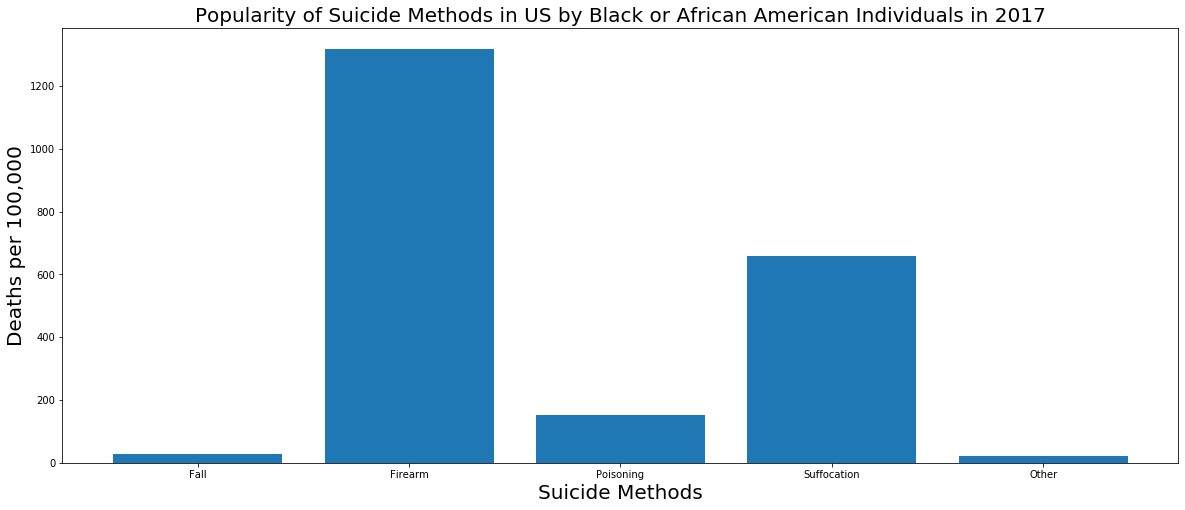

In [1469]:
suicide_rates_us_races(2017, 'Black or African American')


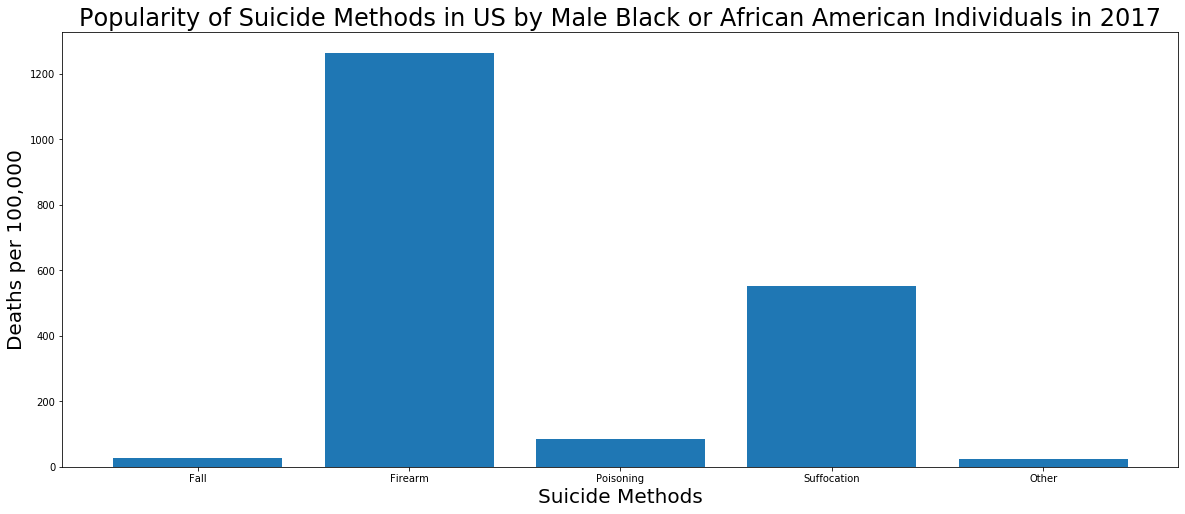

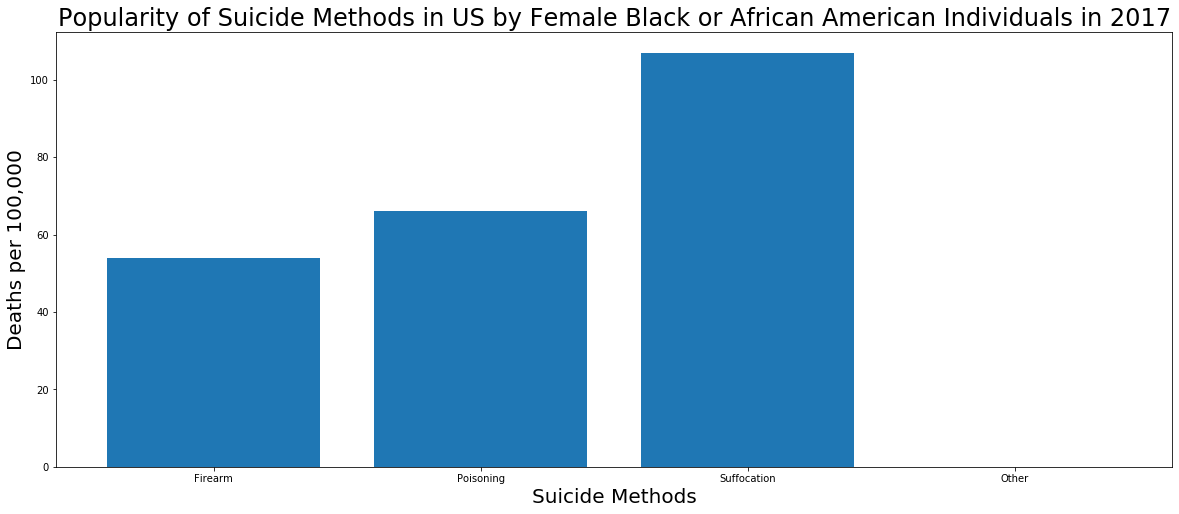

In [1470]:
#suicide_rates_us_races_gender(Year, Race, Gender)
suicide_rates_us_races_gender(2017, 'Black or African American','Male')
suicide_rates_us_races_gender(2017, 'Black or African American','Female')

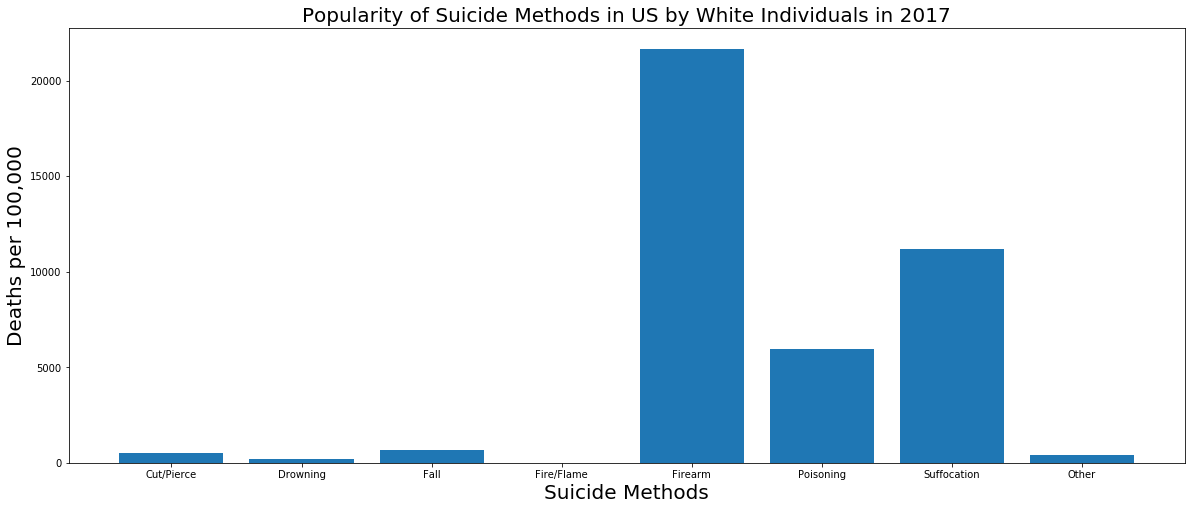

In [1471]:
suicide_rates_us_races(2017, 'White')

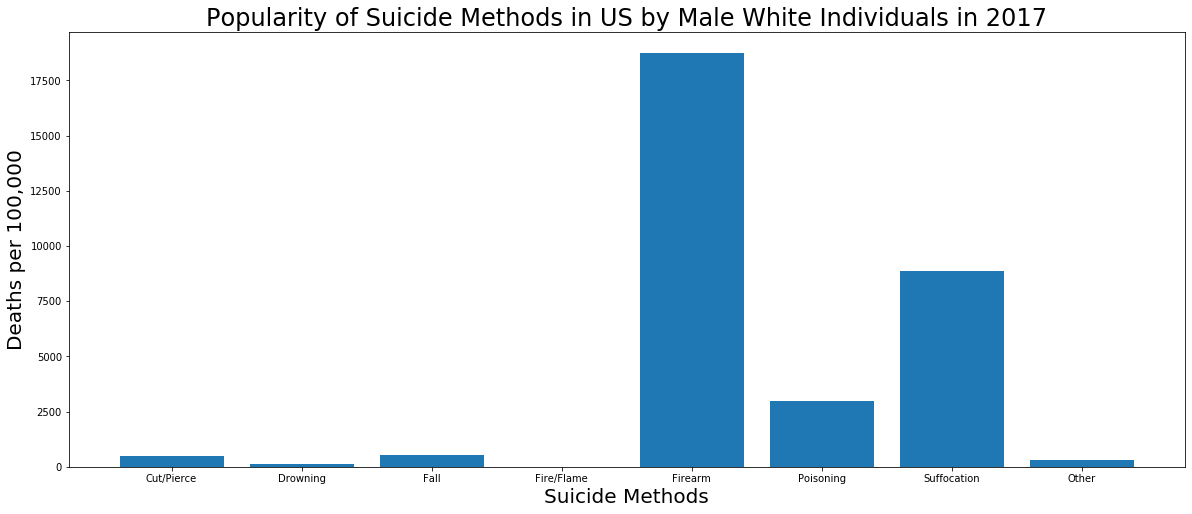

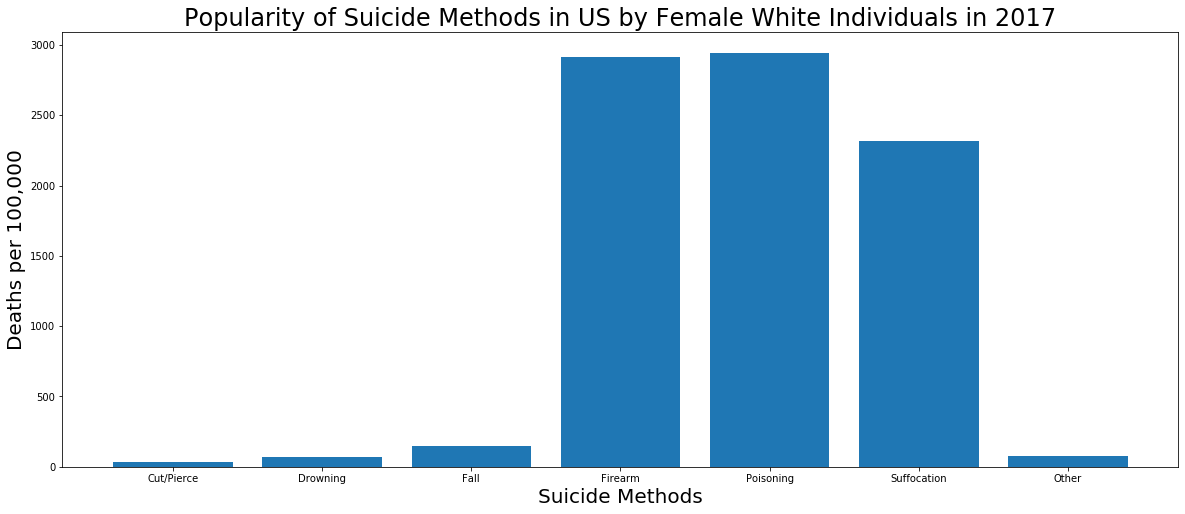

In [1472]:
#suicide_rates_us_races_gender(Year, Race, Gender)
suicide_rates_us_races_gender(2017, 'White', 'Male')
suicide_rates_us_races_gender(2017, 'White', 'Female')

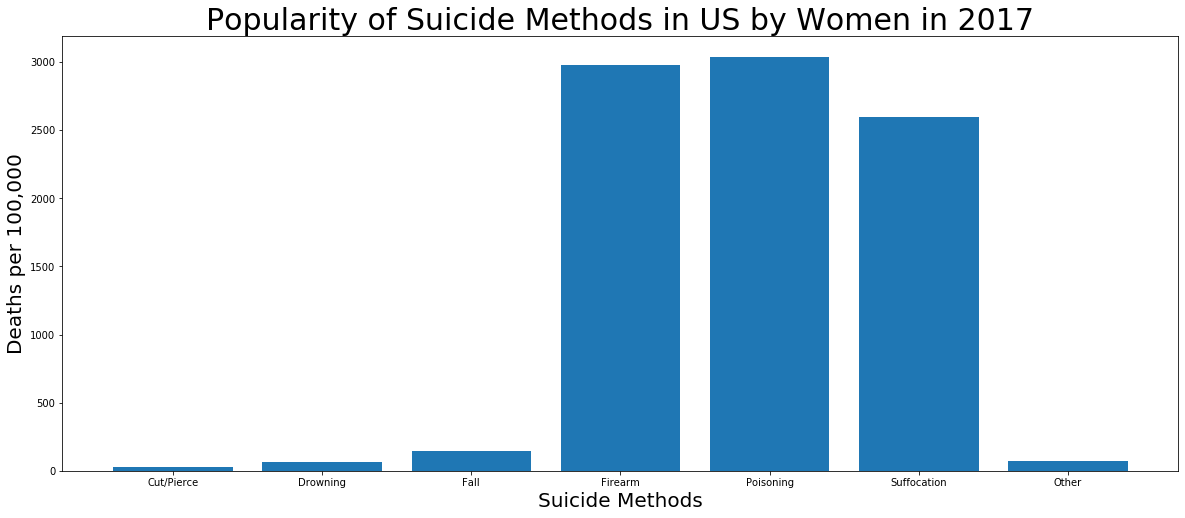

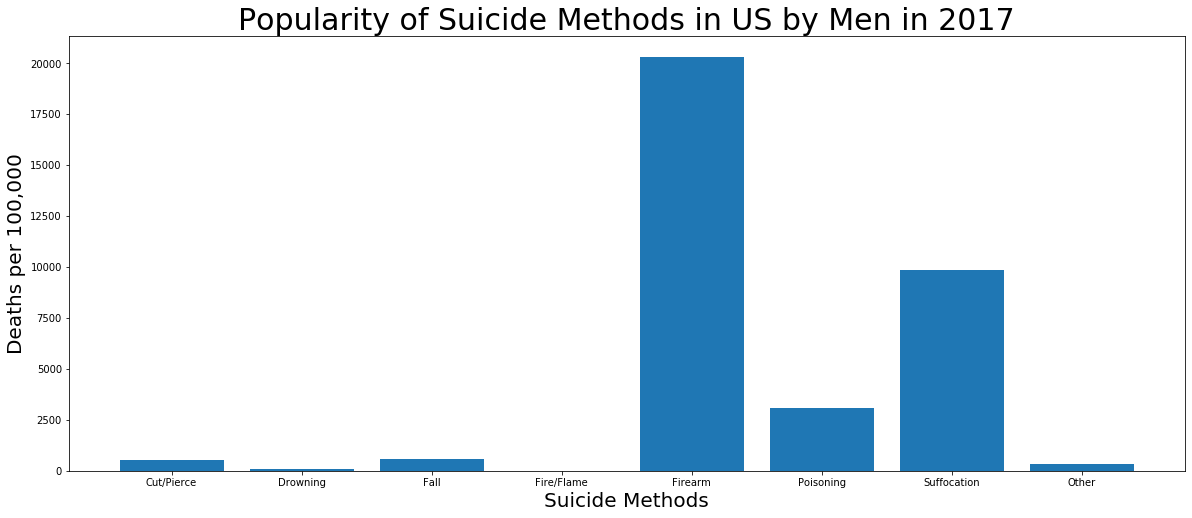

In [1473]:
suicide_rates_us_year(2017, 'Female')

suicide_rates_us_year(2017, 'Male')








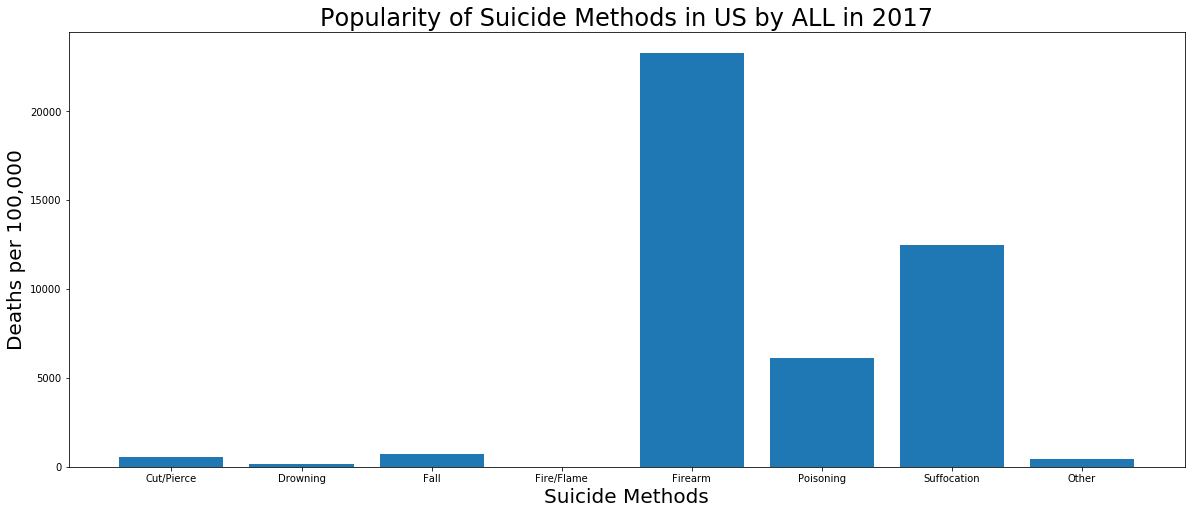

In [1474]:
all_suicide_rates_us_year(2017)

In [1475]:
#Beginning Hypothesis Testing

In [1476]:
us_2017only_df=us_df[us_df.Year == 2017]


In [1477]:
us_2017only_df.head(10)

,State,Year,Gender,Race,Method,Deaths,Population,Crude Rate
137,Alabama,2017,Female,White,Firearm,72,1740455,4.136849
138,Alabama,2017,Female,White,Poisoning,25,1740455,1.436406
139,Alabama,2017,Female,White,Suffocation,32,1740455,1.838600
140,Alabama,2017,Male,Black or African American,Firearm,40,622795,6.422659
141,Alabama,2017,Male,Black or African American,Suffocation,16,622795,2.569064
142,Alabama,2017,Male,White,Firearm,448,1679250,26.678577
143,Alabama,2017,Male,White,Poisoning,36,1679250,2.143814
144,Alabama,2017,Male,White,Suffocation,112,1679250,6.669644
216,Alaska,2017,Male,American Indian or Alaska Native,Firearm,27,64660,41.756882
217,Alaska,2017,Male,American Indian or Alaska Native,Suffocation,17,64660,26.291370


In [1478]:
us_2017_df=us_df[us_df['Year']==2017]

In [1479]:
us_2017_df.head(10)

,State,Year,Gender,Race,Method,Deaths,Population,Crude Rate
137,Alabama,2017,Female,White,Firearm,72,1740455,4.136849
138,Alabama,2017,Female,White,Poisoning,25,1740455,1.436406
139,Alabama,2017,Female,White,Suffocation,32,1740455,1.838600
140,Alabama,2017,Male,Black or African American,Firearm,40,622795,6.422659
141,Alabama,2017,Male,Black or African American,Suffocation,16,622795,2.569064
142,Alabama,2017,Male,White,Firearm,448,1679250,26.678577
143,Alabama,2017,Male,White,Poisoning,36,1679250,2.143814
144,Alabama,2017,Male,White,Suffocation,112,1679250,6.669644
216,Alaska,2017,Male,American Indian or Alaska Native,Firearm,27,64660,41.756882
217,Alaska,2017,Male,American Indian or Alaska Native,Suffocation,17,64660,26.291370


In [1480]:
methods_crude_rate= us_2017_df.groupby('Method').sum().drop(columns = ['Year','Population'])

Text(0.5, 1.0, '2017 Suicide Crude Rate Histogram')

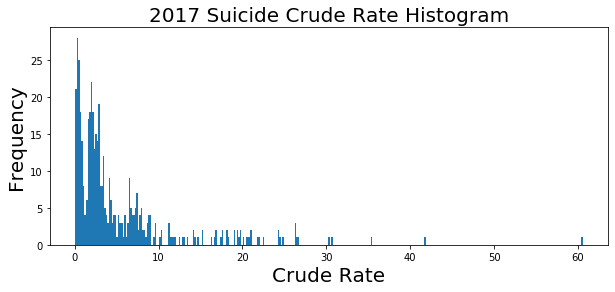

In [1481]:
ax = us_2017_df['Crude Rate'].plot(kind="hist",bins=333,figsize=(10,4))
ax.set_xlabel('Crude Rate', size=20)
ax.set_ylabel('Frequency', size=20)
ax.set_title('2017 Suicide Crude Rate Histogram',size = 20)

In [1482]:
methods_deaths= us_2017_df.groupby('Method').sum().drop(columns = ['Year','Population','Crude Rate'])

In [1483]:
methods_deaths

,Deaths
Method,
Cut/Pierce,537
Drowning,176
Fall,722
Fire/Flame,10
Firearm,23303
Other land transport,28
"Other specified, classifiable Injury",368
"Other specified, not elsewhere classified Injury",22
Poisoning,6136


In [1484]:
us_2017_df.groupby(['Gender','Method']).sum().drop(columns = ['Year','Population','Crude Rate'])

Deaths
Gender Method                                                  
Female Cut/Pierce                                            31
       Drowning                                              67
       Fall                                                 146
       Firearm                                             2978
       Other specified, classifiable Injury                  75
       Poisoning                                           3039
       Suffocation                                         2596
Male   Cut/Pierce                                           506
       Drowning                                             109
       Fall                                                 576
       Fire/Flame                                            10
       Firearm                                            20325
       Other land transport                                  28
       Other specified, classifiable Injury                 293
       Other specified, not elsewhere classified Injury      22
       Poisoning                                           3097
       Suffocation                                         9870

In [1485]:
us_2017_df.groupby(['Gender','Method']).sum().drop(columns = ['Year','Population','Crude Rate']).loc['Male']

,Deaths
Method,
Cut/Pierce,506
Drowning,109
Fall,576
Fire/Flame,10
Firearm,20325
Other land transport,28
"Other specified, classifiable Injury",293
"Other specified, not elsewhere classified Injury",22
Poisoning,3097


In [1486]:
us_2017_df.groupby(['Gender','Method']).sum().drop(columns = ['Year','Population','Crude Rate']).loc['Female']

,Deaths
Method,
Cut/Pierce,31
Drowning,67
Fall,146
Firearm,2978
"Other specified, classifiable Injury",75
Poisoning,3039
Suffocation,2596


In [1487]:
us_2017_df.groupby(['Gender','Method']).sum().drop(columns = ['Year','Population','Crude Rate']).loc['Male']

,Deaths
Method,
Cut/Pierce,506
Drowning,109
Fall,576
Fire/Flame,10
Firearm,20325
Other land transport,28
"Other specified, classifiable Injury",293
"Other specified, not elsewhere classified Injury",22
Poisoning,3097


In [1488]:
us_2017_df.groupby(['Race','Gender','Method','Population','Crude Rate']).sum().drop(columns = ['Year']).head(30)

Deaths
Race                             Gender Method      Population Crude Rate        
American Indian or Alaska Native Female Suffocation 42316      30.721240       13
                                                    202877     8.379461        17
                                 Male   Firearm     64660      41.756882       27
                                                    116785     11.987841       14
                                                    197445     11.648814       23
                                                    207336     16.398503       34
                                                    391973     4.081914        16
                                        Suffocation 38078      26.261884       10
                                                    41286      60.553214       25
                                                    64660      26.291370       17
                                                    116785     12.844115       15
                                                    197445     18.232926       36
                                                    207336     9.646178        20
                                                    391973     2.806316        11
Asian or Pacific Islander        Female Firearm     3430594    0.320644        11
                                        Poisoning   3430594    0.816185        28
                                        Suffocation 411878     2.913484        12
                                                    486469     2.672318        13
                                                    488650     2.865036        14
                                                    788178     1.903123        15
                                                    995508     1.908573        19
                                                    3430594    1.982164        68
                                 Male   Cut/Pierce  3118068    0.352783        11
                                        Fall        3118068    0.641423        20
                                        Firearm     231819     5.176452        12
                                                    299997     3.333367        10
                                                    325789     4.297260        14
                                                    371826     5.916746        22
                                                    455632     2.194754        10
                                                    751874     5.187039        39

In [1489]:
us_2017_df.groupby(['Race','Gender','Method']).sum().drop(columns = ['Year','Population','Crude Rate']).head()

Deaths
Race                             Gender Method             
American Indian or Alaska Native Female Suffocation      30
                                 Male   Firearm         114
                                        Suffocation     134
Asian or Pacific Islander        Female Firearm          11
                                        Poisoning        28

In [1490]:
us_2017_race_mw_method = us_2017_df.groupby(['Race','Method']).sum().drop(columns = ['Year','Population','Crude Rate'])

In [1491]:
us_2017_race_mw_method

Deaths
Race                             Method                                                  
American Indian or Alaska Native Firearm                                              114
                                 Suffocation                                          164
Asian or Pacific Islander        Cut/Pierce                                            11
                                 Fall                                                  20
                                 Firearm                                              202
                                 Other specified, classifiable Injury                  10
                                 Poisoning                                             47
                                 Suffocation                                          473
Black or African American        Fall                                                  27
                                 Firearm                                             1319
                                 Other specified, classifiable Injury                  23
                                 Poisoning                                            152
                                 Suffocation                                          659
White                            Cut/Pierce                                           526
                                 Drowning                                             176
                                 Fall                                                 675
                                 Fire/Flame                                            10
                                 Firearm                                            21668
                                 Other land transport                                  28
                                 Other specified, classifiable Injury                 335
                                 Other specified, not elsewhere classified Injury      22
                                 Poisoning                                           5937
                                 Suffocation                                        11170

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a35173810>]],
      dtype=object)

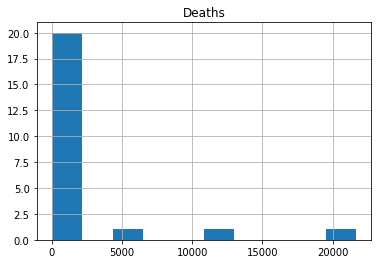

In [1492]:
us_2017_race_mw_method.hist()

In [1493]:
us_2017_race_gender_method = us_2017_df.groupby(['Race','Gender','Method']).sum().drop(columns = ['Year','Population','Crude Rate'])
us_2017_race_gender_method


Deaths
Race                             Gender Method                                                  
American Indian or Alaska Native Female Suffocation                                           30
                                 Male   Firearm                                              114
                                        Suffocation                                          134
Asian or Pacific Islander        Female Firearm                                               11
                                        Poisoning                                             28
                                        Suffocation                                          141
                                 Male   Cut/Pierce                                            11
                                        Fall                                                  20
                                        Firearm                                              191
                                        Other specified, classifiable Injury                  10
                                        Poisoning                                             19
                                        Suffocation                                          332
Black or African American        Female Firearm                                               54
                                        Poisoning                                             66
                                        Suffocation                                          107
                                 Male   Fall                                                  27
                                        Firearm                                             1265
                                        Other specified, classifiable Injury                  23
                                        Poisoning                                             86
                                        Suffocation                                          552
White                            Female Cut/Pierce                                            31
                                        Drowning                                              67
                                        Fall                                                 146
                                        Firearm                                             2913
                                        Other specified, classifiable Injury                  75
                                        Poisoning                                           2945
                                        Suffocation                                         2318
                                 Male   Cut/Pierce                                           495
                                        Drowning                                             109
                                        Fall                                                 529
                                        Fire/Flame                                            10
                                        Firearm                                            18755
                                        Other land transport                                  28
                                        Other specified, classifiable Injury                 260
                                        Other specified, not elsewhere classified Injury      22
                                        Poisoning                                           2992
                                        Suffocation                                         8852

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a3486bd90>,
      dtype=object)

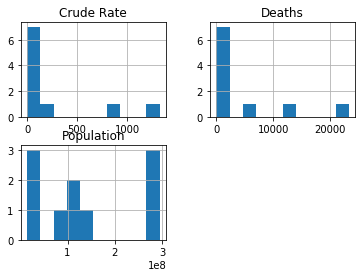

In [1494]:
us_2017_df.groupby(['Method']).sum().iloc[:,1:5].hist()


In [1495]:
def method_rates():
    
    rates= us_2017_df.groupby(['Method']).sum().iloc[:,1:5]
    rates.reset_index()['Method']

    xdata = rates.index
    ydata = rates['Deaths']

    newxdata = []
    newydata = []
    other_sum = 0

    for x, y in zip(xdata, ydata):
        if 'Other' in x:
            other_sum += y
        else:
            newxdata.append(x)
            newydata.append(y)
    newxdata.append('Other')
    newydata.append(other_sum)
    
    
    fig, ax = plt.subplots(figsize=(20,8))
    ax.bar(xdata,ydata)
    ax.set_title(f'Popularity of Suicide Methods by Individuals in 2017', size = 24)
    ax.set_xlabel('Suicide Methods', size = 20)
    ax.set_ylabel('Deaths per 100,000', size = 20)

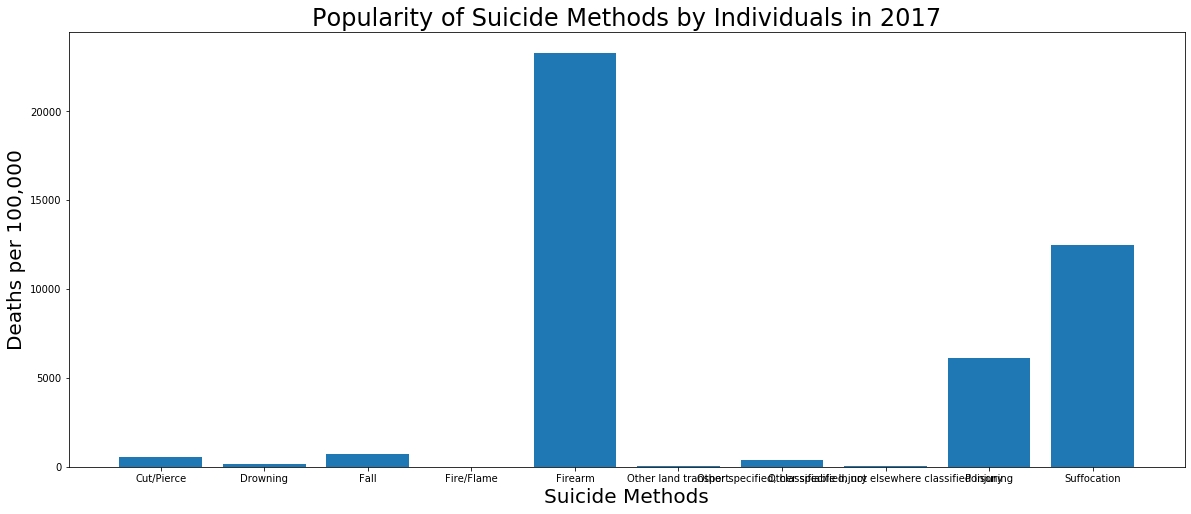

In [1496]:
method_rates()

In [1497]:

us_2017_black_mw_method = us_2017_df.groupby(['Race','Method']).sum().drop(columns = ['Year','Population','Crude Rate']).loc['Black or African American'].loc['Firearm']


In [1498]:
us_2017_black_w_df = us_2017_race_gender_method.loc['Black or African American'].loc['Female'].loc['Firearm']
us_2017_black_w_df

Deaths    54
Name: Firearm, dtype: int32

In [1499]:
us_2017_black_m_df = us_2017_race_gender_method.loc['Black or African American'].loc['Male'].loc['Firearm']
us_2017_black_m_df

Deaths    1265
Name: Firearm, dtype: int32

In [1500]:
total_deaths = methods_deaths['Deaths'].sum() #sum deaths
total_deaths 

43768

In [1501]:
methods_deaths

,Deaths
Method,
Cut/Pierce,537
Drowning,176
Fall,722
Fire/Flame,10
Firearm,23303
Other land transport,28
"Other specified, classifiable Injury",368
"Other specified, not elsewhere classified Injury",22
Poisoning,6136


In [1502]:
usr_firearms2017_proportions = methods_deaths.loc['Firearm']/total_deaths

In [1503]:
#df['column_name'].describe() 

all_firearm_us['Method'].describe()
#''''firearms'''
#us_df['Method'].describe()

count        2360
unique          1
top       Firearm
freq         2360
Name: Method, dtype: object

In [1504]:
us_df['Method'].describe()

count             471
unique             10
top       Suffocation
freq              145
Name: Method, dtype: object

In [1505]:
#Proportions

methods_deaths


,Deaths
Method,
Cut/Pierce,537
Drowning,176
Fall,722
Fire/Flame,10
Firearm,23303
Other land transport,28
"Other specified, classifiable Injury",368
"Other specified, not elsewhere classified Injury",22
Poisoning,6136


Text(0.5, 1.0, '2017 Suicide Crude Rate Histogram')

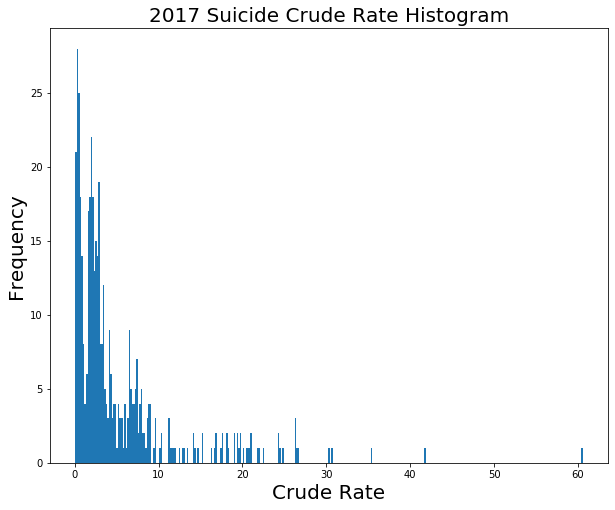

In [1506]:
ax = us_2017_df['Crude Rate'].plot(kind="hist",bins=333,figsize=(10,8))
ax.set_xlabel('Crude Rate', size=20)
ax.set_ylabel('Frequency', size=20)
ax.set_title('2017 Suicide Crude Rate Histogram',size = 20)

In [1507]:
total_deaths

43768

In [1508]:
method_gender_grouby_df= us_2017_df.groupby(['Gender','Method']).sum().drop(columns=['Year','Population','Crude Rate'])

In [1509]:
method_gender_grouby_df.head(30
                        )

Deaths
Gender Method                                                  
Female Cut/Pierce                                            31
       Drowning                                              67
       Fall                                                 146
       Firearm                                             2978
       Other specified, classifiable Injury                  75
       Poisoning                                           3039
       Suffocation                                         2596
Male   Cut/Pierce                                           506
       Drowning                                             109
       Fall                                                 576
       Fire/Flame                                            10
       Firearm                                            20325
       Other land transport                                  28
       Other specified, classifiable Injury                 293
       Other specified, not elsewhere classified Injury      22
       Poisoning                                           3097
       Suffocation                                         9870

In [1510]:
#Ratio of Male Firarms to Male Poisoning Deaths
male_gun_to_poison_ratio = method_gender_grouby_df.loc['Male'].loc['Firearm']/method_gender_grouby_df.loc['Male'].loc['Poisoning']
method_gender_grouby_df.loc['Male'].loc['Firearm']/method_gender_grouby_df.loc['Male'].loc['Poisoning']

Deaths    6.562803
dtype: float64

In [1511]:
#Total Male Firearm and Poisoning Deaths
male_gun_to_poison_total= method_gender_grouby_df.loc['Male'].loc['Firearm']+method_gender_grouby_df.loc['Male'].loc['Poisoning']
method_gender_grouby_df.loc['Male'].loc['Firearm'] + method_gender_grouby_df.loc['Male'].loc['Poisoning']

Deaths    23422
dtype: int32

In [1512]:
#Total male_gun_poison_probability 
male_gun_poison_probability = method_gender_grouby_df.loc['Male'].loc['Firearm']/(method_gender_grouby_df.loc['Male'].loc['Firearm']+method_gender_grouby_df.loc['Male'].loc['Poisoning'])

In [1513]:
male_gun_poison_probability

Deaths    0.867774
dtype: float64

In [1514]:
# Z-Score
Z = (male_gun_poison_probability - Female_gun_poison_probability)/ std_err
Z

Deaths    54.709525
dtype: float64

In [1515]:
normal = stats.norm()
normal.pdf(Z)

array([0.])

In [1516]:
#Ratio of Female Firarms to Male Poisoning Deaths
method_gender_grouby_df.loc['Female'].loc['Firearm']/method_gender_grouby_df.loc['Female'].loc['Poisoning']

Deaths    0.979928
dtype: float64

In [1517]:
#Total Female Firearm and Poisoning Deaths
female_gun_to_poison_total = method_gender_grouby_df.loc['Female'].loc['Firearm']+method_gender_grouby_df.loc['Female'].loc['Poisoning']
female_gun_to_poison_total

Deaths    6017
dtype: int32

In [1518]:
#Total Female_gun_poison_probability 
female_gun_poison_probability = method_gender_grouby_df.loc['Female'].loc['Firearm']/(method_gender_grouby_df.loc['Female'].loc['Firearm']+method_gender_grouby_df.loc['Female'].loc['Poisoning'])

In [1519]:
female_gun_poison_probability

Deaths    0.494931
dtype: float64

In [1520]:
male_gun_poison_probability-female_gun_poison_probability

Deaths    0.372843
dtype: float64

In [1521]:
#Std Error
std_err = np.sqrt(
    (male_gun_poison_probability * (1- male_gun_poison_probability) / (male_gun_to_poison_total)) 
    + (female_gun_poison_probability * (1- female_gun_poison_probability) / (female_gun_to_poison_total))
    )
std_err

Deaths    0.006815
dtype: float64

In [1522]:
Z_hyp= (male_gun_poison_probability - (female_gun_poison_probability + .35) ) / std_err 
Z_hyp

Deaths    3.351873
dtype: float64

In [1523]:
normal = stats.norm()
normal.pdf(Z_hyp)

array([0.0014496])

In [1524]:
def hypo_death(Method1, Method2, diff = 0):
    
    #Ratio of Male Method1 to Male Method2 Deaths
    male_method1_to_method2_ratio = method_gender_grouby_df.loc['Male'].loc[Method1] / method_gender_grouby_df.loc['Male'].loc[Method2]

    #Ratio of Male Method1 to Male Method2 Deaths
    female_method1_to_method2_ratio = method_gender_grouby_df.loc['Female'].loc[Method1]/method_gender_grouby_df.loc['Female'].loc[Method2]

    #Total Male Method1 and Method2 Deaths
    male_method1_to_method2_total= method_gender_grouby_df.loc['Male'].loc[Method1]+ method_gender_grouby_df.loc['Male'].loc[Method2]
    
    #Total Male Method1 and Method2 Deaths
    female_method1_to_method2_total= method_gender_grouby_df.loc['Female'].loc[Method1]+ method_gender_grouby_df.loc['Female'].loc[Method2]
    
    #Total male_Method1_Method2_probability 
    male_method1_method2_probability = method_gender_grouby_df.loc['Male'].loc[Method1]/(method_gender_grouby_df.loc['Male'].loc[Method1]+ method_gender_grouby_df.loc['Male'].loc[Method2])

    #Total male_Method1_Method2_probability 
    female_method1_method2_probability = method_gender_grouby_df.loc['Female'].loc[Method1]/(method_gender_grouby_df.loc['Female'].loc[Method1]+ method_gender_grouby_df.loc['Female'].loc[Method2])

    #Std Error
    std_err = np.sqrt(
    (male_method1_method2_probability * (1- male_method1_method2_probability) / (male_method1_to_method2_total)) 
    + (female_method1_method2_probability * (1- female_method1_method2_probability) / (female_method1_to_method2_total))
    )
     
    # Z-Score
    Z = (male_method1_method2_probability - (female_method1_method2_probability + diff))/ std_err
    
    normal = stats.norm()
    p_value = normal.pdf(Z)[0]
    
    if diff == 0:
        if float(Z) > 0:
            print(f'With {(1-p_value)*100}% confidence we can say that Men choose {Method1} over {Method2} at a higher rate than women')
        else: 
            print(f'With {(1-p_value)*100}% confidence we can say that Men choose {Method2} over {Method1} at a higher rate than women')
    else:
        if float(Z) > 0:
            print(f'With {(1-p_value)*100}% confidence we can say that Men choose {Method1} over {Method2} at a rate at least {diff*100}% higher than women')
        else: 
            print(f'With {(1-p_value)*100}% confidence we can say that Men choose {Method2} over {Method1} at a rate at least {diff*100}% higher than women')
            
        
    return ( float(Z),p_value )
   

In [1890]:
Fall_CutZ,Fall_CutP =  hypo_death ('Fall','Cut/Pierce',-.225)

With 95.48161265174993% confidence we can say that Men choose Cut/Pierce over Fall at a rate at least -22.5% higher than women


In [1891]:
Fall_CutZ

-2.0871399109602087

In [1892]:
Fall_CutP

0.04518387348250076

In [1893]:
Fall_CutZ,Fall_CutP =  hypo_death ('Fall','Cut/Pierce',-.225)

With 95.48161265174993% confidence we can say that Men choose Cut/Pierce over Fall at a rate at least -22.5% higher than women


In [1894]:
Fall_CutZ

-2.0871399109602087

In [1895]:
Fall_CutP

0.04518387348250076

In [1904]:
PoisonZ,PoisonP = hypo_death('Poisoning','Fall',32

SyntaxError: unexpected EOF while parsing (<ipython-input-1904-a4f0e6e39794>, line 1)

In [1903]:
PoisonZ

-582.9415819169478

In [1901]:
PoisonP

6.651925096317575e-55

In [1887]:
#firearm_suffocationZ,firearm_suffocationP = hypo_death ('Firearm','Suffocation',.4168359)
firearm_suffocationZ,firearm_suffocationP = hypo_death ('Firearm','Suffocation',.4168359)

With 100.0% confidence we can say that Men choose Suffocation over Firearm at a rate at least 41.683589999999995% higher than women


In [1888]:
firearm_suffocationZ

-38.575496822380394

In [1889]:
firearm_suffocationP

5e-324

In [1861]:
#Noose vs Pills
Suffocation_Poisoning_Z,Suffocation_Poisoning_P =  hypo_death ('Suffocation','Poisoning',-100000000000)

With 100.0% confidence we can say that Men choose Suffocation over Poisoning at a rate at least -10000000000000% higher than women


In [1862]:
Suffocation_Poisoning_Z

13118084311329.812

In [1863]:
Suffocation_Poisoning_P

0.0

In [1864]:
#firearm_suffocationZ,firearm_suffocationP = hypo_death ('Firearm','Suffocation',.4168359)
firearm_suffocationZ,firearm_suffocationP = hypo_death ('Firearm','Suffocation',.4168359)

With 100.0% confidence we can say that Men choose Suffocation over Firearm at a rate at least 41.683589999999995% higher than women


In [1875]:
Poisoing_FallZ,Poisoing_FallP =  hypo_death ('Poisoning','Fall')

With 100.0% confidence we can say that Men choose Fall over Poisoning at a higher rate than women


In [1879]:
Fall_CutZ,Fall_CutP =  hypo_death ('Fall','Cut/Pierce',-11)

With 100.0% confidence we can say that Men choose Fall over Cut/Pierce at a rate at least -1100% higher than women


In [1851]:
def hypo_death_female(Method1, Method2, diff = 0):
    
    #Ratio of Male Method1 to Male Method2 Deaths
    male_method1_to_method2_ratio = method_gender_grouby_df.loc['Female'].loc[Method1] / method_gender_grouby_df.loc['Female'].loc[Method2]

    #Ratio of Male Method1 to Male Method2 Deaths
    female_method1_to_method2_ratio = method_gender_grouby_df.loc['Male'].loc[Method1]/method_gender_grouby_df.loc['Male'].loc[Method2]

    #Total Male Method1 and Method2 Deaths
    male_method1_to_method2_total= method_gender_grouby_df.loc['Female'].loc[Method1]+ method_gender_grouby_df.loc['Female'].loc[Method2]
    
    #Total Male Method1 and Method2 Deaths
    female_method1_to_method2_total= method_gender_grouby_df.loc['Male'].loc[Method1]+ method_gender_grouby_df.loc['Male'].loc[Method2]
    
    #Total male_Method1_Method2_probability 
    male_method1_method2_probability = method_gender_grouby_df.loc['Female'].loc[Method1]/(method_gender_grouby_df.loc['Female'].loc[Method1]+ method_gender_grouby_df.loc['Male'].loc[Method2])

    #Total male_Method1_Method2_probability 
    female_method1_method2_probability = method_gender_grouby_df.loc['Male'].loc[Method1]/(method_gender_grouby_df.loc['Male'].loc[Method1]+ method_gender_grouby_df.loc['Female'].loc[Method2])

    #Std Error
    std_err = np.sqrt(
    (female_method1_method2_probability * (1- female_method1_method2_probability) / (female_method1_to_method2_total)) 
    + (male_method1_method2_probability * (1- male_method1_method2_probability) / (male_method1_to_method2_total))
    )
     
    # Z-Score
    Z = (female_method1_method2_probability - (male_method1_method2_probability + diff))/ std_err
    
    normal = stats.norm()
    p_value = normal.pdf(Z)[0]
    
    if diff == 0:
        if float(Z) > 0:
            print(f'With {(1-p_value)*100}% confidence we can say that Females choose {Method1} over {Method2} at a higher rate than males')
        else: 
            print(f'With {(1-p_value)*100}% confidence we can say that Females choose {Method2} over {Method1} at a higher rate than males')
    else:
        if float(Z) > 0:
            print(f'With {(1-p_value)*100}% confidence we can say that Females choose {Method1} over {Method2} at a rate at least {diff*100}% higher than males')
        else: 
            print(f'With {(1-p_value)*100}% confidence we can say that Females choose {Method2} over {Method1} at a rate at least {diff*100}% higher than males')
            
        
    return ( float(Z),p_value )
   

In [1872]:
#Noose vs Pills
Suffocation_Poisoning_Z,Suffocation_Poisoning_P =  hypo_death_female ('Suffocation','Poisoning',-100)

With 100.0% confidence we can say that Females choose Suffocation over Poisoning at a rate at least -10000% higher than males


In [1873]:
Suffocation_Poisoning_Z

13182.183245351654

In [1874]:
Suffocation_Poisoning_P

0.0

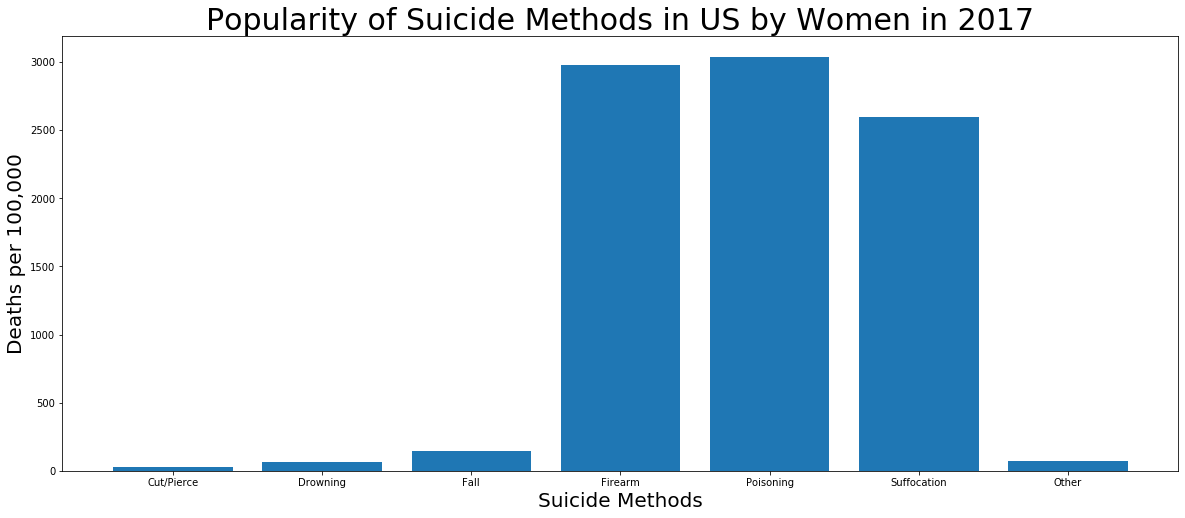

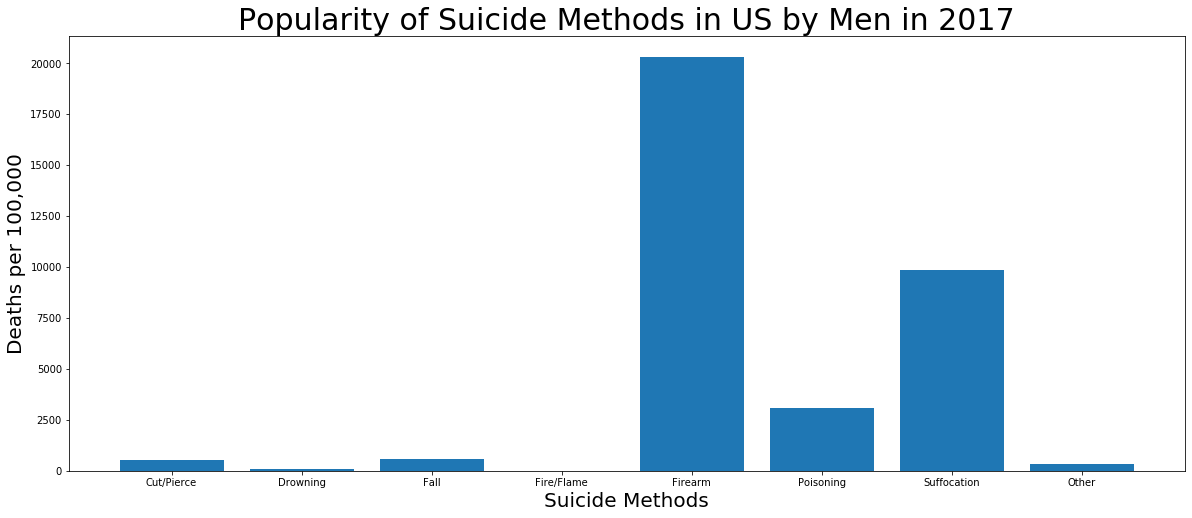

In [1533]:
suicide_rates_us_year(2017, 'Female')
suicide_rates_us_year(2017, 'Male')

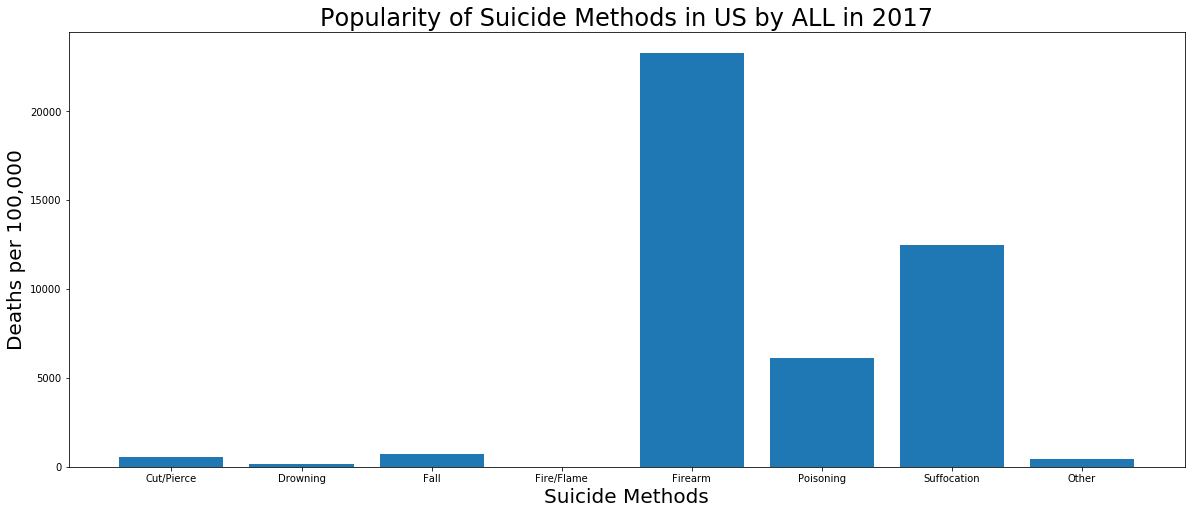

In [1534]:
all_suicide_rates_us_year(2017)

In [1535]:
death_firearms_pct = 23303/43768
death_suffocation_pct = 12466/43768
death_poisoning_pct = 6136/43768
death_fall_pct = 722/43768
death_cut_pierce_pct = 537/43768
death_other_pct = (28+368+22)/43768
death_drowning_pct = 176/43768
death_flame_pct = 10/43768


In [1808]:
death_firearms_pct  *100

53.242094681045515

In [1809]:
death_suffocation_pct  *100

28.481995978797293

In [1810]:
death_poisoning_pct *100

14.019374885761287

In [1811]:
death_fall_pct *100

1.6496070188265397

In [1812]:
death_cut_pierce_pct *100

1.2269237799305428

In [1813]:
death_other_pct  *100

0.9550356424785231

In [1814]:
death_drowning_pct *100

0.4021202705172729

In [1815]:
death_flame_pct*100

0.02284774264302687

In [1536]:
#firearms vs poisoning
shared_sample_freq1 = (death_firearms_pct + death_poisoning_pct)/total_deaths
shared_sample_variance1 = total_deaths * (shared_sample_freq1 * (1 - shared_sample_freq1)) / 80000
difference_in_proportions1 = stats.norm(0, np.sqrt(shared_sample_variance1))


In [1537]:
#firearms vs suffication
shared_sample_freq = (death_firearms_pct + deaths_suffocation_pct)/total_deaths
shared_sample_variance = total_deaths * (shared_sample_freq * (1 - shared_sample_freq)) / 80000
difference_in_proportions = stats.norm(0, np.sqrt(shared_sample_variance))

In [1538]:
#firearms vs falls
shared_sample_freq2 = (death_firearms_pct + death_fall_pct)/total_deaths
shared_sample_variance2 = total_deaths * (shared_sample_freq2 * (1 - shared_sample_freq2)) / 80000
difference_in_proportions2 = stats.norm(0, np.sqrt(shared_sample_variance2))




In [1539]:
#firearms vs suffication
difference_in_sample_proportions = death_firearms_pct - deaths_suffocation_pct
print("Difference in sample proportions: {:2.2f}".format(difference_in_sample_proportions))

#firearms vs poisoning
difference_in_sample_proportions1 = death_firearms_pct - death_poisoning_pct
print("Difference in sample proportions: {:2.2f}".format(difference_in_sample_proportions1))

#firearms vs falls
difference_in_sample_proportions2 = death_firearms_pct - death_fall_pct
print("Difference in sample proportions: {:2.2f}".format(difference_in_sample_proportions2))


Difference in sample proportions: 0.43
Difference in sample proportions: 0.39
Difference in sample proportions: 0.52


In [1540]:
#I want to know in 2017 what is thelikely hood that a person would choose to 
#kill their elf with poison instead of a firearm

In [1541]:
us_2017_df

,State,Year,Gender,Race,Method,Deaths,Population,Crude Rate
137,Alabama,2017,Female,White,Firearm,72,1740455,4.136849
138,Alabama,2017,Female,White,Poisoning,25,1740455,1.436406
139,Alabama,2017,Female,White,Suffocation,32,1740455,1.838600
140,Alabama,2017,Male,Black or African American,Firearm,40,622795,6.422659
141,Alabama,2017,Male,Black or African American,Suffocation,16,622795,2.569064
...,...,...,...,...,...,...,...,...
7443,Wisconsin,2017,Male,White,Poisoning,73,2548911,2.863968
7444,Wisconsin,2017,Male,White,Suffocation,189,2548911,7.414931
7501,Wyoming,2017,Female,White,Suffocation,10,267334,3.740639
7502,Wyoming,2017,Male,White,Firearm,84,277447,30.276053


In [1542]:
method_race_grouby_df= us_2017_df.groupby(['Race','Gender','Method']).sum().drop(columns=['Year','Population','Crude Rate'])

In [1543]:
method_race_grouby_df

Deaths
Race                             Gender Method                                                  
American Indian or Alaska Native Female Suffocation                                           30
                                 Male   Firearm                                              114
                                        Suffocation                                          134
Asian or Pacific Islander        Female Firearm                                               11
                                        Poisoning                                             28
                                        Suffocation                                          141
                                 Male   Cut/Pierce                                            11
                                        Fall                                                  20
                                        Firearm                                              191
                                        Other specified, classifiable Injury                  10
                                        Poisoning                                             19
                                        Suffocation                                          332
Black or African American        Female Firearm                                               54
                                        Poisoning                                             66
                                        Suffocation                                          107
                                 Male   Fall                                                  27
                                        Firearm                                             1265
                                        Other specified, classifiable Injury                  23
                                        Poisoning                                             86
                                        Suffocation                                          552
White                            Female Cut/Pierce                                            31
                                        Drowning                                              67
                                        Fall                                                 146
                                        Firearm                                             2913
                                        Other specified, classifiable Injury                  75
                                        Poisoning                                           2945
                                        Suffocation                                         2318
                                 Male   Cut/Pierce                                           495
                                        Drowning                                             109
                                        Fall                                                 529
                                        Fire/Flame                                            10
                                        Firearm                                            18755
                                        Other land transport                                  28
                                        Other specified, classifiable Injury                 260
                                        Other specified, not elsewhere classified Injury      22
                                        Poisoning                                           2992
                                        Suffocation                                         8852

In [1544]:
total_deaths

43768

In [1545]:
gender_race_deaths_df =method_race_grouby_df= us_2017_df.groupby(['Race','Gender']).sum().drop(columns=['Year','Population','Crude Rate'])

In [1546]:
gender_race_deaths_df

Deaths
Race                             Gender        
American Indian or Alaska Native Female      30
                                 Male       248
Asian or Pacific Islander        Female     180
                                 Male       583
Black or African American        Female     227
                                 Male      1953
White                            Female    8495
                                 Male     32052

In [1547]:
26+73


99

In [1548]:
race_deaths= us_2017_df.groupby('Race').sum().drop(columns = ['Year','Population','Crude Rate'])

In [1549]:
race_deaths

,Deaths
Race,
American Indian or Alaska Native,278
Asian or Pacific Islander,763
Black or African American,2180
White,40547


In [1550]:
native_deaths_pct = 278/total_deaths
native_deaths_pct

0.00635167245476147

In [1551]:
asian_deaths_pct = 763/total_deaths
asian_deaths_pct

0.0174328276366295

In [1552]:
black_deaths_pct = 2180/total_deaths
black_deaths_pct

0.04980807896179858

In [1553]:
white_deaths_pct = 40547/total_deaths
white_deaths_pct

0.9264074209468105

In [1554]:
# By Race Show Female & Male Suicide Rates
gender_race_deaths_df


Deaths
Race                             Gender        
American Indian or Alaska Native Female      30
                                 Male       248
Asian or Pacific Islander        Female     180
                                 Male       583
Black or African American        Female     227
                                 Male      1953
White                            Female    8495
                                 Male     32052

In [1555]:
# Total female death ration amoung races
# Total Female Race/Total Female Deaths
30/8932 #Native

0.0033587102552619795

In [1556]:
180/8932 #Asian

0.020152261531571878

In [1557]:
227/8932 #Black

0.02541424093148231

In [1558]:
8495/8932 #White

0.9510747872816838

In [1559]:
# By Race Calculating Female vs male Suicide ratios
# Out of 278 American Indian or Alaska Native's
# Calc Percentage of Women
30/248 #f vs m Native

0.12096774193548387

In [1560]:
180/583 #f vs m Asian

0.30874785591766724

In [1561]:
227/1953 #f vs m Black

0.11623143881208398

In [1562]:
8495/32052 #f vs m White

0.2650380631473855

In [1563]:
#Calc Gender Suicides
#usr_firearms2017_proportions = methods_deaths.loc['Firearm']/total_deaths
#Total Suicides - Total Men
total_male_suicides = 32052+1953+583+248
total_female_suicides = 8495+227+180+30
total_female_suicides

8932

In [1564]:
def hypo_race_death(Method1, Method2, diff = 0):
    
    #Ratio of Male Method1 to Male Method2 Deaths
    male_method1_to_method2_ratio = method_gender_grouby_df.loc['Male'].loc[Method1] / method_gender_grouby_df.loc['Male'].loc[Method2]

    #Ratio of Male Method1 to Male Method2 Deaths
    female_method1_to_method2_ratio = method_gender_grouby_df.loc['Female'].loc[Method1]/method_gender_grouby_df.loc['Female'].loc[Method2]

    #Total Male Method1 and Method2 Deaths
    male_method1_to_method2_total= method_gender_grouby_df.loc['Male'].loc[Method1]+ method_gender_grouby_df.loc['Male'].loc[Method2]
    
    #Total Male Method1 and Method2 Deaths
    female_method1_to_method2_total= method_gender_grouby_df.loc['Female'].loc[Method1]+ method_gender_grouby_df.loc['Female'].loc[Method2]
    
    #Total male_Method1_Method2_probability 
    male_method1_method2_probability = method_gender_grouby_df.loc['Male'].loc[Method1]/(method_gender_grouby_df.loc['Male'].loc[Method1]+ method_gender_grouby_df.loc['Male'].loc[Method2])

    #Total male_Method1_Method2_probability 
    female_method1_method2_probability = method_gender_grouby_df.loc['Female'].loc[Method1]/(method_gender_grouby_df.loc['Female'].loc[Method1]+ method_gender_grouby_df.loc['Female'].loc[Method2])

    #Std Error
    std_err = np.sqrt(
    (male_method1_method2_probability * (1- male_method1_method2_probability) / (male_method1_to_method2_total)) 
    + (female_method1_method2_probability * (1- female_method1_method2_probability) / (female_method1_to_method2_total))
    )
     
    # Z-Score
    Z = (male_method1_method2_probability - (female_method1_method2_probability + diff))/ std_err
    
    normal = stats.norm()
    p_value = normal.pdf(Z)[0]
    
    if diff == 0:
        if float(Z) > 0:
            print(f'With {(1-p_value)*100}% confidence we can say that Men choose {Method1} over {Method2} at a higher rate than women')
        else: 
            print(f'With {(1-p_value)*100}% confidence we can say that Men choose {Method2} over {Method1} at a higher rate than women')
    else:
        if float(Z) > 0:
            print(f'With {(1-p_value)*100}% confidence we can say that Men choose {Method1} over {Method2} at a rate at least {diff*100}% higher than women')
        else: 
            print(f'With {(1-p_value)*100}% confidence we can say that Men choose {Method2} over {Method1} at a rate at least {diff*100}% higher than women')
            
        
    return ( float(Z),p_value )
   

In [1565]:
death_firearms_pct = 23303/43768
death_suffocation_pct = 12466/43768
death_poisoning_pct = 6136/43768
death_fall_pct = 722/43768
death_cut_pierce_pct = 537/43768
death_other_pct = (28+368+22)/43768
death_drowning_pct = 176/43768
death_flame_pct = 10/43768


In [1566]:
#Proportions

total_deaths


43768

In [1567]:
us_2017_df

,State,Year,Gender,Race,Method,Deaths,Population,Crude Rate
137,Alabama,2017,Female,White,Firearm,72,1740455,4.136849
138,Alabama,2017,Female,White,Poisoning,25,1740455,1.436406
139,Alabama,2017,Female,White,Suffocation,32,1740455,1.838600
140,Alabama,2017,Male,Black or African American,Firearm,40,622795,6.422659
141,Alabama,2017,Male,Black or African American,Suffocation,16,622795,2.569064
...,...,...,...,...,...,...,...,...
7443,Wisconsin,2017,Male,White,Poisoning,73,2548911,2.863968
7444,Wisconsin,2017,Male,White,Suffocation,189,2548911,7.414931
7501,Wyoming,2017,Female,White,Suffocation,10,267334,3.740639
7502,Wyoming,2017,Male,White,Firearm,84,277447,30.276053


In [1568]:
#Calc Gender Suicides
#usr_firearms2017_proportions = methods_deaths.loc['Firearm']/total_deaths
#Total Female Suicides

total_female_suicides = 8495+227+180+30
total_female_suicides

8932

In [1569]:
#Calculate and Display Total Gender Ratios:
total_male_suicides = 32052+1953+583+248
total_male_suicide_ratio = total_male_suicides/total_deaths

total_female_suicide_ratio = total_female_suicides/total_deaths

#Display Male Suicide Rates
total_male_suicides

34836

In [1570]:
#Show Total Male Death Ratio
total_male_suicide_ratio

0.795923962712484

In [1571]:
#Show Total Female Death Ratio
total_female_suicide_ratio

0.204076037287516